# **Pronostico Transformadores**

## Instalación de librerias


In [1]:
!pip install seaborn


In [2]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.io as pio
import seaborn as sns
import plotly.express as px
from collections import defaultdict
import numpy as np
import os

## Exploración del Dataset

In [7]:
# Lista de archivos CSV
archivos = [
    'demandatotal 2021.csv', 
    'demandatotal 2022.csv', 
    'demandatotal 2023.csv', 
    'demandatotal 2024.csv', 
    'demandatotal 2025.csv'
]

dataframes = []
for archivo in archivos:
    df = pd.read_csv(
        archivo,
        sep=';',
        decimal=',',
        encoding='utf-8',
        skiprows=[1],        # Salta la fila con unidades si existe
        low_memory=False
    )

    # Limpiar nombres de columnas (quita saltos y espacios)
    df.columns = [col.replace('\n', ' ').replace('\r', '').strip() for col in df.columns]

    dataframes.append(df)

# Unir todos los DataFrames por nombre de columna
datos_transformadores = pd.concat(dataframes, ignore_index=True, sort=False)


In [9]:
datos_transformadores.head()

,Fecha,SE_Algarrobo_Norte.Trf_Algarrobo_Norte_T1 Potencia activa media (kW),SE_Algarrobo_Norte.Trf_Algarrobo_Norte_T1 Potencia reactiva media (kVAr),SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW),SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr),SE_Calera.Ltx_Calera_El_Cobre Potencia activa media (kW),SE_Calera.Ltx_Calera_El_Cobre Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T3 Potencia activa media (kW),...,SE_Totoral.Alm_Punta_de_Tralca_2 Potencia reactiva media (kVAr),Fecha y hora,Tap enami kW,Tap enami KVAr,SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW),SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr),SE_Nueva_Panquehue.Trf_Nva_Panquehue_T1 Real Power Mean (kW),SE_Nueva_Panquehue.Trf_Nva_Panquehue_T1 Reactive Power Mean (kVAr),SE_Placilla.Trf_Placilla_T1 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T1 Potencia reactiva media (kVAr)
0,0.50,1.257964,0.087473,8253.201172,2000.830444,26.708036,6.737994,7.858460,0.467431,9.780263,...,-18.776066,01-01-2021 0:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.75,1.227486,0.074350,8192.571289,2006.009766,26.540083,6.559393,7.973085,0.486737,9.896052,...,-22.969030,01-01-2021 0:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.00,1.237243,0.080419,8074.327637,1981.177856,26.573883,6.649985,7.781051,0.708620,9.861256,...,-21.546888,01-01-2021 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.25,1.207814,0.085570,7991.152832,1987.054443,26.649792,6.557128,7.601182,1.331552,9.849935,...,-16.315388,01-01-2021 1:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.50,1.183241,0.082977,7875.996582,1961.869019,27.178684,6.957342,7.718301,1.400926,9.551250,...,-26.053951,01-01-2021 1:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
datos_transformadores.columns

Index(['Fecha',
       'SE_Algarrobo_Norte.Trf_Algarrobo_Norte_T1 Potencia activa media (kW)',
       'SE_Algarrobo_Norte.Trf_Algarrobo_Norte_T1 Potencia reactiva media (kVAr)',
       'SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)',
       'SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)',
       'SE_Calera.Ltx_Calera_El_Cobre Potencia activa media (kW)',
       'SE_Calera.Ltx_Calera_El_Cobre Potencia reactiva media (kVAr)',
       'SE_Calera.Trf_Calera_T2 Potencia activa media (kW)',
       'SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)',
       'SE_Calera.Trf_Calera_T3 Potencia activa media (kW)',
       ...
       'SE_Totoral.Alm_Punta_de_Tralca_2 Potencia reactiva media (kVAr)',
       'Fecha y hora', 'Tap enami kW', 'Tap enami KVAr',
       'SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)',
       'SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)',
       'SE_Nueva_Panquehue.Trf_Nva_Panquehue_T1 Real Power Mean (kW)',
       'SE_Nueva_P

In [11]:
#filtrar columnas a estudiar
Columnas = [
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)",
    "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)",
    "SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)",
    "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)",
    "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)",
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)",
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)",
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)",
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)",
    "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)",
    "SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)",
    "Fecha y hora"

]

In [16]:
datos_transformadores = datos_transformadores[Columnas].copy()


In [18]:
datos_transformadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152256 entries, 0 to 152255
Data columns (total 29 columns):
 #   Column                                                            Non-Null Count   Dtype  
---  ------                                                            --------------   -----  
 0   SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)        152255 non-null  float64
 1   SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)    152255 non-null  float64
 2   SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)            152256 non-null  float64
 3   SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)        152256 non-null  float64
 4   SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)            152255 non-null  float64
 5   SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)        152255 non-null  float64
 6   SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)            152163 non-null  float64
 7   SE_Placilla.Trf_Plac

In [20]:
#variables estadisticas
datos_transformadores.describe()

,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr),...,SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr),SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)
count,152255.000000,152255.000000,152256.000000,152256.000000,152255.000000,152255.000000,152163.000000,152163.000000,152254.000000,152254.000000,...,152256.000000,152256.000000,152256.000000,152256.000000,152256.000000,152256.000000,152255.000000,152255.000000,152255.000000,152255.000000
mean,6127.198284,211.331451,9.593843,0.177189,8.721532,0.639918,8776.257730,1289.366602,5.449943,1.654347,...,8.327093,1.891585,3258.974546,1125.124384,11.563430,2.758920,4.837287,1.423944,9.308306,0.683508
std,3665.371213,538.353941,2.006541,0.688000,2.209327,0.615759,6217.273881,1238.124250,2.608850,1.141590,...,6.288123,2.499026,6335.961194,1763.095730,5.414135,2.481934,5.327286,2.098750,2.343114,1.077849
min,0.000000,-760.470459,0.000000,-2.620802,0.000000,-0.893290,-0.010000,-1094.933105,-7.743689,-9.667972,...,-12.917629,-5.717726,-14470.381840,-2068.353271,-19.066635,-10.858695,-9.817870,-10.635034,-1.774672,-4.162876
25%,4512.579590,-0.364831,7.879642,-0.315403,7.123807,0.194744,16.300000,2.200000,4.473470,0.931077,...,6.366568,0.619898,-2880.337219,-157.374085,8.990632,0.738827,0.459267,-0.164885,7.454265,-0.020339
50%,7202.771664,41.072620,9.857588,0.170993,8.560496,0.515310,10773.933590,1151.635498,5.864651,1.462888,...,9.145452,1.613688,5930.774659,637.190674,12.055058,2.316944,6.349187,1.025022,9.276958,0.755854
75%,8837.224121,404.614700,10.824621,0.626809,9.810593,0.970650,13614.361330,2328.721801,6.920639,2.270477,...,12.427804,3.207783,7968.393433,1995.441681,15.171790,4.258868,8.886354,2.801310,11.142896,1.447165
max,24165.839840,11055.824220,18.785688,2.957632,19.758825,3.855224,23051.974610,5265.297363,20.880230,8.051741,...,24.419912,9.259402,15706.204100,6731.941895,34.760376,15.002757,24.209816,8.867236,21.803572,5.297851


In [22]:
#revisamos valores nulos
datos_transformadores.isnull().sum()

SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)              1
SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)          1
SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)                  0
SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)              0
SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)                  1
SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)              1
SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)                 93
SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)             93
SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)                    2
SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)                2
SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)                0
SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)            0
SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)                  34564
SE_Bosquemar.Trf_Bosquemar_T2 Reactive

In [24]:
# Seleccionamos las columnas de interés
columnas_objetivo = [
    'SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)',
    'SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)',
    'Fecha y hora'
]

# Filtrar filas con NaNs en cualquiera de las dos columnas de potencia
nulos = datos_transformadores[
    datos_transformadores[
        ['SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)', 
         'SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)']
    ].isnull().any(axis=1)
]

# Mostrar la lista completa incluyendo la columna fecha y hora
print(nulos[columnas_objetivo].to_string(index=False))

 SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)  SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)     Fecha y hora
                                                    NaN                                                         NaN 25-11-2021 13:00
                                                    NaN                                                         NaN  04-04-2022 0:00
                                                    NaN                                                         NaN  18-04-2022 0:00
                                                    NaN                                                         NaN  16-05-2022 0:00
                                                    NaN                                                         NaN  11-12-2022 2:00
                                                    NaN                                                         NaN  11-12-2022 2:15
                                                    NaN              

In [26]:
duplicados_totales = datos_transformadores.duplicated(subset=['Fecha y hora']).sum()
print(f" Total de filas con fecha duplicada: {duplicados_totales}")


 Total de filas con fecha duplicada: 500


## Corrección Data

### Cambio tipo fecha

In [30]:
#cambiar fecha a tipo DATE
datos_transformadores['Fecha y hora'] = pd.to_datetime(
    datos_transformadores['Fecha y hora'], errors='coerce', dayfirst=True
)


In [32]:
#tipos de datos
print(datos_transformadores.dtypes)

SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)                 float64
SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)             float64
SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)                     float64
SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)                 float64
SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)                     float64
SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)                 float64
SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)                     float64
SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)                 float64
SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)                       float64
SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)                   float64
SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)                   float64
SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)               float64
SE_B

### Corrección duplicados

In [35]:
# Filtrar duplicados por fecha
duplicados = datos_transformadores[datos_transformadores.duplicated(subset='Fecha y hora', keep=False)].copy()

# Lista de columnas P y Q (sin la fecha)
columnas_pq = [col for col in datos_transformadores.columns if col != 'Fecha y hora']

# Inicializar resultados
resultados_por_columna = {}

for col in columnas_pq:
    difs = []
    for fecha, grupo in duplicados.groupby('Fecha y hora'):
        valores_unicos = grupo[col].dropna().unique()
        if len(valores_unicos) > 1:
            difs.append({
                'Fecha y hora': fecha,
                'Valores distintos': "; ".join(map(str, valores_unicos))
            })
    if difs:
        resultados_por_columna[col] = pd.DataFrame(difs)

# Mostrar
for col, df in resultados_por_columna.items():
    print(f"\n Diferencias reales en columna: {col}")
    display(df)




 Diferencias reales en columna: SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,7.670649529; 7.331117153
1,2021-04-03 23:15:00,7.599096298; 7.217227459
2,2021-04-03 23:30:00,7.577868938; 7.099254131
3,2021-04-03 23:45:00,7.352056026; 6.931963921
4,2022-04-02 23:00:00,5949.049805; 5551.317383
5,2022-04-02 23:15:00,5826.722656; 5447.680176
6,2022-04-02 23:30:00,5720.647949; 5332.658203
7,2022-04-02 23:45:00,5619.288574; 5211.668945
8,2024-04-06 23:00:00,5227.395996; 4803.643555
9,2024-04-06 23:15:00,5116.906738; 4754.847168



 Diferencias reales en columna: SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,-0.147491604; -0.226810813
1,2021-04-03 23:15:00,-0.181880802; -0.230333835
2,2021-04-03 23:30:00,-0.186770082; -0.263028026
3,2021-04-03 23:45:00,-0.215893447; -0.263363659
4,2022-04-02 23:00:00,-44.78043747; -226.5193939
5,2022-04-02 23:15:00,-169.9120789; -231.2624969
6,2022-04-02 23:30:00,-193.386795; -173.0040131
7,2022-04-02 23:45:00,-203.6680145; -166.5038147
8,2024-04-06 23:00:00,2.328736067; -56.70703888
9,2024-04-06 23:15:00,-2.458311796; -33.40034103



 Diferencias reales en columna: SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,10.13799; 9.327496529
1,2021-04-03 23:15:00,9.87989521; 9.135277748
2,2021-04-03 23:30:00,9.731561661; 8.890352249
3,2021-04-03 23:45:00,9.563715935; 8.641563416
4,2022-04-02 23:00:00,10.1495142; 9.186957359
5,2022-04-02 23:15:00,9.983223915; 8.870559692
6,2022-04-02 23:30:00,9.686823845; 8.640319824
7,2022-04-02 23:45:00,9.472291946; 8.446471214
8,2024-04-06 23:00:00,9.639074326; 8.755750656
9,2024-04-06 23:15:00,9.4148283; 8.60633564



 Diferencias reales en columna: SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,-0.635275006; -0.767122149
1,2021-04-03 23:15:00,-0.695376396; -0.777453303
2,2021-04-03 23:30:00,-0.694778502; -0.798520029
3,2021-04-03 23:45:00,-0.698404968; -0.770756841
4,2022-04-02 23:00:00,-1.143760204; -1.313165784
5,2022-04-02 23:15:00,-1.214407802; -1.361498713
6,2022-04-02 23:30:00,-1.282096267; -1.383421063
7,2022-04-02 23:45:00,-1.260187984; -1.367290258
8,2024-04-06 23:00:00,-0.058859557; -0.132826567
9,2024-04-06 23:15:00,-0.078966163; -0.190651566



 Diferencias reales en columna: SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,10.27485275; 8.834486008
1,2021-04-03 23:15:00,9.763792038; 8.632545471
2,2021-04-03 23:30:00,9.153233528; 8.356567383
3,2021-04-03 23:45:00,9.0658741; 8.196501732
4,2022-04-02 23:00:00,10.12958908; 9.345446587
5,2022-04-02 23:15:00,10.0413456; 9.016363144
6,2022-04-02 23:30:00,9.840294838; 8.554136276
7,2022-04-02 23:45:00,9.670171738; 8.274440765
8,2024-04-06 23:00:00,9.25569725; 8.354258537
9,2024-04-06 23:15:00,8.938812256; 8.075573921



 Diferencias reales en columna: SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,0.631350696; 0.291064799
1,2021-04-03 23:15:00,0.501722574; 0.254432589
2,2021-04-03 23:30:00,0.273947507; 0.193763748
3,2021-04-03 23:45:00,0.283793449; 0.229636937
4,2022-04-02 23:00:00,0.518248439; 0.448602676
5,2022-04-02 23:15:00,0.490277916; 0.403705001
6,2022-04-02 23:30:00,0.469174862; 0.30706656
7,2022-04-02 23:45:00,0.480230331; 0.315762758
8,2024-04-06 23:00:00,0.6086514; 0.461686105
9,2024-04-06 23:15:00,0.486933321; 0.433936298



 Diferencias reales en columna: SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,10664.43262; 9783.054688
1,2021-04-03 23:15:00,10437.44043; 9576.46582
2,2021-04-03 23:30:00,10250.34766; 9386.655273
3,2021-04-03 23:45:00,10098.9873; 9157.890625
4,2022-04-02 23:00:00,10880.0; 10050.0
5,2022-04-02 23:15:00,10750.0; 9690.0
6,2022-04-02 23:30:00,10480.0; 9630.0
7,2022-04-02 23:45:00,10420.0; 9360.0
8,2024-04-06 23:00:00,11.89; 11.17
9,2024-04-06 23:15:00,11.84; 10.98



 Diferencias reales en columna: SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,-36.82220459; -195.3772583
1,2021-04-03 23:15:00,-116.0669785; -193.6909485
2,2021-04-03 23:30:00,-148.1897583; -247.3639069
3,2021-04-03 23:45:00,-132.8099823; -253.0247345
4,2024-04-06 23:00:00,0.84; 0.81
5,2024-04-06 23:15:00,0.87; 0.79
6,2024-04-06 23:30:00,0.87; 0.78
7,2024-04-06 23:45:00,0.84; 0.78
8,2025-04-05 23:00:00,917.6604004; 917.2658081
9,2025-04-05 23:15:00,908.9882813; 845.1002197



 Diferencias reales en columna: SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,3.93791914; 3.819260597
1,2021-04-03 23:15:00,3.910941362; 3.67130208
2,2021-04-03 23:30:00,3.916300535; 3.602154016
3,2021-04-03 23:45:00,3.889925718; 3.769519329
4,2022-04-02 23:00:00,4.25367403; 4.172013283
5,2022-04-02 23:15:00,4.197824001; 4.09769249
6,2022-04-02 23:30:00,4.220563889; 4.033860207
7,2022-04-02 23:45:00,4.165057659; 3.967660666
8,2024-04-06 23:00:00,4.847598553; 4.615825176
9,2024-04-06 23:15:00,4.83147049; 4.59240675



 Diferencias reales en columna: SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,0.203134835; 0.2825239
1,2021-04-03 23:15:00,0.247121647; 0.228165701
2,2021-04-03 23:30:00,0.286821812; 0.210586816
3,2021-04-03 23:45:00,0.271730453; 0.247260064
4,2022-04-02 23:00:00,0.591081083; 0.497878551
5,2022-04-02 23:15:00,0.543591499; 0.486955434
6,2022-04-02 23:30:00,0.506941974; 0.529187918
7,2022-04-02 23:45:00,0.483953655; 0.576177657
8,2024-04-06 23:00:00,-0.397412896; -0.420958281
9,2024-04-06 23:15:00,-0.425819486; -0.441476703



 Diferencias reales en columna: SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,9293.892578; 8364.585938
1,2021-04-03 23:15:00,9065.473633; 8196.893555
2,2021-04-03 23:30:00,8831.552734; 7986.038574
3,2021-04-03 23:45:00,8681.047852; 7731.786621
4,2022-04-02 23:00:00,10162.4375; 9041.097656
5,2022-04-02 23:15:00,9826.529297; 8831.12793
6,2022-04-02 23:30:00,9559.637695; 8580.557617
7,2022-04-02 23:45:00,9283.438477; 8334.615234
8,2024-04-06 23:00:00,6822.84668; 6122.927246
9,2024-04-06 23:15:00,6604.556152; 5984.050781



 Diferencias reales en columna: SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,1661.540649; 1599.376953
1,2021-04-03 23:15:00,1628.711548; 1579.363037
2,2021-04-03 23:30:00,1637.512939; 1563.363037
3,2021-04-03 23:45:00,1638.436279; 1583.509399
4,2022-04-02 23:00:00,905.0761719; 685.9198608
5,2022-04-02 23:15:00,781.2261353; 642.5179443
6,2022-04-02 23:30:00,725.1912231; 692.5686646
7,2022-04-02 23:45:00,712.5077515; 736.7017822
8,2024-04-06 23:00:00,450.8682861; 408.0688171
9,2024-04-06 23:15:00,427.6648254; 391.8938599



 Diferencias reales en columna: SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)


,Fecha y hora,Valores distintos
0,2022-03-30 00:00:00,0.322613239; 0.322876513
1,2022-04-02 23:00:00,0.36333701; 0.358887166
2,2022-04-02 23:15:00,0.359090924; 0.359349728
3,2022-04-02 23:30:00,0.359015912; 0.362409145
4,2022-04-02 23:45:00,0.35802722; 0.363963127
...,...,...
487,2025-01-06 00:00:00,0.0; 9634.46582
488,2025-04-05 23:00:00,3256.03833; 2983.022217
489,2025-04-05 23:15:00,3208.728271; 2878.460938
490,2025-04-05 23:30:00,3121.685059; 2799.726563



 Diferencias reales en columna: SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)


,Fecha y hora,Valores distintos
0,2022-03-30 00:00:00,-1.433969855; -1.441651464
1,2022-04-02 23:00:00,-1.45787096; -1.458843827
2,2022-04-02 23:15:00,-1.449979782; -1.459972978
3,2022-04-02 23:30:00,-1.451157212; -1.447390318
4,2022-04-02 23:45:00,-1.452806711; -1.433964729
...,...,...
487,2025-01-06 00:00:00,0.0; -240.8009644
488,2025-04-05 23:00:00,185.7671356; 197.1931305
489,2025-04-05 23:15:00,182.1278992; 187.4493256
490,2025-04-05 23:30:00,199.5280914; 185.2688751



 Diferencias reales en columna: SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,7.014393806; 6.33464098
1,2021-04-03 23:15:00,6.857873917; 6.182117462
2,2021-04-03 23:30:00,6.7150383; 5.950297356
3,2021-04-03 23:45:00,6.589838505; 5.77366972
4,2022-04-02 23:00:00,7290.766602; 6433.503418
5,2022-04-02 23:15:00,7054.974609; 6210.34375
6,2022-04-02 23:30:00,6902.206543; 6018.030762
7,2022-04-02 23:45:00,6719.125977; 5774.813965
8,2024-04-06 23:00:00,5957.958984; 5280.619629
9,2024-04-06 23:15:00,5770.563477; 5134.339844



 Diferencias reales en columna: SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,0.11451599; 0.037237905
1,2021-04-03 23:15:00,0.08914718; 0.042023379
2,2021-04-03 23:30:00,0.097883224; -0.022469662
3,2021-04-03 23:45:00,0.085895993; -0.016548052
4,2022-04-02 23:00:00,966.8845215; 1168.998169
5,2022-04-02 23:15:00,840.7363281; 649.536377
6,2022-04-02 23:30:00,820.4904175; 590.3825684
7,2022-04-02 23:45:00,1279.063232; 1086.113281
8,2024-04-06 23:00:00,1261.486328; 1122.531494
9,2024-04-06 23:15:00,696.8310547; 1103.948364



 Diferencias reales en columna: SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,6.69159174; 6.137037754
1,2021-04-03 23:15:00,6.576095581; 5.815614223
2,2021-04-03 23:30:00,6.287392616; 5.625892639
3,2021-04-03 23:45:00,6.265818119; 5.56167841
4,2022-04-02 23:00:00,6950.862793; 6156.29834
5,2022-04-02 23:15:00,6791.541504; 6039.112305
6,2022-04-02 23:30:00,6529.898926; 5709.906738
7,2022-04-02 23:45:00,6434.763672; 5618.950684
8,2024-04-06 23:00:00,5819.50293; 5179.887695
9,2024-04-06 23:15:00,5676.839355; 5067.90625



 Diferencias reales en columna: SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,-1.402499676; -1.485602021
1,2021-04-03 23:15:00,-1.421193838; -1.089547634
2,2021-04-03 23:30:00,-1.528911114; -1.104477286
3,2021-04-03 23:45:00,-1.50043571; -1.059193611
4,2022-04-02 23:00:00,-1567.611572; -98.6363678
5,2022-04-02 23:15:00,-1198.900146; 435.6764221
6,2022-04-02 23:30:00,-435.5630798; 372.8872986
7,2022-04-02 23:45:00,-31.39923668; 422.5654602
8,2024-04-06 23:00:00,-571.3630371; -80.98447418
9,2024-04-06 23:15:00,-26.8590107; -88.18304443



 Diferencias reales en columna: SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,12.0864172; 10.24701405
1,2021-04-03 23:15:00,11.44414997; 10.14076614
2,2021-04-03 23:30:00,10.87695313; 9.984170914
3,2021-04-03 23:45:00,10.64579678; 9.790462494
4,2022-04-02 23:00:00,11.8269434; 10.66333199
5,2022-04-02 23:15:00,11.65728378; 10.34896851
6,2022-04-02 23:30:00,11.0489912; 10.48016739
7,2022-04-02 23:45:00,10.8935709; 10.18053246
8,2024-04-06 23:00:00,10.64550781; 9.936559677
9,2024-04-06 23:15:00,10.86236858; 9.728595734



 Diferencias reales en columna: SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,1.976981521; 1.39233005
1,2021-04-03 23:15:00,1.658473492; 1.412139893
2,2021-04-03 23:30:00,1.496734977; 1.399451375
3,2021-04-03 23:45:00,1.461133242; 1.421827674
4,2022-04-02 23:00:00,-2.670991421; -2.971682072
5,2022-04-02 23:15:00,-2.653245449; -3.067934275
6,2022-04-02 23:30:00,-2.892230034; -2.795685053
7,2022-04-02 23:45:00,-2.920072317; -2.748463154
8,2024-04-06 23:00:00,1.722671986; 1.397961855
9,2024-04-06 23:15:00,1.486904979; 1.448955536



 Diferencias reales en columna: SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,7348.753418; 7115.487305
1,2021-04-03 23:15:00,7284.487305; 6974.390625
2,2021-04-03 23:30:00,7289.159668; 6886.068359
3,2021-04-03 23:45:00,7252.419922; 6690.011719
4,2022-04-02 23:00:00,7710.068848; 7457.411133
5,2022-04-02 23:15:00,7730.958496; 7535.682129
6,2022-04-02 23:30:00,7647.890137; 7429.147949
7,2022-04-02 23:45:00,7557.557617; 7414.040527
8,2024-04-06 23:00:00,7928.927734; 7491.726074
9,2024-04-06 23:15:00,7938.027344; 7062.866699



 Diferencias reales en columna: SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,635.8583374; 740.8028564
1,2021-04-03 23:15:00,660.5546265; 663.5950928
2,2021-04-03 23:30:00,729.0720825; 668.2304077
3,2021-04-03 23:45:00,748.8362427; 668.2646484
4,2022-04-02 23:00:00,-47.72828293; 111.8080826
5,2022-04-02 23:15:00,7.646894455; 208.0229492
6,2022-04-02 23:30:00,0.451008916; 244.3500824
7,2022-04-02 23:45:00,51.32077408; 291.2106323
8,2024-04-06 23:00:00,347.6090393; 197.3870697
9,2024-04-06 23:15:00,267.8173523; 82.1894989



 Diferencias reales en columna: SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,13.43259907; 12.52556705
1,2021-04-03 23:15:00,13.10899925; 12.24377823
2,2021-04-03 23:30:00,13.0267849; 12.0097723
3,2021-04-03 23:45:00,12.76742268; 11.74855995
4,2022-04-02 23:00:00,13.57099819; 13.15578747
5,2022-04-02 23:15:00,13.45926762; 12.93398857
6,2022-04-02 23:30:00,13.6040678; 12.75950813
7,2022-04-02 23:45:00,13.39654446; 12.36390018
8,2024-04-06 23:00:00,13.5980978; 12.43856907
9,2024-04-06 23:15:00,13.36002541; 12.39277744



 Diferencias reales en columna: SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,0.336175799; -0.008490129
1,2021-04-03 23:15:00,0.491871744; 0.076864548
2,2021-04-03 23:30:00,0.499173224; 0.09672609
3,2021-04-03 23:45:00,0.373761296; 0.358719528
4,2022-04-02 23:00:00,0.424286544; 0.674973011
5,2022-04-02 23:15:00,0.482126713; 0.849689782
6,2022-04-02 23:30:00,0.543930233; 0.947515965
7,2022-04-02 23:45:00,0.538653135; 0.915918767
8,2024-04-06 23:00:00,2.063627005; 1.925057888
9,2024-04-06 23:15:00,2.071598768; 1.917492032



 Diferencias reales en columna: SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,8.633575439; 8.315961838
1,2021-04-03 23:15:00,8.617292404; 7.989110947
2,2021-04-03 23:30:00,8.620084763; 7.797372818
3,2021-04-03 23:45:00,8.514339447; 7.623583794
4,2022-04-02 23:00:00,10.14360714; 10.2153101
5,2022-04-02 23:15:00,10.13408852; 9.868783951
6,2022-04-02 23:30:00,10.13441944; 9.623990059
7,2022-04-02 23:45:00,10.78476906; 9.419827461
8,2024-04-06 23:00:00,8.679519653; 8.135001183
9,2024-04-06 23:15:00,8.47147274; 8.066173553



 Diferencias reales en columna: SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,0.208316669; 0.208446309
1,2021-04-03 23:15:00,0.257009059; 0.646646917
2,2021-04-03 23:30:00,0.265326291; 0.638169229
3,2021-04-03 23:45:00,0.229662672; 0.645249009
4,2022-04-02 23:00:00,-1.758048773; -1.749044538
5,2022-04-02 23:15:00,-1.738159418; -2.034108877
6,2022-04-02 23:30:00,-1.697281718; -2.020823956
7,2022-04-02 23:45:00,-1.369950771; -1.980284572
8,2024-04-06 23:00:00,0.887986779; 1.505138397
9,2024-04-06 23:15:00,1.369734883; 1.538291812



 Diferencias reales en columna: SE_Calera.Trf_Calera_T2 Potencia activa media (kW)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,7.779502869; 7.139467239
1,2021-04-03 23:15:00,7.654681206; 7.172371864
2,2021-04-03 23:30:00,7.648907661; 7.106059551
3,2021-04-03 23:45:00,7.426557541; 6.866599083
4,2022-04-02 23:00:00,8.365895271; 7.437803268
5,2022-04-02 23:15:00,8.130419731; 7.291394234
6,2022-04-02 23:30:00,7.907258987; 7.584945202
7,2022-04-02 23:45:00,7.610426903; 7.382337093
8,2024-04-06 23:00:00,7.269657612; 6.665511131
9,2024-04-06 23:15:00,7.207897186; 6.491993427



 Diferencias reales en columna: SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)


,Fecha y hora,Valores distintos
0,2021-04-03 23:00:00,-1.177108169; -0.762885928
1,2021-04-03 23:15:00,-0.805192828; -0.139923021
2,2021-04-03 23:30:00,-0.65036428; -0.114638597
3,2021-04-03 23:45:00,-0.679319859; -0.164918795
4,2022-04-02 23:00:00,-1.076935291; -0.491645724
5,2022-04-02 23:15:00,-0.783014894; -0.070233293
6,2022-04-02 23:30:00,-0.634097993; 0.248120725
7,2022-04-02 23:45:00,-0.636677444; 0.209350869
8,2024-04-06 23:00:00,0.185325041; 0.737807691
9,2024-04-06 23:15:00,0.769597292; 0.698148727


In [36]:
# Lista de columnas P y Q (sin la fecha)
columnas_pq = [col for col in datos_transformadores.columns if col != 'Fecha y hora']

# Duplicados por fecha
duplicados = datos_transformadores[datos_transformadores.duplicated(subset='Fecha y hora', keep=False)].copy()
grupos = duplicados.groupby('Fecha y hora')

# Lista para filas corregidas
filas_corregidas = []

for fecha, grupo in grupos:
    # Caso especial Bosquemar T2
    col_p = 'SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)'
    col_q = 'SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)'

    if col_p in grupo.columns and col_q in grupo.columns:
        valores_p = grupo[col_p].dropna().unique()
        valores_q = grupo[col_q].dropna().unique()

        if len(valores_p) > 1 or len(valores_q) > 1:
            grupo_filtrado = grupo[(grupo[col_p] != 0) | (grupo[col_q] != 0)]
            if not grupo_filtrado.empty:
                filas_corregidas.append(grupo_filtrado.iloc[[-1]])
                continue

    # Caso general
    if grupo[columnas_pq].nunique().max() == 1:
        filas_corregidas.append(grupo.iloc[[0]])
    else:
        filas_corregidas.append(grupo.iloc[[-1]])


# Verifica si hay filas corregidas antes de concatenar
if filas_corregidas:
    duplicados_corregidos = pd.concat(filas_corregidas)
else:
    duplicados_corregidos = pd.DataFrame(columns=datos_transformadores.columns)

# Eliminar duplicados originales
datos_sin_duplicados = datos_transformadores.drop_duplicates(subset='Fecha y hora', keep=False)

# Solo concatenar si duplicados_corregidos no está vacío
if not duplicados_corregidos.empty:
    datos_transformadores = pd.concat([datos_sin_duplicados, duplicados_corregidos], ignore_index=True)
else:
    datos_transformadores = datos_sin_duplicados.copy()

# Orden final
datos_transformadores = datos_transformadores.sort_values('Fecha y hora').reset_index(drop=True)



In [39]:
# Contar ocurrencias de cada fecha
conteo_fechas = datos_transformadores['Fecha y hora'].value_counts()

# Filtrar fechas que aparecen más de una vez
fechas_duplicadas = conteo_fechas[conteo_fechas > 1].sort_index()

# Mostrar cantidad de duplicadas y las fechas
print(f" Total de fechas duplicadas: {len(fechas_duplicadas)}")
print(fechas_duplicadas)

 Total de fechas duplicadas: 0
Series([], Name: count, dtype: int64)


### Graficas exploratorias

In [42]:
# Guardamos los valores de las columnas de los transformadores
#potencia activa
transformador_columnas_p = [
 "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
 "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)",
 "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)",  
 "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)",
 "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)",
 "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)",
 "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)",
 "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)",  
 "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)",
 "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)",
 "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)",
 "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)"
]
    
  
#potencia reactiva
transformador_columnas_q = [
   "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)",
    "SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)",   
    "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)",  
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)", 
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)",   
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)",    
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)",    
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)",    
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)",    
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)",    
    "SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)"
]

capacidades_p = {
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)": 30,
    "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)": 30,
    "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)": 25,
    "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)": 30,
    "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)": 25,
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)": 30,
    "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)": 30,
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)": 20,
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)": 22.4,
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)": 25,
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)": 30,
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)": 25,
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)": 50,
    "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)": 22.5
}

In [44]:
# Crear carpeta de salida si no existe
os.makedirs("graficos_transformadores", exist_ok=True)

# Iterar sobre transformadores
for col_p, col_q in zip(transformador_columnas_p, transformador_columnas_q):
    nombre_transformador = col_p.split()[0]

    # Calcular S (potencia aparente en MVA)
    p = datos_transformadores[col_p].astype(float)
    q = datos_transformadores[col_q].astype(float)
    s = np.sqrt(p**2 + q**2) / 1000  # en MVA

    # Preparar DataFrame para graficar
    df_plot = datos_transformadores[['Fecha y hora']].copy()
    df_plot['P (MW)'] = p /1000
    df_plot['Q (MVAr)'] = q /1000
    df_plot['S (MVA)'] = s

   # df_plot = df_plot.dropna().sort_values('Fecha y hora').iloc[:50000]  # limitar si es necesario

    # Crear gráfico
    plt.figure(figsize=(14, 6))
    plt.plot(df_plot['Fecha y hora'], df_plot['P (MW)'], label='P (MW)', color='blue')
    plt.plot(df_plot['Fecha y hora'], df_plot['Q (MVAr)'], label='Q (MVAr)', color='orange')
    plt.plot(df_plot['Fecha y hora'], df_plot['S (MVA)'], label='S (MVA)', color='green', linestyle='--')

    # Línea de capacidad si existe
    capacidad = capacidades_p.get(col_p)
    if capacidad:
        plt.axhline(y=capacidad, color='red', linestyle=':', label=f'Capacidad ({capacidad} MVA)')

    plt.title(f"{nombre_transformador} - P, Q y S en el tiempo")
    plt.xlabel("Fecha")
    plt.ylabel("Potencia [MVA]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"graficos_transformadores/{nombre_transformador}_PQS.png")
    plt.close()


### Corrección de valores (pasar a Kw- KvAr)

In [46]:
# Lista de columnas a multiplicar por 1000
columnas_a_multiplicar = [
    "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)",
    "SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)",
    "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)",
    "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)", 
    "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)",    
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)",
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)",   
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)",   
]

# Multiplicar por 1000 solo esas columnas
for col in columnas_a_multiplicar:
    if col in datos_transformadores.columns:
        datos_transformadores[col] = datos_transformadores[col] * 1000


In [47]:

# Filtrar filas del año 2021
filtro_2021 = datos_transformadores['Fecha y hora'].dt.year == 2021

# Lista de columnas que quieres multiplicar (por ejemplo, P y Q de ciertos transformadores)
columnas_a_multiplicar = [
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)",  
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)",   
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)",
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)"
]

# Aplicar multiplicación solo en filas del año 2021
datos_transformadores.loc[filtro_2021, columnas_a_multiplicar] *= 1000


In [48]:
# Rango de fechas a corregir
fecha_inicio = pd.to_datetime('2023-09-13 18:00:00')
fecha_fin = pd.to_datetime('2024-12-23 00:00:00')

# Filtro de fechas
filtro_fechas = (datos_transformadores['Fecha y hora'] >= fecha_inicio) & (datos_transformadores['Fecha y hora'] <= fecha_fin)

# Columnas a corregir
columnas_placilla = [
    "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)",
    "SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)"
]

# Aplicar la corrección (multiplicación por 1000)
datos_transformadores.loc[filtro_fechas, columnas_placilla] *= 1000


In [49]:
datos_transformadores.head()

,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr),...,SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr),SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),Fecha y hora
0,6657.061100,392.181486,9087.688446,-89.524969,9393.958092,1439.777136,8747.844727,-132.386734,4363.275051,705.139697,...,3649.591208,8986.115234,1787.867920,14563.25817,1948.054075,8607.710838,1346.077800,7858.459949,467.431158,2021-01-01 00:30:00
1,6600.084782,370.762348,9007.225990,-48.079155,9353.917122,1430.533409,8626.563477,-140.524490,4372.547626,669.971287,...,3558.793068,8946.944336,1806.897827,14303.06339,2033.608913,8421.904564,1292.887449,7973.084927,486.736864,2021-01-01 00:45:00
2,6579.427719,385.641813,8908.111572,-71.154483,9084.967613,1380.251646,8546.049805,-164.159393,4297.423363,676.845014,...,3533.697605,8749.440430,1736.990967,14161.10229,2011.147261,8396.206856,1296.282291,7781.050682,708.620131,2021-01-01 01:00:00
3,6523.938179,389.757663,8725.055695,-123.746052,8897.534370,1328.508615,8458.301758,-164.846237,4189.702034,644.257247,...,3551.494598,8650.058594,1721.460083,14255.73540,2104.893208,8420.323372,1306.474209,7601.181507,1331.551671,2021-01-01 01:15:00
4,6389.933586,364.311010,8571.299553,-159.668446,8714.198112,1283.114433,8302.192383,-205.847855,4165.856361,633.750796,...,3438.510895,8527.763672,1702.901367,13911.45802,1989.736915,8410.838127,1365.293384,7718.300819,1400.925994,2021-01-01 01:30:00


In [50]:
#variables estadisticas
datos_transformadores.describe()

,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr),...,SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr),SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),Fecha y hora
count,145707.000000,145707.000000,145708.000000,145708.000000,145707.000000,145707.000000,145615.000000,145615.000000,145706.000000,145706.000000,...,145708.000000,145708.000000,145708.000000,145708.000000,145708.000000,145707.000000,145707.000000,145707.000000,145707.000000,145708
mean,7784.121259,255.425017,9606.116828,188.962439,8735.303374,630.602104,12418.451478,1787.392366,5462.210148,1650.433744,...,1899.826700,3264.216691,1109.785683,11613.941624,2735.645802,4891.657748,1402.581975,9301.843263,665.367094,2023-03-02 16:14:48.881873152
min,0.000000,-1496.349335,0.000000,-2620.802164,0.000000,-893.289685,-10.000000,-1094.933105,-7743.689060,-9667.971611,...,-5717.726231,-14470.381840,-2068.353271,-19066.635130,-10858.695030,-9817.870140,-10635.033610,-1774.671793,-4162.876129,2021-01-01 00:30:00
25%,6556.569115,-77.694359,7885.689855,-300.611884,7129.635334,187.303453,10382.119145,1011.570892,4487.929344,928.518459,...,634.641841,-2839.563599,-171.144455,9066.683769,714.066610,547.453225,-187.844395,7442.446471,-38.180599,2022-01-27 12:26:15
50%,7820.007801,183.151504,9863.690376,182.778015,8566.651344,507.204771,12480.000000,1873.094116,5872.466087,1455.958367,...,1612.935245,5918.378174,619.820618,12084.684845,2287.932754,6373.838902,996.028960,9284.467697,737.192392,2023-03-17 00:22:30
75%,9032.382324,501.148607,10841.966632,638.123393,9835.612297,948.911548,14768.250490,2524.044799,6931.602240,2267.948389,...,3190.997422,7952.210571,1965.798035,15202.919247,4238.156199,8938.681603,2788.245797,11136.558535,1427.131892,2024-04-06 12:18:45
max,24165.839840,11055.824220,18785.688400,2957.632303,19758.825300,3855.223894,23051.974610,5265.297363,20880.229950,8051.740646,...,9259.402275,15706.204100,6708.144043,34760.375980,15002.757070,24209.815980,8867.236137,21803.571700,5297.851086,2025-04-21 00:00:00
std,1735.510169,570.533401,2016.115644,687.494401,2224.478748,615.947920,3448.591351,1049.155374,2610.292127,1143.508742,...,2490.956160,6319.958061,1762.146244,5404.155679,2484.067900,5312.392761,2099.607070,2343.852857,1080.299486,NaN


In [51]:
import plotly.graph_objects as go
import os

# Crear carpeta si no existe
os.makedirs("graficos_5años", exist_ok=True)

# Asegurar que el DataFrame esté ordenado por fecha y con índice datetime
datos_transformadores = datos_transformadores.sort_values('Fecha y hora').copy()

# Iterar sobre pares de columnas P y Q
for p_col, q_col in zip(transformador_columnas_p, transformador_columnas_q):

    fig = go.Figure()

    # Potencia activa (P)
    fig.add_trace(go.Scatter(
        x=datos_transformadores['Fecha y hora'],
        y=datos_transformadores[p_col],
        mode='lines',
        name='P (kW)',
        line=dict(color='blue'),
        connectgaps=False  # no conectar gaps para visualizar los faltantes
    ))

    # Potencia reactiva (Q)
    fig.add_trace(go.Scatter(
        x=datos_transformadores['Fecha y hora'],
        y=datos_transformadores[q_col],
        mode='lines',
        name='Q (kVAr)',
        line=dict(color='orange'),
        connectgaps=False
    ))

    # Nombre base del archivo (más robusto)
    nombre_base = (
        p_col.split()[0].replace('.', '_')
        .replace('/', '_')
        .replace('(', '')
        .replace(')', '')
    )

    fig.update_layout(
        title=f'Potencias P y Q - {nombre_base}',
        xaxis_title='Tiempo',
        yaxis_title='Potencia',
        width=1200,
        height=500,
        legend_title='Tipo de potencia',
        xaxis=dict(
            range=[datos_transformadores['Fecha y hora'].min(), datos_transformadores['Fecha y hora'].max()],
            showgrid=True
        )
    )

    # Guardar como HTML
    fig.write_html(f"graficos_5años/grafico_{nombre_base}.html")

print(" Todos los gráficos fueron generados sin cortes.")



 Todos los gráficos fueron generados sin cortes.


### Graficas de distribución y boxplot

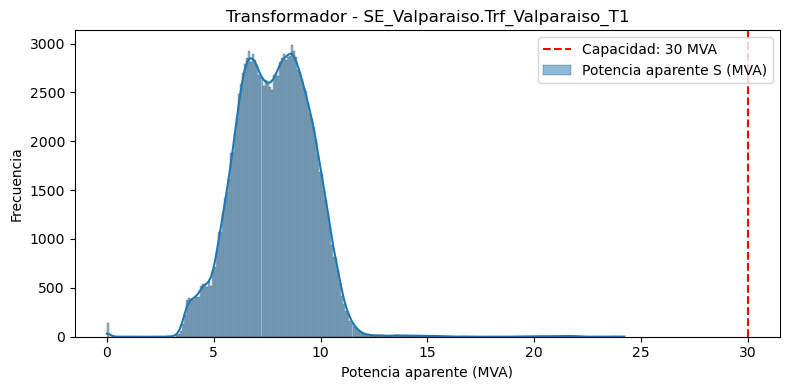

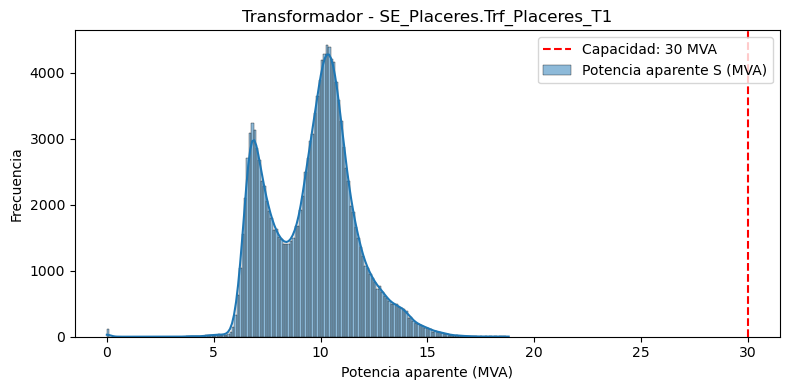

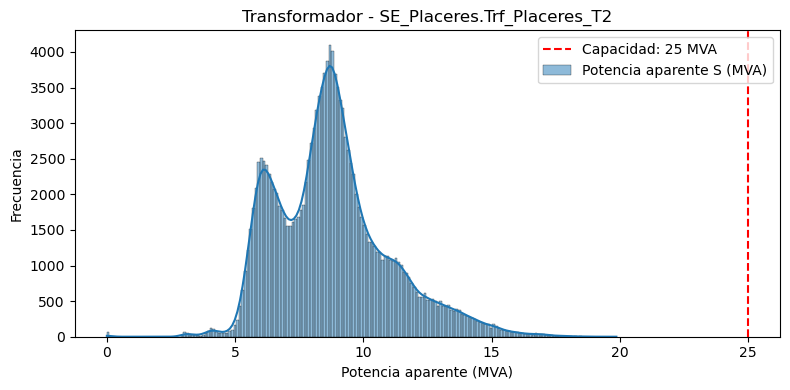

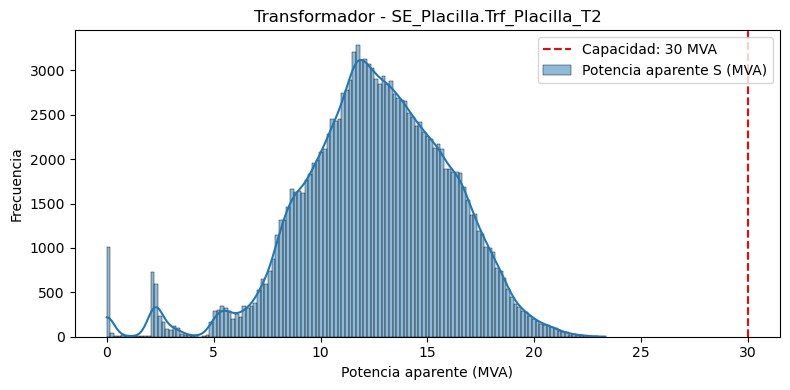

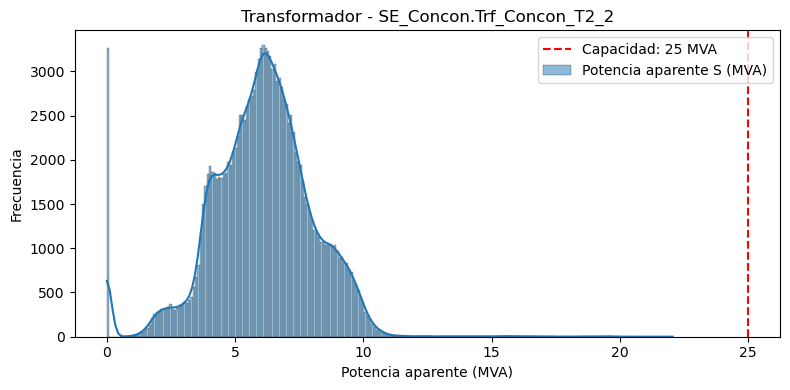

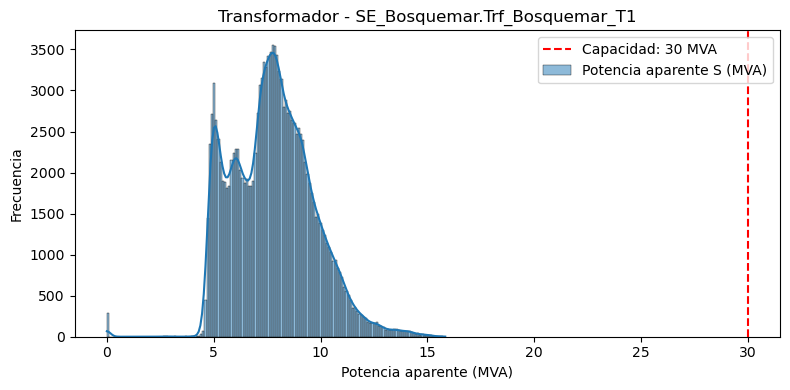

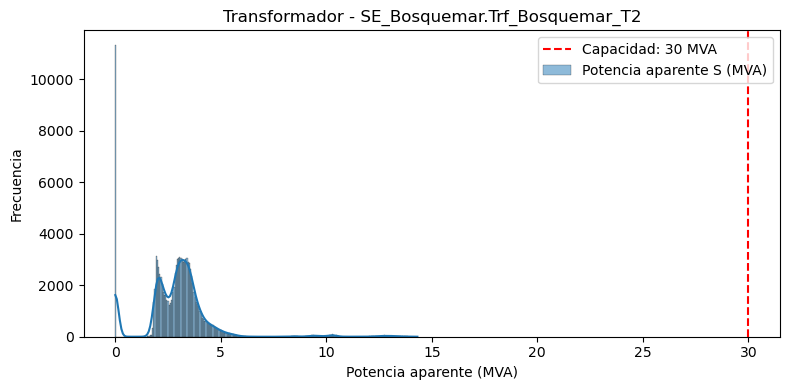

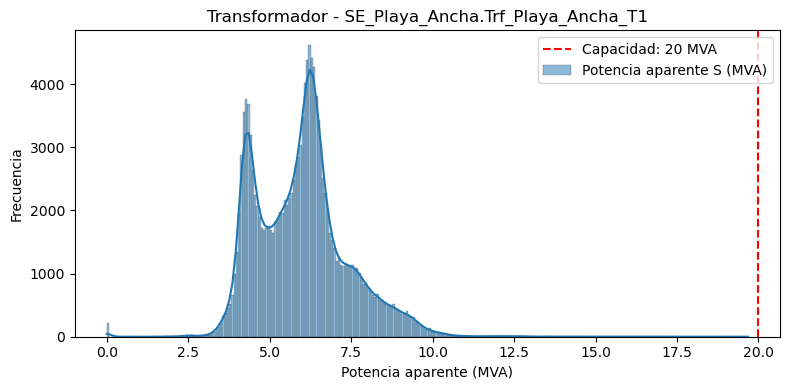

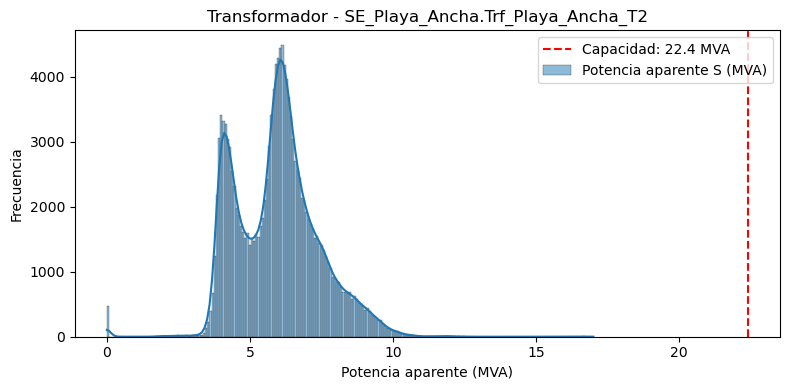

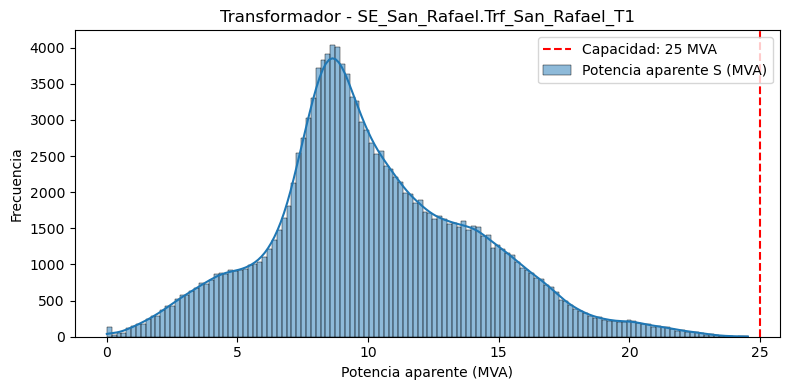

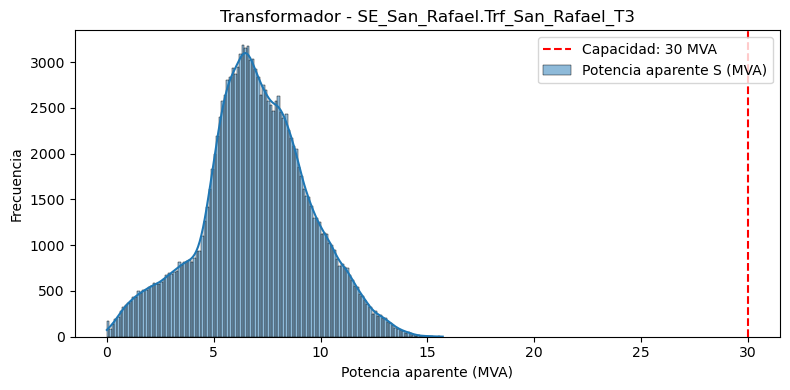

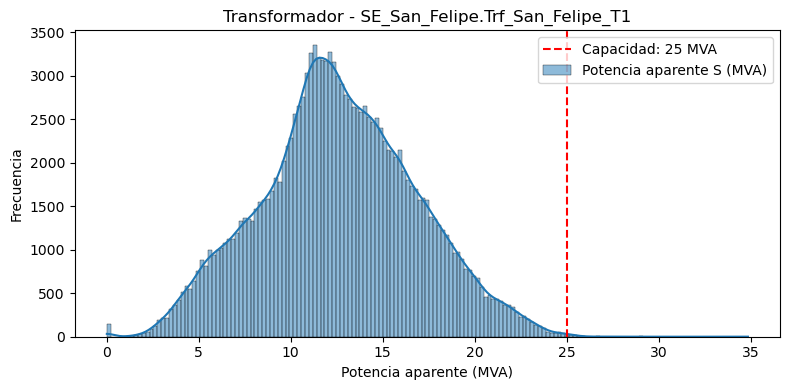

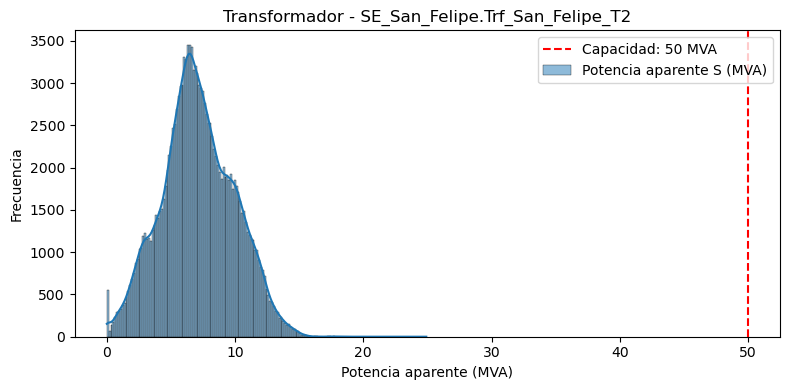

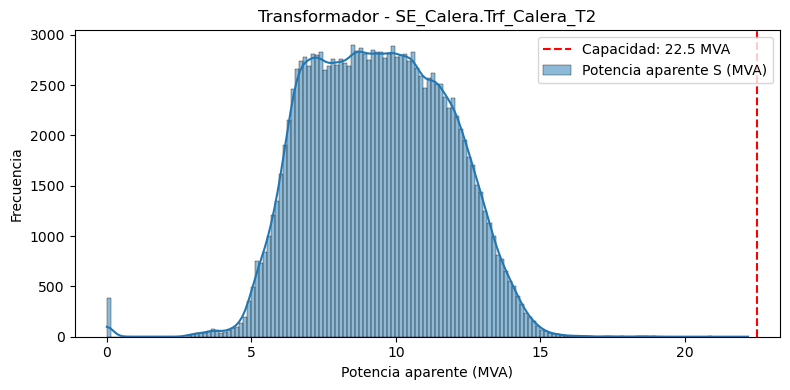

In [60]:

for p_col, q_col in zip(transformador_columnas_p, transformador_columnas_q):
    p = datos_transformadores[p_col].astype(float)
    q = datos_transformadores[q_col].astype(float)
    s = np.sqrt(p**2 + q**2) / 1000  # en MVA

    plt.figure(figsize=(8, 4))
    sns.histplot(s, kde=True, color='#1f77b4', label='Potencia aparente S (MVA)')

    capacidad = capacidades_p.get(p_col)
    if capacidad:
        plt.axvline(capacidad, color='red', linestyle='--', label=f'Capacidad: {capacidad} MVA')

    plt.title(f"Transformador - {p_col.split()[0]}")
    plt.xlabel('Potencia aparente (MVA)')
    plt.ylabel('Frecuencia')
    plt.legend(loc='upper right') 
    plt.tight_layout()
    plt.show()



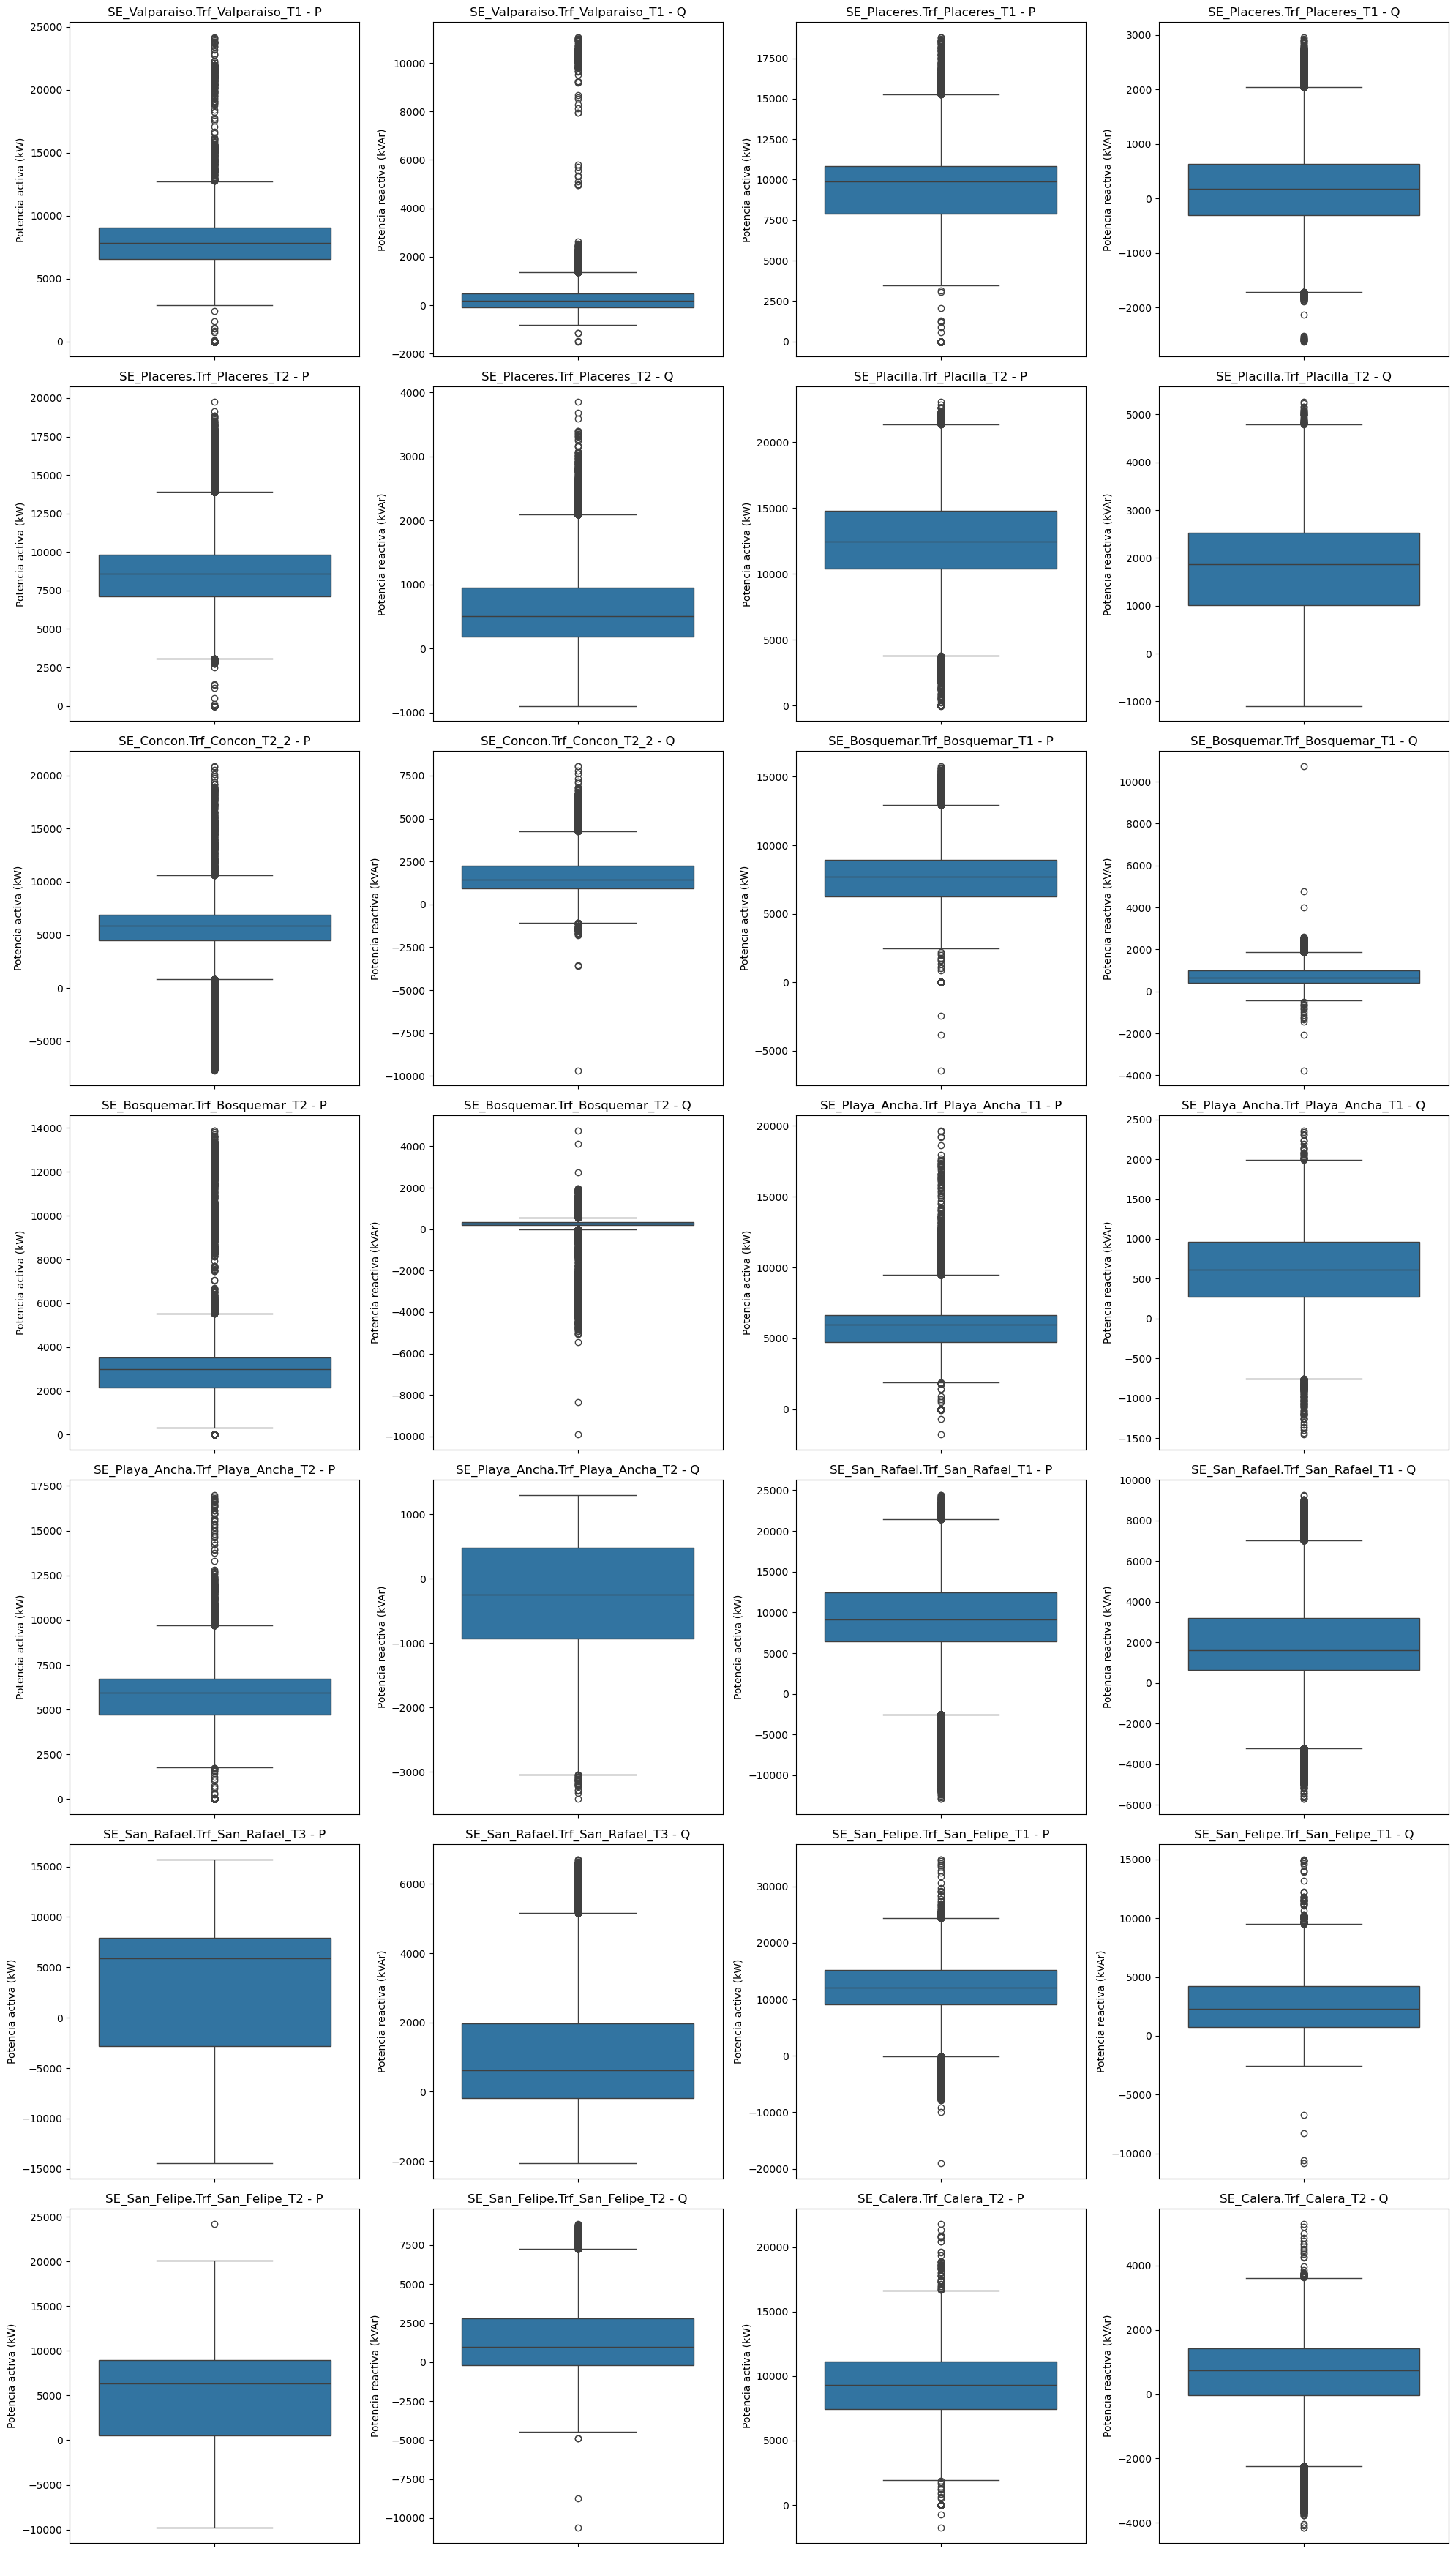

In [61]:
import math

# Configuración
transformadores = list(zip(transformador_columnas_p, transformador_columnas_q))
n_transformadores = len(transformadores)
filas = math.ceil(n_transformadores / 2)
fig, axes = plt.subplots(filas, 4, figsize=(20, 5 * filas))  # 4 columnas por fila (2 transformadores)
axes = axes.reshape(-1, 4)

for idx, (p_col, q_col) in enumerate(transformadores):
    fila = idx // 2
    col_base = (idx % 2) * 2

    # Potencia activa (P)
    datos_p = datos_transformadores[[p_col]].dropna()
    sns.boxplot(data=datos_p, y=p_col, ax=axes[fila, col_base])
    axes[fila, col_base].set_title(f"{p_col.split()[0]} - P")
    axes[fila, col_base].set_xlabel('')
    axes[fila, col_base].set_ylabel('Potencia activa (kW)')

    # Potencia reactiva (Q)
    datos_q = datos_transformadores[[q_col]].dropna()
    sns.boxplot(data=datos_q, y=q_col, ax=axes[fila, col_base + 1])
    axes[fila, col_base + 1].set_title(f"{q_col.split()[0]} - Q")
    axes[fila, col_base + 1].set_xlabel('')
    axes[fila, col_base + 1].set_ylabel('Potencia reactiva (kVAr)')

# Eliminar ejes vacíos si sobran
total_axes = filas * 4
used_axes = n_transformadores * 2
for i in range(used_axes, total_axes):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()




### Tratamiento Outliers

**Creacion de estaciones**

In [66]:
def obtener_estacion(fecha):
    mes = fecha.month
    if mes in [12, 1, 2]:
        return 'verano'
    elif mes in [3, 4, 5]:
        return 'otoño'
    elif mes in [6, 7, 8]:
        return 'invierno'
    else:
        return 'primavera'

datos_transformadores['estacion'] = datos_transformadores['Fecha y hora'].apply(obtener_estacion)


In [68]:
def invierno_verano(fecha):
    mes = fecha.month
    if mes in [4, 5, 6, 7, 8, 9]:
        return 'invierno'
    else:
        return 'verano'

datos_transformadores['estacion_2'] = datos_transformadores['Fecha y hora'].apply(invierno_verano)


**Outliers por 4 estaciones**

In [71]:
import plotly.graph_objects as go
import os
import pandas as pd
import plotly.graph_objects as go
import os

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Graficar para cada transformador (P y Q)
for p_col, q_col in zip(transformador_columnas_p, transformador_columnas_q):
    df = datos_transformadores.copy()

    # Detectar outliers por estación
    outliers_p_idx = []
    outliers_q_idx = []

    for estacion in ['verano', 'otoño', 'invierno', 'primavera']:
        df_est = df[df['estacion'] == estacion]

        # P
        Q1_p = df_est[p_col].quantile(0.25)
        Q3_p = df_est[p_col].quantile(0.75)
        IQR_p = Q3_p - Q1_p
        outliers_p = df_est[
            (df_est[p_col] < Q1_p - 1.5 * IQR_p) |
            (df_est[p_col] > Q3_p + 1.5 * IQR_p)
        ]
        outliers_p_idx.extend(outliers_p.index)

        # Q
        Q1_q = df_est[q_col].quantile(0.25)
        Q3_q = df_est[q_col].quantile(0.75)
        IQR_q = Q3_q - Q1_q
        outliers_q = df_est[
            (df_est[q_col] < Q1_q - 1.5 * IQR_q) |
            (df_est[q_col] > Q3_q + 1.5 * IQR_q)
        ]
        outliers_q_idx.extend(outliers_q.index)

    # Construir gráfico con todos los datos
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=df['Fecha y hora'],
        y=df[p_col],
        mode='lines',
        name='P (kW)',
        line=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=df['Fecha y hora'],
        y=df[q_col],
        mode='lines',
        name='Q (kVAr)',
        line=dict(color='green')
    ))

    fig.add_trace(go.Scatter(
        x=df.loc[outliers_p_idx, 'Fecha y hora'],
        y=df.loc[outliers_p_idx, p_col],
        mode='markers',
        name='Outliers P',
        marker=dict(color='red', size=6)
    ))

    fig.add_trace(go.Scatter(
        x=df.loc[outliers_q_idx, 'Fecha y hora'],
        y=df.loc[outliers_q_idx, q_col],
        mode='markers',
        name='Outliers Q',
        marker=dict(color='orange', size=6)
    ))

    fig.update_layout(
        title=f'{p_col} - Outliers detectados por estación',
        xaxis_title='Fecha',
        yaxis_title='Potencia (kW / kVAr)',
        width=1400,
        height=700,
        hovermode='x unified'
    )

    nombre_base = p_col.split()[0].replace('.', '_')
    fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacionales.html")


**Outliers por 2 estacion (invierno, verano)**

In [74]:
import plotly.graph_objects as go
import os
import pandas as pd
import plotly.graph_objects as go
import os

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Graficar para cada transformador (P y Q)
for p_col, q_col in zip(transformador_columnas_p, transformador_columnas_q):
    df = datos_transformadores.copy()

    # Detectar outliers por estación
    outliers_p_idx = []
    outliers_q_idx = []

    for estacion in ['verano' ,'invierno']:
        df_est = df[df['estacion_2'] == estacion]

        # P
        Q1_p = df_est[p_col].quantile(0.25)
        Q3_p = df_est[p_col].quantile(0.75)
        IQR_p = Q3_p - Q1_p
        outliers_p = df_est[
            (df_est[p_col] < Q1_p - 1.5 * IQR_p) |
            (df_est[p_col] > Q3_p + 1.5 * IQR_p)
        ]
        outliers_p_idx.extend(outliers_p.index)

        # Q
        Q1_q = df_est[q_col].quantile(0.25)
        Q3_q = df_est[q_col].quantile(0.75)
        IQR_q = Q3_q - Q1_q
        outliers_q = df_est[
            (df_est[q_col] < Q1_q - 1.5 * IQR_q) |
            (df_est[q_col] > Q3_q + 1.5 * IQR_q)
        ]
        outliers_q_idx.extend(outliers_q.index)

    # Construir gráfico con todos los datos
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=df['Fecha y hora'],
        y=df[p_col],
        mode='lines',
        name='P (kW)',
        line=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=df['Fecha y hora'],
        y=df[q_col],
        mode='lines',
        name='Q (kVAr)',
        line=dict(color='green')
    ))

    fig.add_trace(go.Scatter(
        x=df.loc[outliers_p_idx, 'Fecha y hora'],
        y=df.loc[outliers_p_idx, p_col],
        mode='markers',
        name='Outliers P',
        marker=dict(color='red', size=6)
    ))

    fig.add_trace(go.Scatter(
        x=df.loc[outliers_q_idx, 'Fecha y hora'],
        y=df.loc[outliers_q_idx, q_col],
        mode='markers',
        name='Outliers Q',
        marker=dict(color='orange', size=6)
    ))

    fig.update_layout(
        title=f'{p_col} - Outliers detectados por estación',
        xaxis_title='Fecha',
        yaxis_title='Potencia (kW / kVAr)',
        width=1400,
        height=700,
        hovermode='x unified'
    )

    nombre_base = p_col.split()[0].replace('.', '_')
    fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacionales_mitad.html")

**Outliers por 2 estación (invierno, verano) y por año**

In [76]:
import plotly.graph_objects as go
import os
import pandas as pd

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Asegurar que existe columna 'año'
datos_transformadores['año'] = datos_transformadores['Fecha y hora'].dt.year

# Iterar por transformador (P y Q)
for p_col, q_col in zip(transformador_columnas_p, transformador_columnas_q):
    df = datos_transformadores.copy()

    # Listas para índices de outliers
    outliers_p_idx = []
    outliers_q_idx = []

    for estacion in ['verano', 'invierno']:
        df_estacion = df[df['estacion_2'] == estacion]

        for anio in df_estacion['año'].unique():
            df_sub = df_estacion[df_estacion['año'] == anio]

            # Outliers P
            q1_p = df_sub[p_col].quantile(0.25)
            q3_p = df_sub[p_col].quantile(0.75)
            iqr_p = q3_p - q1_p
            mask_p = (df_sub[p_col] < q1_p - 1.5 * iqr_p) | (df_sub[p_col] > q3_p + 1.5 * iqr_p)
            outliers_p_idx.extend(df_sub[mask_p].index)

            # Outliers Q
            q1_q = df_sub[q_col].quantile(0.25)
            q3_q = df_sub[q_col].quantile(0.75)
            iqr_q = q3_q - q1_q
            mask_q = (df_sub[q_col] < q1_q - 1.5 * iqr_q) | (df_sub[q_col] > q3_q + 1.5 * iqr_q)
            outliers_q_idx.extend(df_sub[mask_q].index)

    # Graficar resultados
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=df['Fecha y hora'],
        y=df[p_col],
        mode='lines',
        name='P (kW)',
        line=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=df['Fecha y hora'],
        y=df[q_col],
        mode='lines',
        name='Q (kVAr)',
        line=dict(color='green')
    ))

    fig.add_trace(go.Scatter(
        x=df.loc[outliers_p_idx, 'Fecha y hora'],
        y=df.loc[outliers_p_idx, p_col],
        mode='markers',
        name='Outliers P',
        marker=dict(color='red', size=6)
    ))

    fig.add_trace(go.Scatter(
        x=df.loc[outliers_q_idx, 'Fecha y hora'],
        y=df.loc[outliers_q_idx, q_col],
        mode='markers',
        name='Outliers Q',
        marker=dict(color='orange', size=6)
    ))

    fig.update_layout(
        title=f'{p_col} - Outliers por estación y año',
        xaxis_title='Fecha',
        yaxis_title='Potencia (kW / kVAr)',
        width=1400,
        height=700,
        hovermode='x unified'
    )

    nombre_base = p_col.split()[0].replace('.', '_')
    fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacion_año.html")


### Relleno de DF para no tener saltos de fechas

In [78]:
# 1. Crear base temporal con frecuencia de 15 minutos
frecuencia = '15min'
df_base = pd.DataFrame({
    "Fecha y hora": pd.date_range(
        start=datos_transformadores["Fecha y hora"].min(),
        end=datos_transformadores["Fecha y hora"].max(),
        freq=frecuencia
    )
})

# 2. Lista de columnas de potencia (en español o inglés)
columnas_potencia = [col for col in datos_transformadores.columns if 'Potencia' in col or 'Power' in col]

# 3. Inicializar df_rellenado con la base temporal
df_rellenado = df_base.copy()

# 4. Para cada columna de potencia, hacer merge para agregar valores (donde no hay, quedará NaN)
for col in columnas_potencia:
    df_temp = datos_transformadores[["Fecha y hora", col]]
    df_rellenado = pd.merge(df_rellenado, df_temp, on="Fecha y hora", how="left")

df_rellenado['estacion'] = df_rellenado['Fecha y hora'].apply(obtener_estacion)

df_rellenado['estacion_2'] = df_rellenado['Fecha y hora'].apply(invierno_verano)


In [79]:
#revisamos valores nulos
df_rellenado.isnull().sum()

Fecha y hora                                                            0
SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)           5108
SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)       5108
SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)               5107
SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)           5107
SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)               5108
SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)           5108
SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)               5200
SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)           5200
SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)                 5109
SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)             5109
SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)             5107
SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)         5107
SE_Bosquemar.Trf_Bosquemar_T2 Real Pow

In [80]:
import pandas as pd

# Asegúrate de que la columna de fecha esté en formato datetime
df_rellenado['Fecha y hora'] = pd.to_datetime(df_rellenado['Fecha y hora'])

# Crear una máscara booleana para los NaNs
mask_nan = df_rellenado['SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)'].isna()

# Identificar los bloques de NaNs consecutivos
grupo = (mask_nan != mask_nan.shift()).cumsum()
bloques_nans = df_rellenado[mask_nan].groupby(grupo).agg(
    Fecha_inicio=('Fecha y hora', 'first'),
    Fecha_fin=('Fecha y hora', 'last'),
    Cantidad_registros=('Fecha y hora', 'count')
).reset_index(drop=True)

print(bloques_nans.head(20))

          Fecha_inicio           Fecha_fin  Cantidad_registros
0  2021-09-05 00:00:00 2021-09-05 00:45:00                   4
1  2021-12-20 00:15:00 2022-01-01 00:15:00                1153
2  2022-05-23 00:15:00 2022-05-30 00:00:00                 672
3  2022-09-11 00:00:00 2022-09-11 00:45:00                   4
4  2022-09-12 00:15:00 2022-09-19 00:00:00                 672
5  2022-10-31 00:15:00 2022-11-07 00:00:00                 672
6  2022-11-21 00:15:00 2022-11-28 00:00:00                 672
7  2022-12-26 00:15:00 2023-01-01 00:00:00                 576
8  2023-02-13 00:15:00 2023-02-13 00:15:00                   1
9  2023-09-03 00:00:00 2023-09-03 00:45:00                   4
10 2023-12-25 00:15:00 2024-01-01 00:15:00                 673
11 2024-09-08 00:00:00 2024-09-08 00:45:00                   4


### Filtrado de fechas especiales

In [87]:
import numpy as np
import pandas as pd

# Aseguramos el formato de la columna de fecha
df_rellenado['Fecha y hora'] = pd.to_datetime(df_rellenado['Fecha y hora'])

# Fechas objetivo
fechas_a_nan = ['2024-02-02', '2024-02-03']

# Crear máscara para esas fechas (independientemente de la hora)
filtro_fecha = df_rellenado['Fecha y hora'].dt.date.astype(str).isin(fechas_a_nan)

# Columnas exactas de los transformadores indicados

transformadores_p = [
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)",  
    "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)",
    "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)",
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)",  
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)"
]

transformadores_q = [
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)",
    "SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)",   
    "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)",  
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)", 
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)",   
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)"
]

# Combinamos
columnas_a_nan = transformadores_p + transformadores_q

# Aplicamos el NaN en las filas del filtro y solo esas columnas
df_rellenado.loc[filtro_fecha, columnas_a_nan] = np.nan


In [89]:
num_nan = df_rellenado.loc[filtro_fecha, columnas_a_nan].isna().sum().sum()
print(f"Total de valores puestos a NaN: {num_nan}")

Total de valores puestos a NaN: 3456


In [91]:
# Crear filtro para el 25 de febrero de 2025
filtro_25feb2025 = df_rellenado['Fecha y hora'].dt.date == pd.to_datetime('2025-02-25').date()

# Seleccionar todas las columnas que contienen potencia activa o reactiva
columnas_transformadores = [col for col in df_rellenado.columns 
                            if ('Potencia activa' in col or 
                                'Real Power Mean' in col or 
                                'Potencia reactiva' in col or 
                                'Reactive Power Mean' in col)]

# Aplicar NaN solo a esas columnas y filas del 25 de febrero
df_rellenado.loc[filtro_25feb2025, columnas_transformadores] = np.nan

In [93]:
num_nan = df_rellenado.loc[filtro_25feb2025, columnas_transformadores].isna().sum().sum()
print(f"Total de valores puestos a NaN: {num_nan}")

Total de valores puestos a NaN: 2688


In [95]:
# Asegura que la columna de fecha esté en datetime
df_rellenado['Fecha y hora'] = pd.to_datetime(df_rellenado['Fecha y hora'])

# Fecha que quieres verificar
fecha_verificar = '2025-02-25'

# Seleccionamos las filas de esa fecha
df_verificado = df_rellenado[df_rellenado['Fecha y hora'].dt.date == pd.to_datetime(fecha_verificar).date()]

# Puedes elegir columnas específicas a comprobar (opcional)
columnas_a_verificar = [
    "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
    "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)"
    # Añade aquí las que quieras revisar
]

# Mostramos los valores filtrados
df_verificado[["Fecha y hora"] + columnas_a_verificar]

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)
145534,2025-02-25 00:00:00,NaN,NaN
145535,2025-02-25 00:15:00,NaN,NaN
145536,2025-02-25 00:30:00,NaN,NaN
145537,2025-02-25 00:45:00,NaN,NaN
145538,2025-02-25 01:00:00,NaN,NaN
...,...,...,...
145625,2025-02-25 22:45:00,NaN,NaN
145626,2025-02-25 23:00:00,NaN,NaN
145627,2025-02-25 23:15:00,NaN,NaN
145628,2025-02-25 23:30:00,NaN,NaN


### Tratamiento Outliers personalizado

#### Calera T2 

In [99]:
# Calera T2
import plotly.graph_objects as go
import os
import pandas as pd

# Columnas específicas
columna_p = "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)"
columna_q = "SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)"

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Copiar el DataFrame original
df = df_rellenado.copy()

# Filtrar desde el 1 de septiembre de 2022
df  = df[df['Fecha y hora'] >= '2022-09-01'].copy()

# Asegurar que la columna de fecha está en formato datetime
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])
df.loc[filtro_fecha, columnas_a_nan] = np.nan

# Intervalo definido como "outlier manual" adicional para P
inicio_manual = pd.Timestamp("2024-10-10 20:45")
fin_manual = pd.Timestamp("2024-10-25 10:00")

# Inicializar listas de índices de outliers
outliers_p_idx = []
outliers_q_idx = []

# Iterar por estaciones
for estacion in ['verano', 'invierno']:
    df_est = df[df['estacion_2'] == estacion]

    # Outliers P (por IQR)
    Q1_p = df_est[columna_p].quantile(0.25)
    Q3_p = df_est[columna_p].quantile(0.75)
    IQR_p = Q3_p - Q1_p
    outliers_p = df_est[
        (df_est[columna_p] < Q1_p - 1.5 * IQR_p) |
        (df_est[columna_p] > Q3_p + 1.5 * IQR_p)
    ]
    outliers_p_idx.extend(outliers_p.index)

    # Outliers Q (por IQR)
    Q1_q = df_est[columna_q].quantile(0.25)
    Q3_q = df_est[columna_q].quantile(0.75)
    IQR_q = Q3_q - Q1_q
    outliers_q = df_est[
        (df_est[columna_q] < Q1_q - 1.5 * IQR_q) |
        (df_est[columna_q] > Q3_q + 1.5 * IQR_q)
    ]
    outliers_q_idx.extend(outliers_q.index)

# Añadir manualmente todos los valores de P dentro del periodo especificado
indices_periodo_manual_p = df[
    (df["Fecha y hora"] >= inicio_manual) & (df["Fecha y hora"] <= fin_manual)
].index
outliers_p_idx.extend(indices_periodo_manual_p)

# Eliminar duplicados por si se solapan
outliers_p_idx = list(set(outliers_p_idx))
outliers_q_idx = list(set(outliers_q_idx))

# Crear gráfico
fig = go.Figure()

# Línea de P
fig.add_trace(go.Scatter(
    x=df['Fecha y hora'],
    y=df[columna_p],
    mode='lines',
    name='P (kW)',
    line=dict(color='blue')
))

# Línea de Q
fig.add_trace(go.Scatter(
    x=df['Fecha y hora'],
    y=df[columna_q],
    mode='lines',
    name='Q (kVAr)',
    line=dict(color='green')
))

# Outliers P (IQR + periodo adicional)
fig.add_trace(go.Scatter(
    x=df.loc[outliers_p_idx, 'Fecha y hora'],
    y=df.loc[outliers_p_idx, columna_p],
    mode='markers',
    name='Outliers P (IQR + periodo)',
    marker=dict(color='red', size=6)
))

# Outliers Q (solo IQR)
fig.add_trace(go.Scatter(
    x=df.loc[outliers_q_idx, 'Fecha y hora'],
    y=df.loc[outliers_q_idx, columna_q],
    mode='markers',
    name='Outliers Q (IQR)',
    marker=dict(color='orange', size=6)
))

# Configurar diseño del gráfico
fig.update_layout(
    title=f'{columna_p} - Outliers P (IQR + periodo) y Q (IQR)',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

# Guardar gráfico
nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_p_iqr_periodo_q_iqr.html")

In [100]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[outliers_p_idx + outliers_q_idx, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Hacer copia del dataset para agregar los NaN
df_con_nan = df_rellenado.copy()

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

In [101]:
# Crear la carpeta si no existe
os.makedirs("graficos_despues_nan", exist_ok=True)

In [105]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### Calera T2 relleno NaNs

In [107]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

# === Parámetros ===
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]



 Interpolando bloque corto 10 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 12 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


23:38:21 - cmdstanpy - INFO - Chain [1] start processing
23:38:52 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 14 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (11 registros)
 Interpolando bloque corto 16 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 18 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Prophet en bloque 20 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


23:38:54 - cmdstanpy - INFO - Chain [1] start processing
23:39:11 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 24 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (10 registros)
 Prophet en bloque 26 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


23:39:13 - cmdstanpy - INFO - Chain [1] start processing
23:39:44 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 28 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (73 registros desde 2022-12-04 00:30:00)


23:39:46 - cmdstanpy - INFO - Chain [1] start processing
23:40:03 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 30 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


23:40:05 - cmdstanpy - INFO - Chain [1] start processing
23:40:32 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 32 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 34 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (14 registros)
 Interpolando bloque corto 36 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (7 registros)
 Prophet en bloque 38 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (22 registros desde 2023-04-04 11:15:00)


23:40:34 - cmdstanpy - INFO - Chain [1] start processing
23:40:57 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 40 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 42 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 44 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 46 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (12 registros)
 Interpolando bloque corto 48 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 50 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 52 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (22 registros desde 2023-09-23 09:45:00)


23:40:59 - cmdstanpy - INFO - Chain [1] start processing
23:41:36 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 54 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (14 registros)
 Prophet en bloque 56 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


23:41:38 - cmdstanpy - INFO - Chain [1] start processing
23:42:02 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 58 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 60 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 62 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 64 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 66 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 68 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Prophet en bloque 70 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (17 registros desde 2024-04-16 10:00:00)


23:42:04 - cmdstanpy - INFO - Chain [1] start processing
23:43:26 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 72 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 74 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 76 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 78 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 80 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 82 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 84 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 86 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 88 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (10 registros)
 Prophet en bloque 90 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (63 registros desde 2024-07-02 19:30:00)


23:43:31 - cmdstanpy - INFO - Chain [1] start processing
23:43:47 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 92 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (51 registros desde 2024-07-07 07:30:00)


23:43:52 - cmdstanpy - INFO - Chain [1] start processing
23:44:21 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 94 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 96 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 98 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 100 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 102 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 104 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 106 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Prophet en bloque 108 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1399 registros desde 2024-10-10 20:45:00)


23:44:24 - cmdstanpy - INFO - Chain [1] start processing
23:44:48 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 110 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (38 registros desde 2025-02-23 09:15:00)


23:44:51 - cmdstanpy - INFO - Chain [1] start processing
23:45:27 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 112 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (98 registros desde 2025-02-25 00:00:00)


23:45:30 - cmdstanpy - INFO - Chain [1] start processing
23:45:55 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 10 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 12 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


23:45:57 - cmdstanpy - INFO - Chain [1] start processing
23:46:03 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 14 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (11 registros)
 Interpolando bloque corto 16 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 18 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 20 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


23:46:05 - cmdstanpy - INFO - Chain [1] start processing
23:46:10 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 24 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (10 registros)
 Prophet en bloque 26 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


23:46:12 - cmdstanpy - INFO - Chain [1] start processing
23:46:15 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 28 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (73 registros desde 2022-12-04 00:30:00)


23:46:17 - cmdstanpy - INFO - Chain [1] start processing
23:46:22 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 30 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


23:46:24 - cmdstanpy - INFO - Chain [1] start processing
23:46:30 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 32 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 34 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (14 registros)
 Interpolando bloque corto 36 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (7 registros)
 Prophet en bloque 38 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (22 registros desde 2023-04-04 11:15:00)


23:46:32 - cmdstanpy - INFO - Chain [1] start processing
23:46:39 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 40 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 42 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 44 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 46 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 48 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 50 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 52 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (22 registros desde 2023-09-23 09:45:00)


23:46:41 - cmdstanpy - INFO - Chain [1] start processing
23:46:45 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 54 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (14 registros)
 Prophet en bloque 56 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


23:46:47 - cmdstanpy - INFO - Chain [1] start processing
23:46:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 58 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 60 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 62 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 64 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 66 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 68 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 70 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (17 registros desde 2024-04-16 10:00:00)


23:46:53 - cmdstanpy - INFO - Chain [1] start processing
23:46:57 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 72 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 74 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 76 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 78 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 80 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 82 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 84 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 86 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 88 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (10 registros)
 Prophet en bloque 90 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (

23:46:59 - cmdstanpy - INFO - Chain [1] start processing
23:47:45 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 92 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (51 registros desde 2024-07-07 07:30:00)


23:47:47 - cmdstanpy - INFO - Chain [1] start processing
23:47:52 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 94 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 96 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 98 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 100 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 102 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 104 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 106 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 108 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1399 registros desde 2024-10-10 20:45:00)


23:47:55 - cmdstanpy - INFO - Chain [1] start processing
23:48:04 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 110 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (38 registros desde 2025-02-23 09:15:00)


23:48:06 - cmdstanpy - INFO - Chain [1] start processing
23:48:11 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 112 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (98 registros desde 2025-02-25 00:00:00)


23:48:12 - cmdstanpy - INFO - Chain [1] start processing
23:48:19 - cmdstanpy - INFO - Chain [1] done processing


In [109]:
import pandas as pd

# Definir las columnas
columna_p = "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)"
columna_q = "SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)

         fecha_inicio           fecha_fin  numero_registros  \
0 2021-06-30 11:15:00 2021-06-30 13:00:00                 8   
1 2021-09-05 09:30:00 2021-09-05 22:45:00                54   
2 2021-09-11 00:30:00 2021-09-11 00:45:00                 2   
3 2021-06-30 11:15:00 2021-06-30 13:00:00                 8   
4 2021-09-05 09:30:00 2021-09-05 22:45:00                54   
5 2021-09-11 00:30:00 2021-09-11 00:45:00                 2   

                variable  
0    Potencia activa (P)  
1    Potencia activa (P)  
2    Potencia activa (P)  
3  Potencia reactiva (Q)  
4  Potencia reactiva (Q)  
5  Potencia reactiva (Q)  


In [110]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Calera T2 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)

# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "SE_Calera_T2_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f"Gráfico guardado como: {ruta_html}")



Gráfico guardado como: transformadores_con_prophet/SE_Calera_T2_con_prophet.html


In [111]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Parámetros generales ===
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-03-01 10:00')
bloque_fin = pd.Timestamp('2024-03-03 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


#  Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (14 registros)
 Interpolando bloque corto 4 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (7 registros)
 Prophet en bloque 6 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (22 registros desde 2023-04-04 11:15:00)


23:48:25 - cmdstanpy - INFO - Chain [1] start processing
23:48:30 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 10 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 12 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 14 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (12 registros)
 Interpolando bloque corto 16 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 18 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 20 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (22 registros desde 2023-09-23 09:45:00)


23:48:31 - cmdstanpy - INFO - Chain [1] start processing
23:49:01 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (14 registros)
 Prophet en bloque 24 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


23:49:03 - cmdstanpy - INFO - Chain [1] start processing
23:49:38 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 26 de SE_Calera.Trf_Calera_T2 Potencia activa media (kW) (244 registros desde 2024-03-01 10:00:00)


23:49:40 - cmdstanpy - INFO - Chain [1] start processing
23:50:11 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 658.26
MSE: 679296.93

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-03-01 10:00:00   
1 2024-03-01 10:15:00   
2 2024-03-01 10:30:00   
3 2024-03-01 10:45:00   
4 2024-03-01 11:00:00   

   SE_Calera.Trf_Calera_T2 Potencia activa media (kW)_real  \
0                                        10985.10933         
1                                        11777.03762         
2                                        12121.65833         
3                                        12285.73418         
4                                        12583.41599         

   SE_Calera.Trf_Calera_T2 Potencia activa media (kW)_relleno  is_nan  grupo  
0                                       11349.075999                1     26  
1                                       11567.075518                1     26  
2                                       11755.454003                1     26  
3                               

23:50:11 - cmdstanpy - INFO - Chain [1] start processing
23:50:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 10 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 12 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 14 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 16 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 18 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 20 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (22 registros desde 2023-09-23 09:45:00)


23:50:13 - cmdstanpy - INFO - Chain [1] start processing
23:50:16 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (14 registros)
 Prophet en bloque 24 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


23:50:18 - cmdstanpy - INFO - Chain [1] start processing
23:50:25 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 26 de SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr) (244 registros desde 2024-03-01 10:00:00)


23:50:27 - cmdstanpy - INFO - Chain [1] start processing
23:50:43 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 364.26
MSE: 191404.44

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-03-01 10:00:00   
1 2024-03-01 10:15:00   
2 2024-03-01 10:30:00   
3 2024-03-01 10:45:00   
4 2024-03-01 11:00:00   

   SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)_real  \
0                                        2077.596188             
1                                        2392.418861             
2                                        2553.070545             
3                                        2564.067364             
4                                        2783.178329             

   SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)_relleno  is_nan  \
0                                        2055.599776                    1   
1                                        2107.984247                    1   
2                                        2162.443389                    1   
3             

#### San felipe T2

In [113]:
# San Felipe T2
import plotly.graph_objects as go
import os
import pandas as pd

# Columnas específicas
columna_p = "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)"
columna_q = "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)"

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Asegurar formato datetime
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])

# Inicializar listas de índices de outliers
outliers_p_idx = []
outliers_q_idx = []

# Fechas específicas para Q (outliers superiores concretos)
fechas_q_superior = [
    pd.Timestamp("2024-07-04 13:30"),
    pd.Timestamp("2024-07-04 14:15")
]

# Iterar por estaciones
for estacion in ['verano', 'invierno']:
    df_est = df[df['estacion_2'] == estacion]

    # Outliers solo superiores de P
    Q1_p = df_est[columna_p].quantile(0.25)
    Q3_p = df_est[columna_p].quantile(0.75)
    IQR_p = Q3_p - Q1_p
    outliers_p = df_est[df_est[columna_p] > Q3_p + 1.5 * IQR_p]
    outliers_p_idx.extend(outliers_p.index)

    # Outliers solo inferiores de Q
    Q1_q = df_est[columna_q].quantile(0.25)
    Q3_q = df_est[columna_q].quantile(0.75)
    IQR_q = Q3_q - Q1_q
    outliers_q = df_est[df_est[columna_q] < Q1_q - 1.5 * IQR_q]
    outliers_q_idx.extend(outliers_q.index)

# Añadir manualmente los dos puntos concretos como outliers superiores en Q
outliers_q_idx.extend(df[df["Fecha y hora"].isin(fechas_q_superior)].index)

# Añadir ceros absolutos como outliers
outliers_p_idx.extend(df[df[columna_p] == 0].index)
outliers_q_idx.extend(df[df[columna_q] == 0].index)

# Eliminar duplicados
outliers_p_idx = list(set(outliers_p_idx))
outliers_q_idx = list(set(outliers_q_idx))

# Crear gráfico
fig = go.Figure()

# Línea de P
fig.add_trace(go.Scatter(
    x=df['Fecha y hora'],
    y=df[columna_p],
    mode='lines',
    name='P (kW)',
    line=dict(color='blue')
))

# Línea de Q
fig.add_trace(go.Scatter(
    x=df['Fecha y hora'],
    y=df[columna_q],
    mode='lines',
    name='Q (kVAr)',
    line=dict(color='green')
))

# Outliers P (superiores + ceros + intervalos)
fig.add_trace(go.Scatter(
    x=df.loc[outliers_p_idx, 'Fecha y hora'],
    y=df.loc[outliers_p_idx, columna_p],
    mode='markers',
    name='Outliers P (superior, cero o intervalo)',
    marker=dict(color='red', size=6)
))

# Outliers Q (inferior + específicos + ceros)
fig.add_trace(go.Scatter(
    x=df.loc[outliers_q_idx, 'Fecha y hora'],
    y=df.loc[outliers_q_idx, columna_q],
    mode='markers',
    name='Outliers Q (inferior, específicos o cero)',
    marker=dict(color='orange', size=6)
))

# Configurar diseño del gráfico
fig.update_layout(
    title=f'{columna_p} - Outliers personalizados por estación',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

# Guardar gráfico como HTML
nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_personalizados.html")


In [114]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[outliers_p_idx + outliers_q_idx, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

In [115]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### San Felipe T2 relleno NaNs

In [118]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

# Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.2,
    seasonality_mode="multiplicative",
    mensual_fourier_order=10,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.2,
    seasonality_mode="additive",
    mensual_fourier_order=10,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]



 Interpolando bloque corto 10 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 12 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


00:01:17 - cmdstanpy - INFO - Chain [1] start processing
00:01:42 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 14 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


00:01:46 - cmdstanpy - INFO - Chain [1] start processing
00:02:17 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (38 registros desde 2022-11-10 09:15:00)


00:02:21 - cmdstanpy - INFO - Chain [1] start processing
00:02:44 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 18 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


00:02:47 - cmdstanpy - INFO - Chain [1] start processing
00:03:22 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 20 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


00:03:25 - cmdstanpy - INFO - Chain [1] start processing
00:04:02 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 24 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (2 registros)
 Prophet en bloque 26 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (66 registros desde 2023-06-13 04:45:00)


00:04:05 - cmdstanpy - INFO - Chain [1] start processing
00:04:41 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 28 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 30 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (3 registros)
 Prophet en bloque 32 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (30 registros desde 2023-07-06 09:30:00)


00:04:44 - cmdstanpy - INFO - Chain [1] start processing
00:05:18 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 34 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 36 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (127 registros desde 2023-09-27 09:15:00)


00:05:21 - cmdstanpy - INFO - Chain [1] start processing
00:05:52 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 38 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (5 registros)
 Prophet en bloque 40 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (69 registros desde 2023-09-28 18:45:00)


00:05:55 - cmdstanpy - INFO - Chain [1] start processing
00:06:22 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 42 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 44 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (15 registros)
 Interpolando bloque corto 46 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 48 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 50 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 52 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 54 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


00:06:26 - cmdstanpy - INFO - Chain [1] start processing
00:06:53 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 56 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (13 registros)
 Interpolando bloque corto 58 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (6 registros)
 Prophet en bloque 60 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (24 registros desde 2024-06-13 11:45:00)


00:06:56 - cmdstanpy - INFO - Chain [1] start processing
00:07:42 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 62 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 64 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 66 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 68 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (17 registros desde 2024-07-18 09:30:00)


00:07:45 - cmdstanpy - INFO - Chain [1] start processing
00:08:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 70 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 72 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 74 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (7 registros)
 Prophet en bloque 76 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


00:08:15 - cmdstanpy - INFO - Chain [1] start processing
00:08:56 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 78 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 10 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 12 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


00:08:59 - cmdstanpy - INFO - Chain [1] start processing
00:09:09 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 14 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


00:09:12 - cmdstanpy - INFO - Chain [1] start processing
00:09:40 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (38 registros desde 2022-11-10 09:15:00)


00:09:44 - cmdstanpy - INFO - Chain [1] start processing
00:09:58 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 18 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


00:10:02 - cmdstanpy - INFO - Chain [1] start processing
00:10:17 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 20 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


00:10:20 - cmdstanpy - INFO - Chain [1] start processing
00:10:40 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 24 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 26 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (66 registros desde 2023-06-13 04:45:00)


00:10:43 - cmdstanpy - INFO - Chain [1] start processing
00:10:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 28 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 30 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 32 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (30 registros desde 2023-07-06 09:30:00)


00:10:54 - cmdstanpy - INFO - Chain [1] start processing
00:11:01 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 34 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 36 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (127 registros desde 2023-09-27 09:15:00)


00:11:04 - cmdstanpy - INFO - Chain [1] start processing
00:11:16 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 38 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (5 registros)
 Prophet en bloque 40 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (69 registros desde 2023-09-28 18:45:00)


00:11:19 - cmdstanpy - INFO - Chain [1] start processing
00:11:29 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 42 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 44 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 46 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 48 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 50 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 52 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 54 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


00:11:33 - cmdstanpy - INFO - Chain [1] start processing
00:11:43 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 56 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (13 registros)
 Interpolando bloque corto 58 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (6 registros)
 Prophet en bloque 60 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (24 registros desde 2024-06-13 11:45:00)


00:11:46 - cmdstanpy - INFO - Chain [1] start processing
00:11:50 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 62 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 64 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 66 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 68 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (17 registros desde 2024-07-18 09:30:00)


00:11:54 - cmdstanpy - INFO - Chain [1] start processing
00:11:57 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 70 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 72 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 74 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (7 registros)
 Prophet en bloque 76 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


00:12:01 - cmdstanpy - INFO - Chain [1] start processing
00:12:09 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 78 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)


In [119]:
import pandas as pd

# Definir las columnas
columna_p = "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)"
columna_q = "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df[df[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)

          fecha_inicio           fecha_fin  numero_registros  \
0  2021-01-31 05:00:00 2021-01-31 13:30:00                35   
1  2021-03-23 00:45:00 2021-03-23 01:00:00                 2   
2  2021-05-12 13:45:00 2021-05-12 15:00:00                 6   
3  2021-06-07 09:45:00 2021-06-07 15:30:00                24   
4  2021-06-12 11:00:00 2021-06-12 11:15:00                 2   
5  2021-10-08 12:30:00 2021-10-08 13:00:00                 3   
6  2022-02-04 10:45:00 2022-02-04 10:45:00                 1   
7  2021-01-31 05:00:00 2021-01-31 13:30:00                35   
8  2021-03-23 00:45:00 2021-03-23 01:00:00                 2   
9  2021-05-12 13:45:00 2021-05-12 15:00:00                 6   
10 2021-06-07 09:45:00 2021-06-07 15:30:00                24   
11 2021-06-12 11:00:00 2021-06-12 11:15:00                 2   
12 2021-10-08 12:30:00 2021-10-08 13:00:00                 3   
13 2022-02-04 10:45:00 2022-02-04 10:45:00                 1   

                 variable  
0     Poten

In [120]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - San Felipe T2 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)


# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "SE_San_Felipe_T2_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")


 Gráfico guardado como: transformadores_con_prophet/SE_San_Felipe_T2_con_prophet.html


In [122]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Parámetros generales 
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-02-03 10:00')
bloque_fin = pd.Timestamp('2024-02-06 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


#  Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 4 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (2 registros)
 Prophet en bloque 6 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (66 registros desde 2023-06-13 04:45:00)


00:16:52 - cmdstanpy - INFO - Chain [1] start processing
00:17:09 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 10 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (3 registros)
 Prophet en bloque 12 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (30 registros desde 2023-07-06 09:30:00)


00:17:10 - cmdstanpy - INFO - Chain [1] start processing
00:17:33 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 14 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 16 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (127 registros desde 2023-09-27 09:15:00)


00:17:35 - cmdstanpy - INFO - Chain [1] start processing
00:18:27 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (5 registros)
 Prophet en bloque 20 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (69 registros desde 2023-09-28 18:45:00)


00:18:28 - cmdstanpy - INFO - Chain [1] start processing
00:19:17 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 24 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (15 registros)
 Interpolando bloque corto 26 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 28 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 30 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 32 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 34 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


00:19:19 - cmdstanpy - INFO - Chain [1] start processing
00:19:42 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 36 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW) (340 registros desde 2024-02-03 10:00:00)


00:19:44 - cmdstanpy - INFO - Chain [1] start processing
00:20:09 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 982.27
MSE: 1564803.44

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-02-03 10:00:00   
1 2024-02-03 10:15:00   
2 2024-02-03 10:30:00   
3 2024-02-03 10:45:00   
4 2024-02-03 11:00:00   

   SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)_real  \
0                                        -712.361991                 
1                                       -1209.768414                 
2                                       -1121.634126                 
3                                       -1351.635218                 
4                                       -1451.615930                 

   SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)_relleno  is_nan  \
0                                        1368.750727                        1   
1                                         589.563262                        1   
2                                         -99.748437    

00:20:11 - cmdstanpy - INFO - Chain [1] start processing
00:20:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 10 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 12 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (30 registros desde 2023-07-06 09:30:00)


00:20:14 - cmdstanpy - INFO - Chain [1] start processing
00:20:16 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 14 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 16 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (127 registros desde 2023-09-27 09:15:00)


00:20:17 - cmdstanpy - INFO - Chain [1] start processing
00:20:26 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (5 registros)
 Prophet en bloque 20 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (69 registros desde 2023-09-28 18:45:00)


00:20:28 - cmdstanpy - INFO - Chain [1] start processing
00:20:38 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 24 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 26 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 28 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 30 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 32 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 34 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


00:20:40 - cmdstanpy - INFO - Chain [1] start processing
00:20:45 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 36 de SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr) (340 registros desde 2024-02-03 10:00:00)


00:20:48 - cmdstanpy - INFO - Chain [1] start processing
00:21:24 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 1000.13
MSE: 1427491.80

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-02-03 10:00:00   
1 2024-02-03 10:15:00   
2 2024-02-03 10:30:00   
3 2024-02-03 10:45:00   
4 2024-02-03 11:00:00   

   SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)_real  \
0                                        4574.839592                     
1                                        4921.560764                     
2                                        5340.604782                     
3                                        5303.917408                     
4                                        5369.561672                     

   SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)_relleno  \
0                                        4285.535356                        
1                                        4460.889265                        
2                                        

#### San Felipe T1

In [124]:
import plotly.graph_objects as go
import os
import pandas as pd
import holidays

#  CONFIGURACIÓN 

columna_p = "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)"
columna_q = "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)"
festivos_chile = holidays.Chile()
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

#  CARGA Y FORMATO DE DATOS 

df = datos_transformadores.copy()
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])
df["año"] = df["Fecha y hora"].dt.year

registro_outliers = []
outliers_p_idx = []
outliers_q_idx = []

#  TRAMO ESPECÍFICO 

inicio_tramo = pd.to_datetime("2024-07-04 12:30:00")
fin_tramo = pd.to_datetime("2024-07-04 15:15:00")
df_tramo = df[(df["Fecha y hora"] >= inicio_tramo) & (df["Fecha y hora"] <= fin_tramo)]

#  OUTLIERS P 

# (1) Globales solo si P > 26000
outliers_p_superior = df[df[columna_p] > 26000]
outliers_p_idx.extend(outliers_p_superior.index)
registro_outliers.extend([
    {
        "columna": columna_p,
        "Fecha y hora": row["Fecha y hora"],
        "valor": row[columna_p],
        "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
    }
    for _, row in outliers_p_superior.iterrows()
])

# (2) Todos los puntos del tramo específico = outliers
outliers_p_tramo = df_tramo
outliers_p_idx.extend(outliers_p_tramo.index)
registro_outliers.extend([
    {
        "columna": columna_p,
        "Fecha y hora": row["Fecha y hora"],
        "valor": row[columna_p],
        "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
    }
    for _, row in outliers_p_tramo.iterrows()
])

# OUTLIERS Q 

# (1) Global: Q > 9000 o Q < -6000
outliers_q = df[(df[columna_q] > 9000) | (df[columna_q] < -6000)]
outliers_q_idx.extend(outliers_q.index)
registro_outliers.extend([
    {
        "columna": columna_q,
        "Fecha y hora": row["Fecha y hora"],
        "valor": row[columna_q],
        "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
    }
    for _, row in outliers_q.iterrows()
])

# (2) También todos los puntos del tramo específico
outliers_q_tramo = df_tramo
outliers_q_idx.extend(outliers_q_tramo.index)
registro_outliers.extend([
    {
        "columna": columna_q,
        "Fecha y hora": row["Fecha y hora"],
        "valor": row[columna_q],
        "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
    }
    for _, row in outliers_q_tramo.iterrows()
])

#  CREAR DATAFRAME DE OUTLIERS 

df_outliers_sanfelipe = pd.DataFrame(registro_outliers)
df_outliers_sanfelipe.to_csv("graficos_outliers_estacionales/sanfelipe_T1_outliers_registro.csv", index=False)

#  AGRUPACIÓN DE OUTLIERS SEGUIDOS 

df_outliers_sanfelipe = df_outliers_sanfelipe.sort_values(by=["columna", "Fecha y hora"]).reset_index(drop=True)
df_outliers_sanfelipe["fecha"] = df_outliers_sanfelipe["Fecha y hora"].dt.date
df_outliers_sanfelipe["delta_hora"] = df_outliers_sanfelipe["Fecha y hora"].diff().dt.total_seconds().div(3600)
df_outliers_sanfelipe["misma_columna"] = df_outliers_sanfelipe["columna"] == df_outliers_sanfelipe["columna"].shift()
df_outliers_sanfelipe["misma_fecha"] = df_outliers_sanfelipe["fecha"] == df_outliers_sanfelipe["fecha"].shift()
df_outliers_sanfelipe["mismo_tipo"] = df_outliers_sanfelipe["tipo_dia"] == df_outliers_sanfelipe["tipo_dia"].shift()
df_outliers_sanfelipe["corte"] = (~df_outliers_sanfelipe["misma_columna"]) | (~df_outliers_sanfelipe["misma_fecha"]) | \
                                 (~df_outliers_sanfelipe["mismo_tipo"]) | (df_outliers_sanfelipe["delta_hora"] > 1)
df_outliers_sanfelipe["grupo"] = df_outliers_sanfelipe["corte"].cumsum()

#  RESUMEN AGRUPADO 

sanfelipe_T1_outliers = df_outliers_sanfelipe.groupby(["grupo", "columna", "tipo_dia"]).agg(
    fecha_inicio=("Fecha y hora", "min"),
    fecha_fin=("Fecha y hora", "max"),
    valor_maximo=("valor", "max"),
    valor_minimo=("valor", "min"),
    valor_medio=("valor", "mean")
).reset_index()

sanfelipe_T1_outliers["valor_maximo"] = sanfelipe_T1_outliers["valor_maximo"].round(2)
sanfelipe_T1_outliers["valor_minimo"] = sanfelipe_T1_outliers["valor_minimo"].round(2)
sanfelipe_T1_outliers["valor_medio"] = sanfelipe_T1_outliers["valor_medio"].round(2)

sanfelipe_T1_outliers.to_csv("graficos_outliers_estacionales/sanfelipe_T1_outliers.csv", index=False)

#  GRÁFICO 

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_p],
    mode='lines', name='P (kW)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_q],
    mode='lines', name='Q (kVAr)', line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df.loc[outliers_p_idx, "Fecha y hora"],
    y=df.loc[outliers_p_idx, columna_p],
    mode='markers', name='Outliers P (>26000 o tramo)',
    marker=dict(color='red', size=6)
))

fig.add_trace(go.Scatter(
    x=df.loc[outliers_q_idx, "Fecha y hora"],
    y=df.loc[outliers_q_idx, columna_q],
    mode='markers', name='Outliers Q (>9800 / <-6000 o tramo)',
    marker=dict(color='orange', size=6)
))

fig.update_layout(
    title=f'{columna_p} - Outliers por umbrales + tramo especial',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_umbral_fijo.html")

In [125]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[outliers_p_idx + outliers_q_idx, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

In [126]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### San Felipe T1 relleno NaNs

In [128]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

# Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=8,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f"📈 Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]


 Interpolando bloque corto 44 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (4 registros)
📈 Prophet en bloque 46 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


00:21:43 - cmdstanpy - INFO - Chain [1] start processing
00:22:03 - cmdstanpy - INFO - Chain [1] done processing


📈 Prophet en bloque 48 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


00:22:06 - cmdstanpy - INFO - Chain [1] start processing
00:22:34 - cmdstanpy - INFO - Chain [1] done processing


📈 Prophet en bloque 50 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (24 registros desde 2022-11-10 10:30:00)


00:22:36 - cmdstanpy - INFO - Chain [1] start processing
00:23:12 - cmdstanpy - INFO - Chain [1] done processing


📈 Prophet en bloque 52 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


00:23:14 - cmdstanpy - INFO - Chain [1] start processing
00:23:40 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 54 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 56 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 58 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 60 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 62 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 64 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 66 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 68 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 70 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 72 de SE_San_Felipe

00:23:43 - cmdstanpy - INFO - Chain [1] start processing
00:24:02 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 80 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 82 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 84 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 86 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 88 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 90 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 92 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 94 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 96 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 98 de SE_San_Felip

00:24:05 - cmdstanpy - INFO - Chain [1] start processing
00:24:40 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 118 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 120 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 122 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (14 registros)
 Interpolando bloque corto 124 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (13 registros)
 Interpolando bloque corto 126 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 128 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 130 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 132 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 134 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (12 registros)
📈 Prophet en bloque 136 de SE_San

00:24:43 - cmdstanpy - INFO - Chain [1] start processing
00:25:03 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 138 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (12 registros)
 Interpolando bloque corto 140 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 142 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (12 registros)
 Interpolando bloque corto 144 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 146 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 148 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (13 registros)
 Interpolando bloque corto 150 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 152 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (14 registros)
 Interpolando bloque corto 154 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 156 de

00:25:05 - cmdstanpy - INFO - Chain [1] start processing
00:25:38 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 164 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
📈 Prophet en bloque 166 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (20 registros desde 2024-01-29 12:30:00)


00:25:40 - cmdstanpy - INFO - Chain [1] start processing
00:25:59 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 168 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 170 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 172 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 174 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 176 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (11 registros)
 Interpolando bloque corto 178 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 180 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (12 registros)
 Interpolando bloque corto 182 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 184 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 186 de S

00:26:01 - cmdstanpy - INFO - Chain [1] start processing
00:26:21 - cmdstanpy - INFO - Chain [1] done processing


📈 Prophet en bloque 200 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (22 registros desde 2024-02-08 11:45:00)


00:26:22 - cmdstanpy - INFO - Chain [1] start processing
00:26:44 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 202 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 204 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 206 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (11 registros)
📈 Prophet en bloque 208 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (19 registros desde 2024-02-12 13:00:00)


00:26:46 - cmdstanpy - INFO - Chain [1] start processing
00:27:09 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 210 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 212 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 214 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 216 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (14 registros)
 Interpolando bloque corto 218 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 220 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 222 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 224 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 226 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 228 de SE

00:27:11 - cmdstanpy - INFO - Chain [1] start processing
00:27:31 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 44 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (4 registros)
📈 Prophet en bloque 46 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


00:27:33 - cmdstanpy - INFO - Chain [1] start processing
00:27:37 - cmdstanpy - INFO - Chain [1] done processing


📈 Prophet en bloque 48 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


00:27:39 - cmdstanpy - INFO - Chain [1] start processing
00:27:42 - cmdstanpy - INFO - Chain [1] done processing


📈 Prophet en bloque 50 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (24 registros desde 2022-11-10 10:30:00)


00:27:44 - cmdstanpy - INFO - Chain [1] start processing
00:27:59 - cmdstanpy - INFO - Chain [1] done processing


📈 Prophet en bloque 52 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


00:28:01 - cmdstanpy - INFO - Chain [1] start processing
00:28:13 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 54 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 56 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 58 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 60 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 62 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 64 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 66 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 68 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 70 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpola

00:28:14 - cmdstanpy - INFO - Chain [1] start processing
00:28:18 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 80 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 82 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 84 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 86 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 88 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 90 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 92 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 94 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 96 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpol

00:28:21 - cmdstanpy - INFO - Chain [1] start processing
00:28:34 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 118 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 120 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 122 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (14 registros)
 Interpolando bloque corto 124 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (13 registros)
 Interpolando bloque corto 126 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 128 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 130 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 132 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 134 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (12 registro

00:28:36 - cmdstanpy - INFO - Chain [1] start processing
00:28:40 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 138 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 140 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 142 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 144 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 146 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 148 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (13 registros)
 Interpolando bloque corto 150 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 152 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (14 registros)
 Interpolando bloque corto 154 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registro

00:28:42 - cmdstanpy - INFO - Chain [1] start processing
00:28:47 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 164 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
📈 Prophet en bloque 166 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (20 registros desde 2024-01-29 12:30:00)


00:28:48 - cmdstanpy - INFO - Chain [1] start processing
00:28:55 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 168 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 170 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 172 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 174 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 176 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (11 registros)
 Interpolando bloque corto 178 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 180 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 182 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 184 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (7 registros)

00:28:57 - cmdstanpy - INFO - Chain [1] start processing
00:29:03 - cmdstanpy - INFO - Chain [1] done processing


📈 Prophet en bloque 200 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (22 registros desde 2024-02-08 11:45:00)


00:29:04 - cmdstanpy - INFO - Chain [1] start processing
00:29:09 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 202 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 204 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 206 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (11 registros)
📈 Prophet en bloque 208 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (19 registros desde 2024-02-12 13:00:00)


00:29:11 - cmdstanpy - INFO - Chain [1] start processing
00:29:18 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 210 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 212 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 214 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 216 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (14 registros)
 Interpolando bloque corto 218 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 220 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 222 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 224 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 226 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (3 registros)


00:29:21 - cmdstanpy - INFO - Chain [1] start processing
00:29:28 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
import pandas as pd

# Definir las columnas
columna_p = "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)"
columna_q = "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado.head())


         fecha_inicio           fecha_fin  numero_registros  \
0 2021-03-23 00:45:00 2021-03-23 00:45:00                 1   
1 2021-04-18 08:30:00 2021-04-18 14:30:00                25   
2 2021-05-12 11:30:00 2021-05-12 13:15:00                 8   
3 2021-06-12 11:15:00 2021-06-12 11:15:00                 1   
4 2021-06-19 09:30:00 2021-06-19 13:15:00                16   

              variable  
0  Potencia activa (P)  
1  Potencia activa (P)  
2  Potencia activa (P)  
3  Potencia activa (P)  
4  Potencia activa (P)  


In [131]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - San Felipe T1 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)

# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "SE_San_Felipe_T1_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/SE_San_Felipe_T1_con_prophet.html


In [132]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Parámetros generales 
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2023-11-12 10:00')
bloque_fin = pd.Timestamp('2023-11-14 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

📈 Prophet en bloque 2 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


00:29:38 - cmdstanpy - INFO - Chain [1] start processing
00:29:39 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 4 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 6 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 8 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 10 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 12 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 14 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 16 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 18 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 20 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 22 de SE_San_Felipe.Tr

00:29:39 - cmdstanpy - INFO - Chain [1] start processing
00:29:45 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 30 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 32 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 34 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 36 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 38 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 40 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 42 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 44 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 46 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 48 de SE_San_Felip

00:29:46 - cmdstanpy - INFO - Chain [1] start processing
00:30:22 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 68 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 70 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 72 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (14 registros)
 Interpolando bloque corto 74 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (13 registros)
 Interpolando bloque corto 76 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 78 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 80 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 82 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 84 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW) (12 registros)
📈 Prophet en bloque 86 de SE_San_Felipe.Tr

00:30:24 - cmdstanpy - INFO - Chain [1] start processing
00:30:54 - cmdstanpy - INFO - Chain [1] done processing
00:30:54 - cmdstanpy - INFO - Chain [1] start processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 2106.79
MSE: 8160366.25

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2023-11-12 10:00:00   
1 2023-11-12 10:15:00   
2 2023-11-12 10:30:00   
3 2023-11-12 10:45:00   
4 2023-11-12 11:00:00   

   SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)_real  \
0                                        -860.886514                 
1                                       -2541.235447                 
2                                       -1486.675382                 
3                                       -3236.567020                 
4                                       -4619.189262                 

   SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)_relleno  is_nan  \
0                                        -224.938120                        1   
1                                        -919.593681                        1   
2                                       -1524.334036   

00:30:55 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 4 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 6 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 8 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 10 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 12 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 14 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 16 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 18 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 20 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando

00:30:55 - cmdstanpy - INFO - Chain [1] start processing
00:31:00 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 30 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 32 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 34 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 36 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 38 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 40 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 42 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 44 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 46 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpol

00:31:02 - cmdstanpy - INFO - Chain [1] start processing
00:31:44 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 68 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 70 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 72 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (14 registros)
 Interpolando bloque corto 74 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (13 registros)
 Interpolando bloque corto 76 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 78 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 80 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 82 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 84 de SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr) (12 registros)
📈 Prop

00:31:46 - cmdstanpy - INFO - Chain [1] start processing
00:32:29 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 1518.60
MSE: 3408045.09

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2023-11-12 10:00:00   
1 2023-11-12 10:15:00   
2 2023-11-12 10:30:00   
3 2023-11-12 10:45:00   
4 2023-11-12 11:00:00   

   SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)_real  \
0                                        3744.334936                     
1                                        4186.369419                     
2                                        3934.283257                     
3                                        4676.111698                     
4                                        5245.928764                     

   SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)_relleno  \
0                                        2577.805582                        
1                                        2822.427117                        
2                                        

#### Placilla T2

In [134]:
# Placilla T2
import plotly.graph_objects as go
import os
import pandas as pd

# Columnas específicas
columna_p = "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)"
columna_q = "SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)"

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Copiar el DataFrame original
df = datos_transformadores.copy()

# Asegurar que la columna de fecha está en formato datetime
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])

# Periodo definido como outlier manual
inicio_manual = pd.Timestamp("2023-09-13 17:30")
fin_manual = pd.Timestamp("2024-01-02 08:00")

# Inicializar listas de índices de outliers
outliers_p_idx = []
outliers_q_idx = []

# Iterar por estaciones
for estacion in ['verano', 'invierno']:
    df_est = df[df['estacion_2'] == estacion]

    # Outliers por IQR - columna P
    Q1_p = df_est[columna_p].quantile(0.25)
    Q3_p = df_est[columna_p].quantile(0.75)
    IQR_p = Q3_p - Q1_p
    outliers_p = df_est[
        (df_est[columna_p] < Q1_p - 1.5 * IQR_p) |
        (df_est[columna_p] > Q3_p + 1.5 * IQR_p)
    ]
    outliers_p_idx.extend(outliers_p.index)

    # Outliers por IQR - columna Q
    Q1_q = df_est[columna_q].quantile(0.25)
    Q3_q = df_est[columna_q].quantile(0.75)
    IQR_q = Q3_q - Q1_q
    outliers_q = df_est[
        (df_est[columna_q] < Q1_q - 1.5 * IQR_q) |
        (df_est[columna_q] > Q3_q + 1.5 * IQR_q)
    ]
    outliers_q_idx.extend(outliers_q.index)

# Añadir índices del periodo definido manualmente
indices_periodo = df[
    (df["Fecha y hora"] >= inicio_manual) & (df["Fecha y hora"] <= fin_manual)
].index
outliers_p_idx.extend(indices_periodo)
outliers_q_idx.extend(indices_periodo)

# Eliminar duplicados por si algún índice coincide
outliers_p_idx = list(set(outliers_p_idx))
outliers_q_idx = list(set(outliers_q_idx))

# Crear gráfico
fig = go.Figure()

# Línea de P
fig.add_trace(go.Scatter(
    x=df["Fecha y hora"],
    y=df[columna_p],
    mode='lines',
    name='P (kW)',
    line=dict(color='blue')
))

# Línea de Q
fig.add_trace(go.Scatter(
    x=df["Fecha y hora"],
    y=df[columna_q],
    mode='lines',
    name='Q (kVAr)',
    line=dict(color='green')
))

# Outliers P (IQR + periodo + < 5000)
fig.add_trace(go.Scatter(
    x=df.loc[outliers_p_idx, "Fecha y hora"],
    y=df.loc[outliers_p_idx, columna_p],
    mode='markers',
    name='Outliers P',
    marker=dict(color='red', size=6)
))

# Outliers Q (IQR + periodo)
fig.add_trace(go.Scatter(
    x=df.loc[outliers_q_idx, "Fecha y hora"],
    y=df.loc[outliers_q_idx, columna_q],
    mode='markers',
    name='Outliers Q',
    marker=dict(color='orange', size=6)
))

# Configurar diseño del gráfico
fig.update_layout(
    title=f'{columna_p} - Outliers por IQR, periodo y límite inferior',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

# Guardar gráfico
nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacionales_mismo_color.html")


In [135]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[outliers_p_idx + outliers_q_idx, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

In [136]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### Placilla T2 relleno NaNs

In [138]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

#  Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    #  Visualizar bloques de NaNs antes del relleno
    bloques_nan = df_full[df_full["is_nan"] == 1].groupby("grupo").agg(
        inicio=("ds", "first"),
        fin=("ds", "last"),
        cantidad=("ds", "count")
    ).reset_index(drop=True)    
    print(f"\n Bloques NaNs detectados en {col}:\n", bloques_nan)

    
    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f"Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]




 Bloques NaNs detectados en SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW):
                 inicio                 fin  cantidad
0  2021-04-02 17:45:00 2021-04-02 18:15:00         3
1  2021-05-21 14:00:00 2021-05-21 15:00:00         5
2  2021-05-23 00:30:00 2021-05-23 14:30:00        57
3  2021-09-05 00:00:00 2021-09-05 00:45:00         4
4  2021-10-10 01:15:00 2021-10-10 13:30:00        50
..                 ...                 ...       ...
63 2024-03-22 15:45:00 2024-03-22 15:45:00         1
64 2024-05-19 01:00:00 2024-05-19 11:00:00        41
65 2024-09-08 00:00:00 2024-09-08 00:45:00         4
66 2025-02-25 00:00:00 2025-02-25 23:45:00        96
67 2025-04-13 06:45:00 2025-04-13 06:45:00         1

[68 rows x 3 columns]
 Interpolando bloque corto 44 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (4 registros)
Prophet en bloque 46 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


00:32:40 - cmdstanpy - INFO - Chain [1] start processing
00:32:42 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 48 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (33 registros desde 2022-09-25 01:00:00)


00:32:43 - cmdstanpy - INFO - Chain [1] start processing
00:32:50 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 50 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (29 registros desde 2022-10-16 01:15:00)


00:32:51 - cmdstanpy - INFO - Chain [1] start processing
00:32:56 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 52 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (32 registros desde 2022-10-23 01:15:00)


00:32:58 - cmdstanpy - INFO - Chain [1] start processing
00:33:03 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 54 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (27 registros desde 2022-10-30 01:15:00)


00:33:05 - cmdstanpy - INFO - Chain [1] start processing
00:33:11 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 56 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


00:33:12 - cmdstanpy - INFO - Chain [1] start processing
00:33:16 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 58 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


00:33:17 - cmdstanpy - INFO - Chain [1] start processing
00:33:23 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 60 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (31 registros desde 2022-12-04 01:00:00)


00:33:24 - cmdstanpy - INFO - Chain [1] start processing
00:33:31 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 62 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (29 registros desde 2022-12-10 00:45:00)


00:33:32 - cmdstanpy - INFO - Chain [1] start processing
00:33:38 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 64 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (89 registros desde 2022-12-11 02:00:00)


00:33:40 - cmdstanpy - INFO - Chain [1] start processing
00:33:45 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 66 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 68 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 70 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 72 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 74 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (3 registros)
Prophet en bloque 76 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


00:33:47 - cmdstanpy - INFO - Chain [1] start processing
00:33:50 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 78 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (33 registros desde 2023-01-08 01:45:00)


00:33:52 - cmdstanpy - INFO - Chain [1] start processing
00:33:55 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 80 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (28 registros desde 2023-01-22 01:15:00)


00:33:57 - cmdstanpy - INFO - Chain [1] start processing
00:34:06 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 82 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
Prophet en bloque 84 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (33 registros desde 2023-01-29 01:00:00)


00:34:07 - cmdstanpy - INFO - Chain [1] start processing
00:34:14 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 86 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
Prophet en bloque 88 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (25 registros desde 2023-02-19 00:45:00)


00:34:16 - cmdstanpy - INFO - Chain [1] start processing
00:34:20 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 90 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (26 registros desde 2023-03-05 01:15:00)


00:34:22 - cmdstanpy - INFO - Chain [1] start processing
00:34:28 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 92 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (39 registros desde 2023-03-26 00:45:00)


00:34:30 - cmdstanpy - INFO - Chain [1] start processing
00:34:38 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 94 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (33 registros desde 2023-04-02 01:45:00)


00:34:40 - cmdstanpy - INFO - Chain [1] start processing
00:34:44 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 96 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (52 registros desde 2023-04-16 01:00:00)


00:34:46 - cmdstanpy - INFO - Chain [1] start processing
00:34:52 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 98 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (33 registros desde 2023-04-23 00:45:00)


00:34:54 - cmdstanpy - INFO - Chain [1] start processing
00:34:59 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 100 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (41 registros desde 2023-05-14 00:45:00)


00:35:01 - cmdstanpy - INFO - Chain [1] start processing
00:35:06 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 102 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (33 registros desde 2023-05-21 00:45:00)


00:35:07 - cmdstanpy - INFO - Chain [1] start processing
00:35:14 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 104 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (33 registros desde 2023-05-28 01:15:00)


00:35:15 - cmdstanpy - INFO - Chain [1] start processing
00:35:21 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 106 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (38 registros desde 2023-06-11 00:45:00)


00:35:22 - cmdstanpy - INFO - Chain [1] start processing
00:35:26 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 108 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 110 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 112 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (4 registros)
Prophet en bloque 114 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (10619 registros desde 2023-09-13 17:30:00)


00:35:28 - cmdstanpy - INFO - Chain [1] start processing
00:35:33 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 116 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (37 registros desde 2024-01-21 01:00:00)


00:35:36 - cmdstanpy - INFO - Chain [1] start processing
00:35:43 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 118 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


00:35:45 - cmdstanpy - INFO - Chain [1] start processing
00:35:48 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 120 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (41 registros desde 2024-03-17 01:15:00)


00:35:50 - cmdstanpy - INFO - Chain [1] start processing
00:35:58 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 122 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 124 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 126 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 128 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
Prophet en bloque 130 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (41 registros desde 2024-05-19 01:00:00)


00:35:59 - cmdstanpy - INFO - Chain [1] start processing
00:36:06 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 132 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (4 registros)
Prophet en bloque 134 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


00:36:08 - cmdstanpy - INFO - Chain [1] start processing
00:36:13 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 136 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)

 Bloques NaNs detectados en SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr):
                 inicio                 fin  cantidad
0  2021-04-02 17:45:00 2021-04-02 18:15:00         3
1  2021-05-21 14:00:00 2021-05-21 15:00:00         5
2  2021-05-23 00:30:00 2021-05-23 14:30:00        57
3  2021-09-05 00:00:00 2021-09-05 00:45:00         4
4  2021-10-10 01:15:00 2021-10-10 13:30:00        50
..                 ...                 ...       ...
63 2024-03-22 15:45:00 2024-03-22 15:45:00         1
64 2024-05-19 01:00:00 2024-05-19 11:00:00        41
65 2024-09-08 00:00:00 2024-09-08 00:45:00         4
66 2025-02-25 00:00:00 2025-02-25 23:45:00        96
67 2025-04-13 06:45:00 2025-04-13 06:45:00         1

[68 rows x 3 columns]
 Interpolando bloque corto 44 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (4 registros)
Prophet en bloque 46 de SE_Placilla.Trf_Pl

00:36:15 - cmdstanpy - INFO - Chain [1] start processing
00:36:17 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 48 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (33 registros desde 2022-09-25 01:00:00)


00:36:19 - cmdstanpy - INFO - Chain [1] start processing
00:36:25 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 50 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (29 registros desde 2022-10-16 01:15:00)


00:36:27 - cmdstanpy - INFO - Chain [1] start processing
00:36:31 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 52 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (32 registros desde 2022-10-23 01:15:00)


00:36:33 - cmdstanpy - INFO - Chain [1] start processing
00:36:36 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 54 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (27 registros desde 2022-10-30 01:15:00)


00:36:38 - cmdstanpy - INFO - Chain [1] start processing
00:36:44 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 56 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


00:36:45 - cmdstanpy - INFO - Chain [1] start processing
00:36:50 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 58 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


00:36:51 - cmdstanpy - INFO - Chain [1] start processing
00:36:56 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 60 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (31 registros desde 2022-12-04 01:00:00)


00:36:57 - cmdstanpy - INFO - Chain [1] start processing
00:37:02 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 62 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (29 registros desde 2022-12-10 00:45:00)


00:37:04 - cmdstanpy - INFO - Chain [1] start processing
00:37:07 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 64 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (89 registros desde 2022-12-11 02:00:00)


00:37:08 - cmdstanpy - INFO - Chain [1] start processing
00:37:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 66 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 68 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 70 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 72 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 74 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (3 registros)
Prophet en bloque 76 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


00:37:14 - cmdstanpy - INFO - Chain [1] start processing
00:37:17 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 78 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (33 registros desde 2023-01-08 01:45:00)


00:37:19 - cmdstanpy - INFO - Chain [1] start processing
00:37:23 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 80 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (28 registros desde 2023-01-22 01:15:00)


00:37:25 - cmdstanpy - INFO - Chain [1] start processing
00:37:29 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 82 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
Prophet en bloque 84 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (33 registros desde 2023-01-29 01:00:00)


00:37:30 - cmdstanpy - INFO - Chain [1] start processing
00:37:35 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 86 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
Prophet en bloque 88 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (25 registros desde 2023-02-19 00:45:00)


00:37:36 - cmdstanpy - INFO - Chain [1] start processing
00:37:42 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 90 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (26 registros desde 2023-03-05 01:15:00)


00:37:44 - cmdstanpy - INFO - Chain [1] start processing
00:37:49 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 92 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (39 registros desde 2023-03-26 00:45:00)


00:37:51 - cmdstanpy - INFO - Chain [1] start processing
00:37:56 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 94 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (33 registros desde 2023-04-02 01:45:00)


00:37:58 - cmdstanpy - INFO - Chain [1] start processing
00:38:05 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 96 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (52 registros desde 2023-04-16 01:00:00)


00:38:06 - cmdstanpy - INFO - Chain [1] start processing
00:38:09 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 98 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (33 registros desde 2023-04-23 00:45:00)


00:38:11 - cmdstanpy - INFO - Chain [1] start processing
00:38:16 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 100 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (41 registros desde 2023-05-14 00:45:00)


00:38:17 - cmdstanpy - INFO - Chain [1] start processing
00:38:23 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 102 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (33 registros desde 2023-05-21 00:45:00)


00:38:25 - cmdstanpy - INFO - Chain [1] start processing
00:38:30 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 104 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (33 registros desde 2023-05-28 01:15:00)


00:38:32 - cmdstanpy - INFO - Chain [1] start processing
00:38:35 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 106 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (38 registros desde 2023-06-11 00:45:00)


00:38:36 - cmdstanpy - INFO - Chain [1] start processing
00:38:42 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 108 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 110 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 112 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (4 registros)
Prophet en bloque 114 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (10619 registros desde 2023-09-13 17:30:00)


00:38:44 - cmdstanpy - INFO - Chain [1] start processing
00:38:48 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 116 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (37 registros desde 2024-01-21 01:00:00)


00:38:52 - cmdstanpy - INFO - Chain [1] start processing
00:38:56 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 118 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


00:38:58 - cmdstanpy - INFO - Chain [1] start processing
00:39:02 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 120 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (41 registros desde 2024-03-17 01:15:00)


00:39:04 - cmdstanpy - INFO - Chain [1] start processing
00:39:11 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 122 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 124 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 126 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 128 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
Prophet en bloque 130 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (41 registros desde 2024-05-19 01:00:00)


00:39:13 - cmdstanpy - INFO - Chain [1] start processing
00:39:22 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 132 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (4 registros)
Prophet en bloque 134 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


00:39:23 - cmdstanpy - INFO - Chain [1] start processing
00:39:26 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 136 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)


In [139]:
import pandas as pd

# Definir las columnas
columna_p = "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)"
columna_q = "SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)


          fecha_inicio           fecha_fin  numero_registros  \
0  2022-04-15 00:45:00 2022-04-15 01:45:00                 5   
1  2022-04-16 07:30:00 2022-04-16 08:30:00                 5   
2  2022-04-17 11:15:00 2022-04-17 11:15:00                 1   
3  2024-05-01 22:45:00 2024-05-01 22:45:00                 1   
4  2024-06-16 07:30:00 2024-06-16 07:30:00                 1   
5  2024-06-30 17:15:00 2024-06-30 17:15:00                 1   
6  2024-06-30 19:15:00 2024-06-30 19:15:00                 1   
7  2024-06-30 21:45:00 2024-06-30 21:45:00                 1   
8  2024-07-06 21:30:00 2024-07-06 21:30:00                 1   
9  2024-07-08 00:45:00 2024-07-08 00:45:00                 1   
10 2024-07-14 07:30:00 2024-07-14 07:30:00                 1   
11 2024-07-20 22:00:00 2024-07-20 22:00:00                 1   
12 2024-08-05 00:45:00 2024-08-05 00:45:00                 1   
13 2024-08-10 07:00:00 2024-08-10 07:00:00                 1   
14 2024-08-12 00:30:00 2024-08-12 00:30:

In [140]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Placilla T2 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)

# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "SE_Placilla_T2_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")


 Gráfico guardado como: transformadores_con_prophet/SE_Placilla_T2_con_prophet.html


In [141]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Parámetros generales ===
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-07-21 10:00')
bloque_fin = pd.Timestamp('2024-07-23 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f"No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)


 Bloques NaNs detectados en SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW):
                 inicio                 fin  cantidad
0  2023-09-03 00:00:00 2023-09-03 00:45:00         4
1  2023-09-13 17:30:00 2024-01-02 08:00:00     10619
2  2024-01-21 01:00:00 2024-01-21 10:00:00        37
3  2024-02-02 00:00:00 2024-02-03 23:45:00       192
4  2024-03-17 01:15:00 2024-03-17 11:15:00        41
5  2024-03-22 11:45:00 2024-03-22 11:45:00         1
6  2024-03-22 12:15:00 2024-03-22 12:15:00         1
7  2024-03-22 14:00:00 2024-03-22 15:15:00         6
8  2024-03-22 15:45:00 2024-03-22 15:45:00         1
9  2024-05-19 01:00:00 2024-05-19 11:00:00        41
10 2024-07-21 10:00:00 2024-07-23 22:45:00       244
 Interpolando bloque corto 2 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (4 registros)
Prophet en bloque 4 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (10619 registros desde 2023-09-13 17:30:00)


00:39:31 - cmdstanpy - INFO - Chain [1] start processing
00:39:41 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 6 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (37 registros desde 2024-01-21 01:00:00)


00:39:45 - cmdstanpy - INFO - Chain [1] start processing
00:40:13 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 8 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


00:40:14 - cmdstanpy - INFO - Chain [1] start processing
00:41:04 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 10 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (41 registros desde 2024-03-17 01:15:00)


00:41:06 - cmdstanpy - INFO - Chain [1] start processing
00:41:58 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 12 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 14 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 16 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 18 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (1 registros)
Prophet en bloque 20 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (41 registros desde 2024-05-19 01:00:00)


00:42:00 - cmdstanpy - INFO - Chain [1] start processing
00:42:39 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 22 de SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW) (244 registros desde 2024-07-21 10:00:00)


00:42:40 - cmdstanpy - INFO - Chain [1] start processing
00:43:45 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 812.47
MSE: 968792.65

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-07-21 10:00:00   
1 2024-07-21 10:15:00   
2 2024-07-21 10:30:00   
3 2024-07-21 10:45:00   
4 2024-07-21 11:00:00   

   SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)_real  \
0                                            11440.0             
1                                            11810.0             
2                                            12320.0             
3                                            12150.0             
4                                            12350.0             

   SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)_relleno  is_nan  \
0                                       12308.162658                    1   
1                                       12466.809799                    1   
2                                       12608.091909                    1   
3               

00:43:45 - cmdstanpy - INFO - Chain [1] start processing
00:43:46 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 6 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (37 registros desde 2024-01-21 01:00:00)


00:43:49 - cmdstanpy - INFO - Chain [1] start processing
00:44:13 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 8 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


00:44:14 - cmdstanpy - INFO - Chain [1] start processing
00:44:29 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 10 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (41 registros desde 2024-03-17 01:15:00)


00:44:30 - cmdstanpy - INFO - Chain [1] start processing
00:44:55 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 12 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 14 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 16 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 18 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (1 registros)
Prophet en bloque 20 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (41 registros desde 2024-05-19 01:00:00)


00:44:57 - cmdstanpy - INFO - Chain [1] start processing
00:45:55 - cmdstanpy - INFO - Chain [1] done processing


Prophet en bloque 22 de SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr) (244 registros desde 2024-07-21 10:00:00)


00:45:56 - cmdstanpy - INFO - Chain [1] start processing
00:46:34 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 1090.16
MSE: 1362097.38

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-07-21 10:00:00   
1 2024-07-21 10:15:00   
2 2024-07-21 10:30:00   
3 2024-07-21 10:45:00   
4 2024-07-21 11:00:00   

   SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)_real  \
0                                             -200.0                 
1                                             -140.0                 
2                                              180.0                 
3                                               10.0                 
4                                              310.0                 

   SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)_relleno  is_nan  \
0                                        -385.728139                        1   
1                                        -325.149439                        1   
2                                        -272.740915 

#### Concon T2

In [143]:
# Concon T2
import plotly.graph_objects as go
import os
import pandas as pd

# Columnas específicas
columna_p = "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)"
columna_q = "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)"

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Copiar el DataFrame original
df = datos_transformadores.copy()

# Asegurar que la columna de fecha está en formato datetime
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])

# Fecha límite para outliers inferiores
fecha_limite = pd.Timestamp("2024-08-24 13:00")

# Inicializar listas de índices de outliers
outliers_p_idx = []
outliers_q_idx = []

# Iterar por estaciones
for estacion in ['verano', 'invierno']:
    df_est = df[df['estacion_2'] == estacion]

    # Cuartiles e IQR para P
    Q1_p = df_est[columna_p].quantile(0.25)
    Q3_p = df_est[columna_p].quantile(0.75)
    IQR_p = Q3_p - Q1_p

    # Outliers superiores de P (sin filtro de fecha)
    outliers_superiores_p = df_est[
        df_est[columna_p] > Q3_p + 1.5 * IQR_p
    ]

    # Outliers inferiores de P (solo hasta la fecha límite)
    outliers_inferiores_p = df_est[
        (df_est[columna_p] < Q1_p - 1.5 * IQR_p) &
        (df_est["Fecha y hora"] <= fecha_limite)
    ]

    outliers_p_idx.extend(outliers_superiores_p.index)
    outliers_p_idx.extend(outliers_inferiores_p.index)

    # Cuartiles e IQR para Q
    Q1_q = df_est[columna_q].quantile(0.25)
    Q3_q = df_est[columna_q].quantile(0.75)
    IQR_q = Q3_q - Q1_q

    # Outliers Q (superiores e inferiores), solo hasta la fecha límite
    outliers_q = df_est[
        (((df_est[columna_q] < Q1_q - 1.5 * IQR_q) |
          (df_est[columna_q] > Q3_q + 1.5 * IQR_q)) &
         (df_est["Fecha y hora"] <= fecha_limite))
    ]
    outliers_q_idx.extend(outliers_q.index)


# Eliminar duplicados
outliers_p_idx = list(set(outliers_p_idx))
outliers_q_idx = list(set(outliers_q_idx))

# Crear gráfico
fig = go.Figure()

# Línea de P
fig.add_trace(go.Scatter(
    x=df['Fecha y hora'],
    y=df[columna_p],
    mode='lines',
    name='P (kW)',
    line=dict(color='blue')
))

# Línea de Q
fig.add_trace(go.Scatter(
    x=df['Fecha y hora'],
    y=df[columna_q],
    mode='lines',
    name='Q (kVAr)',
    line=dict(color='green')
))

# Outliers P (superiores + inferiores hasta fecha + manual)
fig.add_trace(go.Scatter(
    x=df.loc[outliers_p_idx, 'Fecha y hora'],
    y=df.loc[outliers_p_idx, columna_p],
    mode='markers',
    name='Outliers P',
    marker=dict(color='red', size=6)
))

# Outliers Q (todos hasta fecha)
fig.add_trace(go.Scatter(
    x=df.loc[outliers_q_idx, 'Fecha y hora'],
    y=df.loc[outliers_q_idx, columna_q],
    mode='markers',
    name='Outliers Q',
    marker=dict(color='orange', size=6)
))

# Configuración del gráfico
fig.update_layout(
    title=f'{columna_p} - Outliers personalizados por estación',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

# Guardar gráfico como HTML
nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_p_superior_inferior_filtrado_q_filtrado.html")


In [144]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[outliers_p_idx + outliers_q_idx, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

In [145]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### Concon T2 relleno NaNs

In [147]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

#  Parámetros
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]



 Interpolando bloque corto 158 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 160 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 162 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 164 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


00:46:43 - cmdstanpy - INFO - Chain [1] start processing
00:46:52 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 166 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 168 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 170 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 172 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 174 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (12 registros)
 Interpolando bloque corto 176 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 178 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 180 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 182 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 184 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1

00:46:54 - cmdstanpy - INFO - Chain [1] start processing
00:47:22 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 190 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


00:47:23 - cmdstanpy - INFO - Chain [1] start processing
00:47:33 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 192 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


00:47:35 - cmdstanpy - INFO - Chain [1] start processing
00:47:43 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 194 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 196 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (2880 registros desde 2023-04-10 03:30:00)


00:47:45 - cmdstanpy - INFO - Chain [1] start processing
00:48:07 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 198 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 200 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 202 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 204 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 206 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 208 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (96 registros desde 2023-11-18 05:15:00)


00:48:09 - cmdstanpy - INFO - Chain [1] start processing
00:48:34 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 210 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (112 registros desde 2023-11-27 06:00:00)


00:48:36 - cmdstanpy - INFO - Chain [1] start processing
00:49:00 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 212 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (57 registros desde 2023-11-28 10:15:00)


00:49:01 - cmdstanpy - INFO - Chain [1] start processing
00:49:34 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 214 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 216 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (8 registros)
 Prophet en bloque 218 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (90 registros desde 2023-12-19 03:15:00)


00:49:36 - cmdstanpy - INFO - Chain [1] start processing
00:50:04 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 220 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


00:50:06 - cmdstanpy - INFO - Chain [1] start processing
00:50:42 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 222 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


00:50:43 - cmdstanpy - INFO - Chain [1] start processing
00:51:04 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 224 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 226 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 228 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (52 registros desde 2024-04-02 04:45:00)


00:51:05 - cmdstanpy - INFO - Chain [1] start processing
00:51:34 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 230 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 232 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 234 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 236 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 238 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 240 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 242 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 244 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 246 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 248 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (6 r

00:51:36 - cmdstanpy - INFO - Chain [1] start processing
00:51:58 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 258 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (15 registros)
 Prophet en bloque 260 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (23 registros desde 2024-06-10 07:15:00)


00:52:00 - cmdstanpy - INFO - Chain [1] start processing
00:52:27 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 262 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 264 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 266 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 268 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 270 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 272 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 274 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 276 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 278 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 280 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 r

00:52:28 - cmdstanpy - INFO - Chain [1] start processing
00:53:24 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 292 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (21 registros desde 2024-12-04 19:30:00)


00:53:26 - cmdstanpy - INFO - Chain [1] start processing
00:54:07 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 294 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 296 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (8 registros)
 Prophet en bloque 298 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


00:54:08 - cmdstanpy - INFO - Chain [1] start processing
00:55:26 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 158 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 160 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 162 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 164 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


00:55:28 - cmdstanpy - INFO - Chain [1] start processing
00:55:32 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 166 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 168 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 170 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 172 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 174 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 176 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 178 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 180 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 182 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 184 de SE_Concon.Trf_Conco

00:55:35 - cmdstanpy - INFO - Chain [1] start processing
00:55:40 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 190 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


00:55:41 - cmdstanpy - INFO - Chain [1] start processing
00:55:45 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 192 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


00:55:47 - cmdstanpy - INFO - Chain [1] start processing
00:55:53 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 194 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 196 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (2880 registros desde 2023-04-10 03:30:00)


00:55:55 - cmdstanpy - INFO - Chain [1] start processing
00:56:11 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 198 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 200 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 202 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 204 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 206 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 208 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (96 registros desde 2023-11-18 05:15:00)


00:56:13 - cmdstanpy - INFO - Chain [1] start processing
00:56:46 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 210 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (112 registros desde 2023-11-27 06:00:00)


00:56:47 - cmdstanpy - INFO - Chain [1] start processing
00:57:11 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 212 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (57 registros desde 2023-11-28 10:15:00)


00:57:12 - cmdstanpy - INFO - Chain [1] start processing
00:57:39 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 214 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 216 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 218 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (90 registros desde 2023-12-19 03:15:00)


00:57:41 - cmdstanpy - INFO - Chain [1] start processing
00:57:55 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 220 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


00:57:56 - cmdstanpy - INFO - Chain [1] start processing
00:58:44 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 222 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


00:58:46 - cmdstanpy - INFO - Chain [1] start processing
00:59:20 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 224 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 226 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 228 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (52 registros desde 2024-04-02 04:45:00)


00:59:22 - cmdstanpy - INFO - Chain [1] start processing
00:59:47 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 230 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 232 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 234 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 236 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 238 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 240 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 242 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 244 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 246 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 248 de SE_Concon.Trf_Concon_

00:59:48 - cmdstanpy - INFO - Chain [1] start processing
01:00:18 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 258 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (15 registros)
 Prophet en bloque 260 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (23 registros desde 2024-06-10 07:15:00)


01:00:19 - cmdstanpy - INFO - Chain [1] start processing
01:00:42 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 262 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 264 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 266 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 268 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 270 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 272 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 274 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 276 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 278 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 280 de SE_Concon.Trf_Concon_

01:00:44 - cmdstanpy - INFO - Chain [1] start processing
01:01:08 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 292 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (21 registros desde 2024-12-04 19:30:00)


01:01:10 - cmdstanpy - INFO - Chain [1] start processing
01:01:49 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 294 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 296 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 298 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


01:01:51 - cmdstanpy - INFO - Chain [1] start processing
01:01:53 - cmdstanpy - INFO - Chain [1] done processing


In [148]:

import pandas as pd

# Definir las columnas
columna_p = "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)"
columna_q = "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)



Empty DataFrame
Columns: [fecha_inicio, fecha_fin, numero_registros, variable]
Index: []


In [149]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Concon T2 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)


# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "SE_Concon_T2_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")


 Gráfico guardado como: transformadores_con_prophet/SE_Concon_T2_con_prophet.html


In [150]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Parámetros generales 
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-10-05 10:00')
bloque_fin = pd.Timestamp('2024-10-08 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Prophet en bloque 2 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (96 registros desde 2023-11-18 05:15:00)


01:01:59 - cmdstanpy - INFO - Chain [1] start processing
01:02:05 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 4 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (112 registros desde 2023-11-27 06:00:00)


01:02:05 - cmdstanpy - INFO - Chain [1] start processing
01:02:12 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 6 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (57 registros desde 2023-11-28 10:15:00)


01:02:12 - cmdstanpy - INFO - Chain [1] start processing
01:02:20 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 10 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (8 registros)
 Prophet en bloque 12 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (90 registros desde 2023-12-19 03:15:00)


01:02:20 - cmdstanpy - INFO - Chain [1] start processing
01:02:31 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 14 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


01:02:31 - cmdstanpy - INFO - Chain [1] start processing
01:02:39 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


01:02:39 - cmdstanpy - INFO - Chain [1] start processing
01:02:56 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 20 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 22 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (52 registros desde 2024-04-02 04:45:00)


01:02:57 - cmdstanpy - INFO - Chain [1] start processing
01:03:15 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 24 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 26 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 28 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 30 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 32 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 34 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 36 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 38 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 40 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 42 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (6 registros)


01:03:16 - cmdstanpy - INFO - Chain [1] start processing
01:03:49 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 52 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (15 registros)
 Prophet en bloque 54 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (23 registros desde 2024-06-10 07:15:00)


01:03:51 - cmdstanpy - INFO - Chain [1] start processing
01:04:41 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 56 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 58 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 60 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 62 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 64 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 66 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 68 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 70 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 72 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 74 de SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW) (1 registros)


01:04:43 - cmdstanpy - INFO - Chain [1] start processing
01:05:07 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 1424.93
MSE: 4751013.99

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-10-05 10:00:00   
1 2024-10-05 10:15:00   
2 2024-10-05 10:30:00   
3 2024-10-05 10:45:00   
4 2024-10-05 11:00:00   

   SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)_real  \
0                                        4438.036919           
1                                        4024.336338           
2                                        3621.932983           
3                                        2788.790226           
4                                        1501.262307           

   SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)_relleno  is_nan  grupo  
0                                        5144.555113                  1     84  
1                                        5035.310932                  1     84  
2                                        4909.752671                  1     84  
3         

01:05:08 - cmdstanpy - INFO - Chain [1] start processing
01:05:09 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 4 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (112 registros desde 2023-11-27 06:00:00)


01:05:09 - cmdstanpy - INFO - Chain [1] start processing
01:05:10 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 6 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (57 registros desde 2023-11-28 10:15:00)


01:05:10 - cmdstanpy - INFO - Chain [1] start processing
01:05:11 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 10 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 12 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (90 registros desde 2023-12-19 03:15:00)


01:05:11 - cmdstanpy - INFO - Chain [1] start processing
01:05:13 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 14 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


01:05:13 - cmdstanpy - INFO - Chain [1] start processing
01:05:15 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


01:05:16 - cmdstanpy - INFO - Chain [1] start processing
01:05:29 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 20 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 22 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (52 registros desde 2024-04-02 04:45:00)


01:05:30 - cmdstanpy - INFO - Chain [1] start processing
01:05:53 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 24 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 26 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 28 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 30 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 32 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 34 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 36 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 38 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 40 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 42 de SE_Concon.Trf_Concon_T2_2 Poten

01:05:54 - cmdstanpy - INFO - Chain [1] start processing
01:06:21 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 52 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (15 registros)
 Prophet en bloque 54 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (23 registros desde 2024-06-10 07:15:00)


01:06:22 - cmdstanpy - INFO - Chain [1] start processing
01:06:42 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 56 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 58 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 60 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 62 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 64 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 66 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 68 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 70 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 72 de SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 74 de SE_Concon.Trf_Concon_T2_2 Poten

01:06:43 - cmdstanpy - INFO - Chain [1] start processing
01:07:28 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 1087.16
MSE: 1452308.63

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-10-05 10:00:00   
1 2024-10-05 10:15:00   
2 2024-10-05 10:30:00   
3 2024-10-05 10:45:00   
4 2024-10-05 11:00:00   

   SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)_real  \
0                                        2064.635754               
1                                        2090.434313               
2                                        2166.624069               
3                                        2154.362440               
4                                        2556.128025               

   SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)_relleno  is_nan  \
0                                        3358.390367                      1   
1                                        3396.758052                      1   
2                                        3420.544297                   

#### Placeres T2

In [187]:
# Placeres_T2 con csv outliers

import plotly.graph_objects as go
import os
import pandas as pd
import holidays

# CONFIGURACIÓN 

# Nombres completos de columnas
columna_p = "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)"
columna_q = "SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)"
multiplicador_outlier = 2.0

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Cargar festivos de Chile
festivos_chile = holidays.Chile()

# Añadir columna año si no existe
datos_transformadores['año'] = datos_transformadores['Fecha y hora'].dt.year

# FUNCIONES

def detectar_outliers(df_sub, columna):
    q1 = df_sub[columna].quantile(0.25)
    q3 = df_sub[columna].quantile(0.75)
    iqr = q3 - q1
    mask = (df_sub[columna] < q1 - multiplicador_outlier * iqr) | \
           (df_sub[columna] > q3 + multiplicador_outlier * iqr)
    outliers = df_sub[mask]
    registros = [
        {
            "columna": columna,
            "Fecha y hora": row['Fecha y hora'],
            "valor": row[columna],
            "tipo_dia": "festivo" if row['Fecha y hora'].date() in festivos_chile else "laboral"
        }
        for _, row in outliers.iterrows()
    ]
    return outliers.index.tolist(), registros

# DETECCIÓN DE OUTLIERS POR ESTACIÓN Y AÑO 

df = datos_transformadores.copy()
outliers_p_idx, outliers_q_idx = [], []
registro_outliers = []

# AÑADIR OUTLIERS DE TRAMO MANUAL: 13 al 25 de octubre de 2023 
inicio_tramo = pd.to_datetime("2023-10-13")
fin_tramo = pd.to_datetime("2023-10-25 21:00")

df_tramo = df[(df["Fecha y hora"] >= inicio_tramo) & (df["Fecha y hora"] <= fin_tramo)]

for col in [columna_p, columna_q]:
    outliers_idx = df_tramo.index.tolist()
    if col == columna_p:
        outliers_p_idx.extend(outliers_idx)
    else:
        outliers_q_idx.extend(outliers_idx)

    registro_outliers.extend([
        {
            "columna": col,
            "Fecha y hora": row["Fecha y hora"],
            "valor": row[col],
            "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
        }
        for _, row in df_tramo.iterrows()
    ])

for estacion in ['verano', 'invierno']:
    df_estacion = df[df['estacion_2'] == estacion]

    for anio in df_estacion['año'].unique():
        df_sub = df_estacion[df_estacion['año'] == anio]

        idx_p, reg_p = detectar_outliers(df_sub, columna_p)
        idx_q, reg_q = detectar_outliers(df_sub, columna_q)

        outliers_p_idx.extend(idx_p)
        outliers_q_idx.extend(idx_q)
        registro_outliers.extend(reg_p + reg_q)

# Añadir ceros absolutos como outliers
outliers_p_idx.extend(df[df[columna_p] == 0].index)
outliers_q_idx.extend(df[df[columna_q] == 0].index)


# Eliminar duplicados
outliers_p_idx = list(set(outliers_p_idx))
outliers_q_idx = list(set(outliers_q_idx))

# REGISTRO DETALLADO

df_outliers = pd.DataFrame(registro_outliers)
df_outliers.to_csv("graficos_outliers_estacionales/placeresT2_outliers_registro.csv", index=False)

#  AGRUPACIÓN DE OUTLIERS SEGUIDOS 

df_outliers = df_outliers.sort_values(by=["columna", "Fecha y hora"]).reset_index(drop=True)
df_outliers["fecha"] = df_outliers["Fecha y hora"].dt.date
df_outliers["delta_hora"] = df_outliers["Fecha y hora"].diff().dt.total_seconds().div(3600)
df_outliers["misma_columna"] = df_outliers["columna"] == df_outliers["columna"].shift()
df_outliers["misma_fecha"] = df_outliers["fecha"] == df_outliers["fecha"].shift()
df_outliers["mismo_tipo"] = df_outliers["tipo_dia"] == df_outliers["tipo_dia"].shift()
df_outliers["corte"] = (~df_outliers["misma_columna"]) | (~df_outliers["misma_fecha"]) | \
                       (~df_outliers["mismo_tipo"]) | (df_outliers["delta_hora"] > 1)
df_outliers["grupo"] = df_outliers["corte"].cumsum()

#  RESUMEN FINAL AGRUPADO 

placeres_T2_outliers = df_outliers.groupby(["grupo", "columna", "tipo_dia"]).agg(
    fecha_inicio=("Fecha y hora", "min"),
    fecha_fin=("Fecha y hora", "max"),
    valor_maximo=("valor", "max"),
    valor_minimo=("valor", "min"),
    valor_medio=("valor", "mean")
).reset_index()

# Redondear valores numéricos a 2 decimales
placeres_T2_outliers["valor_maximo"] = placeres_T2_outliers["valor_maximo"].round(2)
placeres_T2_outliers["valor_minimo"] = placeres_T2_outliers["valor_minimo"].round(2)
placeres_T2_outliers["valor_medio"] = placeres_T2_outliers["valor_medio"].round(2)

#  EXPORTAR RESUMEN 

placeres_T2_outliers.to_csv("graficos_outliers_estacionales/placeres_T2_outliers.csv", index=False)

#  GRÁFICO 

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Fecha y hora'], y=df[columna_p], mode='lines', name='P (kW)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df['Fecha y hora'], y=df[columna_q], mode='lines', name='Q (kVAr)', line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df.loc[outliers_p_idx, 'Fecha y hora'],
    y=df.loc[outliers_p_idx, columna_p],
    mode='markers',
    name='Outliers P',
    marker=dict(color='red', size=6)
))

fig.add_trace(go.Scatter(
    x=df.loc[outliers_q_idx, 'Fecha y hora'],
    y=df.loc[outliers_q_idx, columna_q],
    mode='markers',
    name='Outliers Q',
    marker=dict(color='orange', size=6)
))

fig.update_layout(
    title=f'{columna_p} - Outliers por estación y año (IQR × {multiplicador_outlier})',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacion_año_iqr25.html")


In [188]:
# Aplicar NaNs solo donde corresponde
fechas_outliers_p = df.loc[outliers_p_idx, "Fecha y hora"].unique()
fechas_outliers_q = df.loc[outliers_q_idx, "Fecha y hora"].unique()

# Reemplazar en cada columna solamente cuando corresponde
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers_p), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers_q), columna_q] = np.nan

# Reflejar en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]


In [191]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### Placeres T2 relleno NaNs

In [193]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

#  Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]




 Interpolando bloque corto 46 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 48 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


10:19:29 - cmdstanpy - INFO - Chain [1] start processing
10:19:47 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 50 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 52 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 54 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 56 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 58 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 60 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 62 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 64 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


10:19:49 - cmdstanpy - INFO - Chain [1] start processing
10:20:23 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 66 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (16 registros desde 2022-11-10 18:15:00)


10:20:25 - cmdstanpy - INFO - Chain [1] start processing
10:21:11 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 68 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


10:21:13 - cmdstanpy - INFO - Chain [1] start processing
10:21:31 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 70 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 72 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (7 registros)
 Prophet en bloque 74 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


10:21:32 - cmdstanpy - INFO - Chain [1] start processing
10:21:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 76 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 78 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 80 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 82 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 84 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 86 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 88 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 90 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 92 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (11 registros)
 Interpolando bloque corto 94 de SE_Placeres.Trf_Placeres_T2 Potencia activa medi

10:21:53 - cmdstanpy - INFO - Chain [1] start processing
10:22:36 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 110 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 112 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


10:22:38 - cmdstanpy - INFO - Chain [1] start processing
10:22:53 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 114 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 116 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 118 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


10:22:55 - cmdstanpy - INFO - Chain [1] start processing
10:23:15 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 120 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 122 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 124 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 126 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 128 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 130 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 132 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 134 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 136 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 138 de SE_Placeres.Trf_Placeres_T2 Potencia activa me

10:23:17 - cmdstanpy - INFO - Chain [1] start processing
10:23:44 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 140 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


10:23:46 - cmdstanpy - INFO - Chain [1] start processing
10:24:38 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 88 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 90 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 92 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 94 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 96 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 98 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (13 registros)
 Prophet en bloque 100 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (16 registros desde 2022-09-06 18:30:00)


10:24:39 - cmdstanpy - INFO - Chain [1] start processing
10:25:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 102 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 104 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (13 registros)
 Interpolando bloque corto 106 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (14 registros)
 Interpolando bloque corto 108 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 110 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 112 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 114 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 116 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 118 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


10:25:14 - cmdstanpy - INFO - Chain [1] start processing
10:25:35 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 120 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


10:25:37 - cmdstanpy - INFO - Chain [1] start processing
10:26:07 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 122 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


10:26:09 - cmdstanpy - INFO - Chain [1] start processing
10:26:47 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 124 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


10:26:48 - cmdstanpy - INFO - Chain [1] start processing
10:27:11 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 126 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 128 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 130 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (22 registros desde 2023-01-12 13:00:00)


10:27:13 - cmdstanpy - INFO - Chain [1] start processing
10:28:31 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 132 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 134 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 136 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 138 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (14 registros)
 Interpolando bloque corto 140 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 142 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 144 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 146 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 148 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 150 de SE

10:28:32 - cmdstanpy - INFO - Chain [1] start processing
10:29:17 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 158 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 160 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 162 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 164 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 166 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (32 registros desde 2023-01-24 13:00:00)


10:29:18 - cmdstanpy - INFO - Chain [1] start processing
10:30:14 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 168 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 170 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (5 registros)
 Prophet en bloque 172 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (25 registros desde 2023-01-25 12:30:00)


10:30:15 - cmdstanpy - INFO - Chain [1] start processing
10:30:56 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 174 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 176 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (9 registros)
 Prophet en bloque 178 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (16 registros desde 2023-01-26 13:15:00)


10:30:58 - cmdstanpy - INFO - Chain [1] start processing
10:31:48 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 180 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 182 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 184 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 186 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (19 registros desde 2023-01-27 11:15:00)


10:31:49 - cmdstanpy - INFO - Chain [1] start processing
10:32:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 188 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 190 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (27 registros desde 2023-01-27 17:00:00)


10:32:52 - cmdstanpy - INFO - Chain [1] start processing
10:33:53 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 192 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (30 registros desde 2023-01-28 12:30:00)


10:33:55 - cmdstanpy - INFO - Chain [1] start processing
10:34:49 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 194 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 196 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 198 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 200 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 202 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 204 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 206 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (33 registros desde 2023-08-27 12:15:00)


10:34:51 - cmdstanpy - INFO - Chain [1] start processing
10:35:43 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 208 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 210 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (35 registros desde 2023-09-03 12:00:00)


10:35:45 - cmdstanpy - INFO - Chain [1] start processing
10:36:43 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 212 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 214 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1237 registros desde 2023-10-13 00:00:00)


10:36:47 - cmdstanpy - INFO - Chain [1] start processing
10:37:27 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 216 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 218 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


10:37:29 - cmdstanpy - INFO - Chain [1] start processing
10:37:42 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 220 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


10:37:45 - cmdstanpy - INFO - Chain [1] start processing
10:37:56 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 222 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 224 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 226 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (22 registros desde 2024-07-16 12:30:00)


10:37:58 - cmdstanpy - INFO - Chain [1] start processing
10:38:06 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 228 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 230 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 232 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 234 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (15 registros)
 Prophet en bloque 236 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (47 registros desde 2024-09-24 12:00:00)


10:38:08 - cmdstanpy - INFO - Chain [1] start processing
10:38:29 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 238 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 240 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (53 registros desde 2024-09-25 11:15:00)


10:38:32 - cmdstanpy - INFO - Chain [1] start processing
10:39:05 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 242 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (56 registros desde 2024-09-26 11:30:00)


10:39:07 - cmdstanpy - INFO - Chain [1] start processing
10:39:34 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 244 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (60 registros desde 2024-09-27 11:30:00)


10:39:36 - cmdstanpy - INFO - Chain [1] start processing
10:40:45 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 246 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 248 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (54 registros desde 2024-09-28 11:15:00)


10:40:47 - cmdstanpy - INFO - Chain [1] start processing
10:42:15 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 250 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (13 registros)
 Interpolando bloque corto 252 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 254 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 256 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 258 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (20 registros desde 2024-09-30 12:45:00)


10:42:17 - cmdstanpy - INFO - Chain [1] start processing
10:43:56 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 260 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 262 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 264 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 266 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (24 registros desde 2025-01-28 09:15:00)


10:43:58 - cmdstanpy - INFO - Chain [1] start processing
10:44:54 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 268 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 270 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


10:44:56 - cmdstanpy - INFO - Chain [1] start processing
10:46:12 - cmdstanpy - INFO - Chain [1] done processing


In [195]:
import pandas as pd

# Definir las columnas
columna_p = "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)"
columna_q = "SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)


Empty DataFrame
Columns: [fecha_inicio, fecha_fin, numero_registros, variable]
Index: []


In [196]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Placeres T2 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)

# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "SE_Placeres_T2_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/SE_Placeres_T2_con_prophet.html


In [197]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Parámetros generales 
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-04-25 10:00')
bloque_fin = pd.Timestamp('2024-04-28 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


#  Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 4 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 6 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 8 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 10 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 12 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 14 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 16 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1237 registros desde 2023-10-13 00:00:00)


10:46:24 - cmdstanpy - INFO - Chain [1] start processing
10:46:43 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 20 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


10:46:45 - cmdstanpy - INFO - Chain [1] start processing
10:47:29 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 24 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 26 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


10:47:31 - cmdstanpy - INFO - Chain [1] start processing
10:48:06 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 28 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 30 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (8 registros)
 Prophet en bloque 32 de SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW) (340 registros desde 2024-04-25 10:00:00)


10:48:08 - cmdstanpy - INFO - Chain [1] start processing
10:48:45 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 536.91
MSE: 471676.07

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-04-25 10:00:00   
1 2024-04-25 10:15:00   
2 2024-04-25 10:30:00   
3 2024-04-25 10:45:00   
4 2024-04-25 11:00:00   

   SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)_real  \
0                                        8229.047775             
1                                        8067.110062             
2                                        7990.509033             
3                                        7970.860481             
4                                        8118.208885             

   SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)_relleno  is_nan  \
0                                        8421.319413                    1   
1                                        8498.323448                    1   
2                                        8573.655523                    1   
3               

10:48:46 - cmdstanpy - INFO - Chain [1] start processing
10:48:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 4 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 6 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (35 registros desde 2023-09-03 12:00:00)


10:48:52 - cmdstanpy - INFO - Chain [1] start processing
10:48:55 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 10 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1237 registros desde 2023-10-13 00:00:00)


10:48:56 - cmdstanpy - INFO - Chain [1] start processing
10:49:00 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 12 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 14 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


10:49:02 - cmdstanpy - INFO - Chain [1] start processing
10:49:39 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


10:49:41 - cmdstanpy - INFO - Chain [1] start processing
10:50:50 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 20 de SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr) (340 registros desde 2024-04-25 10:00:00)


10:50:52 - cmdstanpy - INFO - Chain [1] start processing
10:51:10 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 294.91
MSE: 113272.76

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-04-25 10:00:00   
1 2024-04-25 10:15:00   
2 2024-04-25 10:30:00   
3 2024-04-25 10:45:00   
4 2024-04-25 11:00:00   

   SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)_real  \
0                                         288.261205                 
1                                         319.686860                 
2                                         278.697789                 
3                                         338.312358                 
4                                         395.907253                 

   SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)_relleno  is_nan  \
0                                         413.330054                        1   
1                                         442.853109                        1   
2                                         472.735601   

#### Placeres T1

In [237]:
# Placeres T1 con csv outliers 

import plotly.graph_objects as go
import os
import pandas as pd
import holidays

#  CONFIGURACIÓN 
columna_p = "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)"
columna_q = "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)"
fecha_inicio_q = pd.Timestamp("2022-11-13 03:15")
multiplicador = 1.5
festivos_chile = holidays.Chile()
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# PREPARACIÓN DE DATOS 
df = datos_transformadores.copy()
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])
df["año"] = df["Fecha y hora"].dt.year

registro_outliers = []
indices_outliers_p = []
indices_outliers_q = []

#  DETECCIÓN DE OUTLIERS POR ESTACIÓN 
for estacion in ['verano', 'invierno']:
    df_est = df[df['estacion_2'] == estacion]

    # OUTLIERS P
    Q1_p = df_est[columna_p].quantile(0.25)
    Q3_p = df_est[columna_p].quantile(0.75)
    IQR_p = Q3_p - Q1_p
    outliers_p = df_est[
        (df_est[columna_p] < Q1_p - multiplicador * IQR_p) |
        (df_est[columna_p] > Q3_p + multiplicador * IQR_p)
    ]
    indices_outliers_p.extend(outliers_p.index)
    registro_outliers.extend([
        {
            "columna": columna_p,
            "Fecha y hora": row["Fecha y hora"],
            "valor": row[columna_p],
            "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
        }
        for _, row in outliers_p.iterrows()
    ])

    # OUTLIERS Q
    Q1_q = df_est[columna_q].quantile(0.25)
    Q3_q = df_est[columna_q].quantile(0.75)
    IQR_q = Q3_q - Q1_q
    outliers_q = df_est[
        ((df_est[columna_q] < Q1_q - multiplicador * IQR_q) |
         (df_est[columna_q] > Q3_q + multiplicador * IQR_q)) &
        (df_est["Fecha y hora"] >= fecha_inicio_q)
    ]
    indices_outliers_q.extend(outliers_q.index)
    registro_outliers.extend([
        {
            "columna": columna_q,
            "Fecha y hora": row["Fecha y hora"],
            "valor": row[columna_q],
            "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
        }
        for _, row in outliers_q.iterrows()
    ])


#  CONSTRUIR DATAFRAME DE OUTLIERS 
df_outliers_placerest1 = pd.DataFrame(registro_outliers)
df_outliers_placerest1.to_csv("graficos_outliers_estacionales/placeres_T1_outliers_registro.csv", index=False)

#  AGRUPACIÓN DE OUTLIERS SEGUIDOS 
df_outliers_placerest1 = df_outliers_placerest1.sort_values(by=["columna", "Fecha y hora"]).reset_index(drop=True)
df_outliers_placerest1["fecha"] = df_outliers_placerest1["Fecha y hora"].dt.date
df_outliers_placerest1["delta_hora"] = df_outliers_placerest1["Fecha y hora"].diff().dt.total_seconds().div(3600)
df_outliers_placerest1["misma_columna"] = df_outliers_placerest1["columna"] == df_outliers_placerest1["columna"].shift()
df_outliers_placerest1["misma_fecha"] = df_outliers_placerest1["fecha"] == df_outliers_placerest1["fecha"].shift()
df_outliers_placerest1["mismo_tipo"] = df_outliers_placerest1["tipo_dia"] == df_outliers_placerest1["tipo_dia"].shift()
df_outliers_placerest1["corte"] = (~df_outliers_placerest1["misma_columna"]) | (~df_outliers_placerest1["misma_fecha"]) | \
                                  (~df_outliers_placerest1["mismo_tipo"]) | (df_outliers_placerest1["delta_hora"] > 1)
df_outliers_placerest1["grupo"] = df_outliers_placerest1["corte"].cumsum()

#  RESUMEN AGRUPADO 
placeres_T1_outliers = df_outliers_placerest1.groupby(["grupo", "columna", "tipo_dia"]).agg(
    fecha_inicio=("Fecha y hora", "min"),
    fecha_fin=("Fecha y hora", "max"),
    valor_maximo=("valor", "max"),
    valor_minimo=("valor", "min"),
    valor_medio=("valor", "mean")
).reset_index()

placeres_T1_outliers["valor_maximo"] = placeres_T1_outliers["valor_maximo"].round(2)
placeres_T1_outliers["valor_minimo"] = placeres_T1_outliers["valor_minimo"].round(2)
placeres_T1_outliers["valor_medio"] = placeres_T1_outliers["valor_medio"].round(2)
placeres_T1_outliers.to_csv("graficos_outliers_estacionales/placeres_T1_outliers.csv", index=False)

#  GRÁFICO 
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_p],
    mode='lines', name='P (kW)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_q],
    mode='lines', name='Q (kVar)', line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df.loc[indices_outliers_p, "Fecha y hora"],
    y=df.loc[indices_outliers_p, columna_p],
    mode='markers', name='Outliers P',
    marker=dict(color='red', size=6)
))

fig.add_trace(go.Scatter(
    x=df.loc[indices_outliers_q, "Fecha y hora"],
    y=df.loc[indices_outliers_q, columna_q],
    mode='markers', name='Outliers Q (filtrados)',
    marker=dict(color='orange', size=6)
))

fig.update_layout(
    title=f'{columna_p} - Outliers detectados por estación',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVar)',
    width=1400,
    height=700,
    hovermode='x unified'
)

nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacionales_filtrados.html")


In [239]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[indices_outliers_p + indices_outliers_q, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

In [241]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### Placeres T1 relleno NaNs

In [243]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

# Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]




 Interpolando bloque corto 14 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 16 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


10:59:06 - cmdstanpy - INFO - Chain [1] start processing
11:00:09 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 18 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


11:00:12 - cmdstanpy - INFO - Chain [1] start processing
11:00:40 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 20 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


11:00:43 - cmdstanpy - INFO - Chain [1] start processing
11:01:17 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 22 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


11:01:20 - cmdstanpy - INFO - Chain [1] start processing
11:02:01 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 24 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 26 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 28 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 30 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 32 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (13 registros)
 Interpolando bloque corto 34 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 36 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 38 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (24 registros desde 2023-08-27 12:15:00)


11:02:04 - cmdstanpy - INFO - Chain [1] start processing
11:02:47 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 40 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 42 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 44 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 46 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (35 registros desde 2023-09-03 12:00:00)


11:02:50 - cmdstanpy - INFO - Chain [1] start processing
11:03:25 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 48 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 50 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 52 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 54 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 56 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 58 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 60 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 62 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 64 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


11:03:28 - cmdstanpy - INFO - Chain [1] start processing
11:04:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 66 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


11:04:19 - cmdstanpy - INFO - Chain [1] start processing
11:05:19 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 68 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 70 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 72 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 74 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (8 registros)
 Prophet en bloque 76 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (35 registros desde 2024-05-25 10:30:00)


11:05:23 - cmdstanpy - INFO - Chain [1] start processing
11:06:18 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 78 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (48 registros desde 2024-05-26 11:15:00)


11:06:22 - cmdstanpy - INFO - Chain [1] start processing
11:07:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 80 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Prophet en bloque 82 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (44 registros desde 2024-05-27 08:15:00)


11:07:17 - cmdstanpy - INFO - Chain [1] start processing
11:07:58 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 84 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (47 registros desde 2024-05-28 07:30:00)


11:08:01 - cmdstanpy - INFO - Chain [1] start processing
11:08:45 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 86 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (48 registros desde 2024-05-29 07:30:00)


11:08:49 - cmdstanpy - INFO - Chain [1] start processing
11:09:42 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 88 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Prophet en bloque 90 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (48 registros desde 2024-05-30 07:15:00)


11:09:47 - cmdstanpy - INFO - Chain [1] start processing
11:11:06 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 92 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 94 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 96 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 98 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 100 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 102 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 104 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 106 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (18 registros desde 2025-01-28 10:45:00)


11:11:10 - cmdstanpy - INFO - Chain [1] start processing
11:12:41 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 108 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


11:12:47 - cmdstanpy - INFO - Chain [1] start processing
11:14:11 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 110 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (23 registros desde 2025-02-27 12:45:00)


11:14:17 - cmdstanpy - INFO - Chain [1] start processing
11:15:27 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 112 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Prophet en bloque 114 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (41 registros desde 2025-02-28 11:00:00)


11:15:34 - cmdstanpy - INFO - Chain [1] start processing
11:17:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 116 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (36 registros desde 2025-03-01 12:15:00)


11:17:18 - cmdstanpy - INFO - Chain [1] start processing
11:19:19 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 118 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (16 registros desde 2025-03-02 12:45:00)


11:19:24 - cmdstanpy - INFO - Chain [1] start processing
11:20:52 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 120 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 122 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 124 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 126 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (8 registros)
 Prophet en bloque 128 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (38 registros desde 2025-03-03 10:45:00)


11:20:55 - cmdstanpy - INFO - Chain [1] start processing
11:21:49 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 130 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (39 registros desde 2025-03-04 10:30:00)


11:21:51 - cmdstanpy - INFO - Chain [1] start processing
11:22:59 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 132 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (42 registros desde 2025-03-05 09:45:00)


11:23:02 - cmdstanpy - INFO - Chain [1] start processing
11:24:09 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 134 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (11 registros)
 Interpolando bloque corto 14 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 16 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


11:24:12 - cmdstanpy - INFO - Chain [1] start processing
11:25:19 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 18 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


11:25:22 - cmdstanpy - INFO - Chain [1] start processing
11:25:59 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 20 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


11:26:02 - cmdstanpy - INFO - Chain [1] start processing
11:26:07 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 22 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


11:26:09 - cmdstanpy - INFO - Chain [1] start processing
11:26:16 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 24 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 26 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 28 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 30 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 32 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (13 registros)
 Interpolando bloque corto 34 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 36 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 38 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (24 registros desde 2023-08-27 12:15:00)


11:26:20 - cmdstanpy - INFO - Chain [1] start processing
11:26:31 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 40 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 42 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 44 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 46 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (35 registros desde 2023-09-03 12:00:00)


11:26:34 - cmdstanpy - INFO - Chain [1] start processing
11:27:52 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 48 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 50 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 52 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 54 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 56 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 58 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 60 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 62 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 64 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


11:27:57 - cmdstanpy - INFO - Chain [1] start processing
11:28:17 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 66 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


11:28:21 - cmdstanpy - INFO - Chain [1] start processing
11:28:31 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 68 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 70 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 72 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 74 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 76 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (35 registros desde 2024-05-25 10:30:00)


11:28:36 - cmdstanpy - INFO - Chain [1] start processing
11:29:34 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 78 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (48 registros desde 2024-05-26 11:15:00)


11:29:41 - cmdstanpy - INFO - Chain [1] start processing
11:31:48 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 80 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 82 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (44 registros desde 2024-05-27 08:15:00)


11:31:52 - cmdstanpy - INFO - Chain [1] start processing
11:32:58 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 84 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (47 registros desde 2024-05-28 07:30:00)


11:33:01 - cmdstanpy - INFO - Chain [1] start processing
11:34:32 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 86 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (48 registros desde 2024-05-29 07:30:00)


11:34:35 - cmdstanpy - INFO - Chain [1] start processing
11:36:01 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 88 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 90 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (48 registros desde 2024-05-30 07:15:00)


11:36:05 - cmdstanpy - INFO - Chain [1] start processing
11:37:02 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 92 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 94 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 96 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 98 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 100 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 102 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 104 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 106 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (18 registros desde 2025-01-28 10:45:00)


11:37:05 - cmdstanpy - INFO - Chain [1] start processing
11:37:58 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 108 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


11:38:00 - cmdstanpy - INFO - Chain [1] start processing
11:38:58 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 110 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (23 registros desde 2025-02-27 12:45:00)


11:39:01 - cmdstanpy - INFO - Chain [1] start processing
11:39:14 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 112 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 114 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (41 registros desde 2025-02-28 11:00:00)


11:39:17 - cmdstanpy - INFO - Chain [1] start processing
11:40:03 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 116 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (36 registros desde 2025-03-01 12:15:00)


11:40:06 - cmdstanpy - INFO - Chain [1] start processing
11:40:33 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 118 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (16 registros desde 2025-03-02 12:45:00)


11:40:38 - cmdstanpy - INFO - Chain [1] start processing
11:42:05 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 120 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 122 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 124 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 126 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 128 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (38 registros desde 2025-03-03 10:45:00)


11:42:09 - cmdstanpy - INFO - Chain [1] start processing
11:43:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 130 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (39 registros desde 2025-03-04 10:30:00)


11:43:17 - cmdstanpy - INFO - Chain [1] start processing
11:43:45 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 132 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (42 registros desde 2025-03-05 09:45:00)


11:43:47 - cmdstanpy - INFO - Chain [1] start processing
11:45:05 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 134 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (11 registros)


In [244]:
import pandas as pd

# Definir las columnas
columna_p = "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)"
columna_q = "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)

Empty DataFrame
Columns: [fecha_inicio, fecha_fin, numero_registros, variable]
Index: []


In [245]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Placeres T1 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)

# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "SE_Placeres_T1_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/SE_Placeres_T1_con_prophet.html


In [246]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Parámetros generales 
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-09-11 10:00')
bloque_fin = pd.Timestamp('2024-09-15 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 4 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 6 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 8 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 10 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 12 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 14 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 16 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 18 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


11:45:17 - cmdstanpy - INFO - Chain [1] start processing
11:46:05 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 20 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


11:46:06 - cmdstanpy - INFO - Chain [1] start processing
11:47:00 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 24 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 26 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 28 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (8 registros)
 Prophet en bloque 30 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (35 registros desde 2024-05-25 10:30:00)


11:47:04 - cmdstanpy - INFO - Chain [1] start processing
11:48:36 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 32 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (48 registros desde 2024-05-26 11:15:00)


11:48:43 - cmdstanpy - INFO - Chain [1] start processing
11:50:13 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 34 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Prophet en bloque 36 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (44 registros desde 2024-05-27 08:15:00)


11:50:15 - cmdstanpy - INFO - Chain [1] start processing
11:51:34 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 38 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (47 registros desde 2024-05-28 07:30:00)


11:51:38 - cmdstanpy - INFO - Chain [1] start processing
11:53:02 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 40 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (48 registros desde 2024-05-29 07:30:00)


11:53:05 - cmdstanpy - INFO - Chain [1] start processing
11:54:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 42 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Prophet en bloque 44 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (48 registros desde 2024-05-30 07:15:00)


11:54:16 - cmdstanpy - INFO - Chain [1] start processing
11:55:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 46 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 48 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 50 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 52 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 54 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 56 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 58 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 60 de SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW) (436 registros desde 2024-09-11 10:00:00)


11:55:56 - cmdstanpy - INFO - Chain [1] start processing
11:56:35 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 505.94
MSE: 405071.62

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-09-11 10:00:00   
1 2024-09-11 10:15:00   
2 2024-09-11 10:30:00   
3 2024-09-11 10:45:00   
4 2024-09-11 11:00:00   

   SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)_real  \
0                                        10275.36201             
1                                        10371.68407             
2                                        10454.93412             
3                                        10529.48761             
4                                        10543.60676             

   SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)_relleno  is_nan  \
0                                        9694.659345                    1   
1                                        9804.499612                    1   
2                                        9903.244649                    1   
3               

11:56:36 - cmdstanpy - INFO - Chain [1] start processing
11:56:44 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 20 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


11:56:45 - cmdstanpy - INFO - Chain [1] start processing
11:57:01 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 24 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 26 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 28 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 30 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (35 registros desde 2024-05-25 10:30:00)


11:57:02 - cmdstanpy - INFO - Chain [1] start processing
11:57:32 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 32 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (48 registros desde 2024-05-26 11:15:00)


11:57:34 - cmdstanpy - INFO - Chain [1] start processing
11:57:56 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 34 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 36 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (44 registros desde 2024-05-27 08:15:00)


11:57:58 - cmdstanpy - INFO - Chain [1] start processing
11:58:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 38 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (47 registros desde 2024-05-28 07:30:00)


11:58:16 - cmdstanpy - INFO - Chain [1] start processing
11:58:40 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 40 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (48 registros desde 2024-05-29 07:30:00)


11:58:42 - cmdstanpy - INFO - Chain [1] start processing
11:59:02 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 42 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 44 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (48 registros desde 2024-05-30 07:15:00)


11:59:03 - cmdstanpy - INFO - Chain [1] start processing
11:59:22 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 46 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 48 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 50 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 52 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 54 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 56 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 58 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 60 de SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr) (436 registros desde 2024-09-11 10:00:00)


11:59:24 - cmdstanpy - INFO - Chain [1] start processing
12:00:55 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 140.19
MSE: 31275.06

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-09-11 10:00:00   
1 2024-09-11 10:15:00   
2 2024-09-11 10:30:00   
3 2024-09-11 10:45:00   
4 2024-09-11 11:00:00   

   SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)_real  \
0                                         422.674805                 
1                                         486.915857                 
2                                         490.065634                 
3                                         593.787551                 
4                                         666.146159                 

   SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)_relleno  is_nan  \
0                                         335.515223                        1   
1                                         370.498690                        1   
2                                         403.444140    

#### Valparaíso T1 

**Visualizamos Outliers**

In [249]:
# Valparaiso T1
import plotly.graph_objects as go
import os
import pandas as pd

# Columnas específicas
columna_p = "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)"
columna_q = "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)"

# Crear carpeta de salida para los gráficos
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Copiar el DataFrame original
df = datos_transformadores.copy()

# Asegurarse de que la columna de fecha esté en formato datetime
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])

# Listas para almacenar los índices de los outliers
indices_outliers_p = []
indices_outliers_q = []

# Detectar outliers en verano e invierno
for estacion in ['verano', 'invierno']:
    df_estacion = df[df['estacion_2'] == estacion]

    # Outliers de potencia activa (P)
    Q1_p = df_estacion[columna_p].quantile(0.25)
    Q3_p = df_estacion[columna_p].quantile(0.75)
    IQR_p = Q3_p - Q1_p
    outliers_p = df_estacion[
        (df_estacion[columna_p] < Q1_p - 1.5 * IQR_p) |
        (df_estacion[columna_p] > Q3_p + 1.5 * IQR_p)
    ]
    indices_outliers_p.extend(outliers_p.index)

    # Outliers de potencia reactiva (Q), solo a partir del 3 de febrero de 2024 a las 02:30
    Q1_q = df_estacion[columna_q].quantile(0.25)
    Q3_q = df_estacion[columna_q].quantile(0.75)
    IQR_q = Q3_q - Q1_q
    outliers_q = df_estacion[
        ((df_estacion[columna_q] < Q1_q - 1.5 * IQR_q) |
         (df_estacion[columna_q] > Q3_q + 1.5 * IQR_q)) &
        (df_estacion["Fecha y hora"] >= pd.Timestamp("2024-02-03 02:30"))
    ]
    indices_outliers_q.extend(outliers_q.index)

# Crear gráfico interactivo
figura = go.Figure()

# Línea de P (potencia activa)
figura.add_trace(go.Scatter(
    x=df["Fecha y hora"],
    y=df[columna_p],
    mode='lines',
    name='P (kW)',
    line=dict(color='blue')
))

# Línea de Q (potencia reactiva)
figura.add_trace(go.Scatter(
    x=df["Fecha y hora"],
    y=df[columna_q],
    mode='lines',
    name='Q (kVAr)',
    line=dict(color='green')
))

# Puntos de outliers en P
figura.add_trace(go.Scatter(
    x=df.loc[indices_outliers_p, "Fecha y hora"],
    y=df.loc[indices_outliers_p, columna_p],
    mode='markers',
    name='Outliers P',
    marker=dict(color='red', size=6)
))

# Puntos de outliers en Q (filtrados por fecha)
figura.add_trace(go.Scatter(
    x=df.loc[indices_outliers_q, "Fecha y hora"],
    y=df.loc[indices_outliers_q, columna_q],
    mode='markers',
    name='Outliers Q (filtrados)',
    marker=dict(color='orange', size=6)
))

# Configurar diseño del gráfico
figura.update_layout(
    title=f'{columna_p} - Outliers detectados por estación',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

# Guardar gráfico como archivo HTML
nombre_base = columna_p.split()[0].replace('.', '_')
figura.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacionales_mitad_filtrado.html") 

**Pasar outliers a NaN**

In [251]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[indices_outliers_p + indices_outliers_q, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

**Visualizar gráficas con NaN**

In [253]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")



#### Valparaíso T1 relleno NaNs

**Hacer prophet y validación con la serie original**

In [256]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

#  Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]


 Interpolando bloque corto 30 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 32 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


12:01:10 - cmdstanpy - INFO - Chain [1] start processing
12:01:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 34 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


12:01:16 - cmdstanpy - INFO - Chain [1] start processing
12:01:19 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 36 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


12:01:22 - cmdstanpy - INFO - Chain [1] start processing
12:01:27 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 38 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


12:01:29 - cmdstanpy - INFO - Chain [1] start processing
12:01:34 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 40 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 42 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 44 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 46 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 48 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 50 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


12:01:37 - cmdstanpy - INFO - Chain [1] start processing
12:01:45 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 52 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (348 registros desde 2024-02-02 00:00:00)


12:01:48 - cmdstanpy - INFO - Chain [1] start processing
12:01:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 54 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 56 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 58 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 60 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 62 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 64 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 66 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (35 registros desde 2024-06-19 10:15:00)


12:01:54 - cmdstanpy - INFO - Chain [1] start processing
12:02:07 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 68 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (31 registros desde 2024-07-05 10:15:00)


12:02:10 - cmdstanpy - INFO - Chain [1] start processing
12:02:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 70 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (40 registros desde 2024-07-10 09:30:00)


12:02:17 - cmdstanpy - INFO - Chain [1] start processing
12:02:25 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 72 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (52 registros desde 2024-07-11 09:00:00)


12:02:27 - cmdstanpy - INFO - Chain [1] start processing
12:02:34 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 74 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (31 registros desde 2024-07-24 09:30:00)


12:02:36 - cmdstanpy - INFO - Chain [1] start processing
12:02:42 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 76 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 78 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 80 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 82 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 84 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (23 registros desde 2024-11-12 09:30:00)


12:02:45 - cmdstanpy - INFO - Chain [1] start processing
12:02:50 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 86 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (30 registros desde 2024-11-14 09:00:00)


12:02:52 - cmdstanpy - INFO - Chain [1] start processing
12:02:56 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 88 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (5 registros)
 Prophet en bloque 90 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


12:02:59 - cmdstanpy - INFO - Chain [1] start processing
12:03:04 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 30 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 32 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


12:03:06 - cmdstanpy - INFO - Chain [1] start processing
12:03:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 34 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


12:03:16 - cmdstanpy - INFO - Chain [1] start processing
12:03:20 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 36 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


12:03:21 - cmdstanpy - INFO - Chain [1] start processing
12:03:26 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 38 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


12:03:28 - cmdstanpy - INFO - Chain [1] start processing
12:03:32 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 40 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 42 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 44 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 46 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 48 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 50 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


12:03:34 - cmdstanpy - INFO - Chain [1] start processing
12:03:39 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 52 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (348 registros desde 2024-02-02 00:00:00)


12:03:41 - cmdstanpy - INFO - Chain [1] start processing
12:03:46 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 54 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 56 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 58 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 60 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 62 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 64 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 66 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (35 registros desde 2024-06-19 10:15:00)


12:03:48 - cmdstanpy - INFO - Chain [1] start processing
12:03:54 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 68 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (31 registros desde 2024-07-05 10:15:00)


12:03:56 - cmdstanpy - INFO - Chain [1] start processing
12:04:00 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 70 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (40 registros desde 2024-07-10 09:30:00)


12:04:03 - cmdstanpy - INFO - Chain [1] start processing
12:04:08 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 72 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (52 registros desde 2024-07-11 09:00:00)


12:04:10 - cmdstanpy - INFO - Chain [1] start processing
12:04:18 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 74 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (31 registros desde 2024-07-24 09:30:00)


12:04:21 - cmdstanpy - INFO - Chain [1] start processing
12:04:26 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 76 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 78 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 80 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 82 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 84 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (23 registros desde 2024-11-12 09:30:00)


12:04:28 - cmdstanpy - INFO - Chain [1] start processing
12:04:34 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 86 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (30 registros desde 2024-11-14 09:00:00)


12:04:37 - cmdstanpy - INFO - Chain [1] start processing
12:04:41 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 88 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (5 registros)
 Prophet en bloque 90 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


12:04:43 - cmdstanpy - INFO - Chain [1] start processing
12:04:47 - cmdstanpy - INFO - Chain [1] done processing


In [257]:

import pandas as pd

# Definir las columnas
columna_p = "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)"
columna_q = "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)

Empty DataFrame
Columns: [fecha_inicio, fecha_fin, numero_registros, variable]
Index: []


In [258]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Valparaíso T1 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)


# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "Valparaíso_T1_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/Valparaíso_T1_con_prophet.html


In [259]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Parámetros generales 
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-05-04 10:00')
bloque_fin = pd.Timestamp('2024-05-07 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.01,
    seasonality_mode="multiplicative",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 4 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 6 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 8 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


12:04:54 - cmdstanpy - INFO - Chain [1] start processing
12:05:10 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 10 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (348 registros desde 2024-02-02 00:00:00)


12:05:12 - cmdstanpy - INFO - Chain [1] start processing
12:05:24 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 12 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 14 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 16 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 18 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 20 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 22 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 24 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW) (340 registros desde 2024-05-04 10:00:00)


12:05:27 - cmdstanpy - INFO - Chain [1] start processing
12:05:33 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 690.15
MSE: 880003.66

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-05-04 10:00:00   
1 2024-05-04 10:15:00   
2 2024-05-04 10:30:00   
3 2024-05-04 10:45:00   
4 2024-05-04 11:00:00   

   SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)_real  \
0                                        8225.301758                 
1                                        8299.054688                 
2                                        8253.458008                 
3                                        8429.366211                 
4                                        8410.520508                 

   SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)_relleno  is_nan  \
0                                        8629.131776                        1   
1                                        8733.404550                        1   
2                                        8829.032678     

12:05:35 - cmdstanpy - INFO - Chain [1] start processing
12:05:37 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 10 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (348 registros desde 2024-02-02 00:00:00)


12:05:39 - cmdstanpy - INFO - Chain [1] start processing
12:05:43 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 12 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 14 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 16 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 18 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 20 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 22 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 24 de SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr) (340 registros desde 2024-05-04 10:00:00)


12:05:45 - cmdstanpy - INFO - Chain [1] start processing
12:05:53 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 99.08
MSE: 14952.82

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-05-04 10:00:00   
1 2024-05-04 10:15:00   
2 2024-05-04 10:30:00   
3 2024-05-04 10:45:00   
4 2024-05-04 11:00:00   

   SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)_real  \
0                                          64.344292                     
1                                          81.652237                     
2                                         106.470764                     
3                                         122.889183                     
4                                         174.853805                     

   SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)_relleno  \
0                                         209.874020                        
1                                         248.411064                        
2                                         285

#### Bosquemar T2

In [261]:
 # Bosquemar T2 con csv outliers 

import plotly.graph_objects as go
import os
import pandas as pd
import holidays

# CONFIGURACIÓN 

columna_p = "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)"
columna_q = "SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)"
multiplicador = 1.5
festivos_chile = holidays.Chile()
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

#  PREPARACIÓN DE DATOS 

df = datos_transformadores.copy()
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])
df["año"] = df["Fecha y hora"].dt.year

registro_outliers = []
indices_outliers_p = []
indices_outliers_q = []

#  DETECCIÓN DE OUTLIERS POR ESTACIÓN Y AÑO 

for estacion in ['verano', 'invierno']:
    df_estacion = df[df['estacion_2'] == estacion]

    for anio in df_estacion['año'].unique():
        df_sub = df_estacion[df_estacion['año'] == anio]

        # Potencia activa (P)
        q1_p = df_sub[columna_p].quantile(0.25)
        q3_p = df_sub[columna_p].quantile(0.75)
        iqr_p = q3_p - q1_p
        mask_p = (df_sub[columna_p] < q1_p - multiplicador * iqr_p) | \
                 (df_sub[columna_p] > q3_p + multiplicador * iqr_p)
        outliers_p = df_sub[mask_p]
        indices_outliers_p.extend(outliers_p.index)
        registro_outliers.extend([
            {
                "columna": columna_p,
                "Fecha y hora": row["Fecha y hora"],
                "valor": row[columna_p],
                "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
            }
            for _, row in outliers_p.iterrows()
        ])

        # Potencia reactiva (Q)
        q1_q = df_sub[columna_q].quantile(0.25)
        q3_q = df_sub[columna_q].quantile(0.75)
        iqr_q = q3_q - q1_q
        mask_q = (df_sub[columna_q] < q1_q - multiplicador * iqr_q) | \
                 (df_sub[columna_q] > q3_q + multiplicador * iqr_q)
        outliers_q = df_sub[mask_q]
        indices_outliers_q.extend(outliers_q.index)
        registro_outliers.extend([
            {
                "columna": columna_q,
                "Fecha y hora": row["Fecha y hora"],
                "valor": row[columna_q],
                "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
            }
            for _, row in outliers_q.iterrows()
        ])

# CREAR DATAFRAME DE OUTLIERS 

df_outliers_bosquemar_t2 = pd.DataFrame(registro_outliers)
df_outliers_bosquemar_t2.to_csv("graficos_outliers_estacionales/bosquemar_T2_outliers_registro.csv", index=False)

#  AGRUPACIÓN DE OUTLIERS SEGUIDOS 

df_outliers_bosquemar_t2 = df_outliers_bosquemar_t2.sort_values(by=["columna", "Fecha y hora"]).reset_index(drop=True)
df_outliers_bosquemar_t2["fecha"] = df_outliers_bosquemar_t2["Fecha y hora"].dt.date
df_outliers_bosquemar_t2["delta_hora"] = df_outliers_bosquemar_t2["Fecha y hora"].diff().dt.total_seconds().div(3600)
df_outliers_bosquemar_t2["misma_columna"] = df_outliers_bosquemar_t2["columna"] == df_outliers_bosquemar_t2["columna"].shift()
df_outliers_bosquemar_t2["misma_fecha"] = df_outliers_bosquemar_t2["fecha"] == df_outliers_bosquemar_t2["fecha"].shift()
df_outliers_bosquemar_t2["mismo_tipo"] = df_outliers_bosquemar_t2["tipo_dia"] == df_outliers_bosquemar_t2["tipo_dia"].shift()
df_outliers_bosquemar_t2["corte"] = (~df_outliers_bosquemar_t2["misma_columna"]) | (~df_outliers_bosquemar_t2["misma_fecha"]) | \
                                    (~df_outliers_bosquemar_t2["mismo_tipo"]) | (df_outliers_bosquemar_t2["delta_hora"] > 1)
df_outliers_bosquemar_t2["grupo"] = df_outliers_bosquemar_t2["corte"].cumsum()

#  RESUMEN AGRUPADO 

bosquemar_T2_outliers = df_outliers_bosquemar_t2.groupby(["grupo", "columna", "tipo_dia"]).agg(
    fecha_inicio=("Fecha y hora", "min"),
    fecha_fin=("Fecha y hora", "max"),
    valor_maximo=("valor", "max"),
    valor_minimo=("valor", "min"),
    valor_medio=("valor", "mean")
).reset_index()

bosquemar_T2_outliers["valor_maximo"] = bosquemar_T2_outliers["valor_maximo"].round(2)
bosquemar_T2_outliers["valor_minimo"] = bosquemar_T2_outliers["valor_minimo"].round(2)
bosquemar_T2_outliers["valor_medio"] = bosquemar_T2_outliers["valor_medio"].round(2)

bosquemar_T2_outliers.to_csv("graficos_outliers_estacionales/bosquemar_T2_outliers.csv", index=False)

#  GRÁFICO 

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_p],
    mode='lines', name='P (kW)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_q],
    mode='lines', name='Q (kVAr)', line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df.loc[indices_outliers_p, "Fecha y hora"],
    y=df.loc[indices_outliers_p, columna_p],
    mode='markers', name='Outliers P',
    marker=dict(color='red', size=6)
))

fig.add_trace(go.Scatter(
    x=df.loc[indices_outliers_q, "Fecha y hora"],
    y=df.loc[indices_outliers_q, columna_q],
    mode='markers', name='Outliers Q',
    marker=dict(color='orange', size=6)
))

fig.update_layout(
    title=f'{columna_p} - Outliers por estación y año',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacion_año.html") 

In [262]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[indices_outliers_p + indices_outliers_q, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]


In [263]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")


#### Bosquemar T2 relleno NaNs

In [265]:
def rellenar_huecos_por_promedio_horario(df, col, usar_dia_semana=False):
    df = df.copy()
    df["hora_minuto"] = df["Fecha y hora"].dt.strftime("%H:%M")

    if usar_dia_semana:
        df["dia_semana"] = df["Fecha y hora"].dt.dayofweek
        ref_media = df[~df[col].isna()].groupby(["dia_semana", "hora_minuto"])[col].mean()
        def obtener_relleno(row):
            return ref_media.get((row["dia_semana"], row["hora_minuto"]), None)
    else:
        ref_media = df[~df[col].isna()].groupby("hora_minuto")[col].mean()
        def obtener_relleno(row):
            return ref_media.get(row["hora_minuto"], None)

    # Rellenar solo los NaN
    df[col] = df.apply(lambda row: obtener_relleno(row) if pd.isna(row[col]) else row[col], axis=1)

    # Limpiar columnas auxiliares
    df.drop(columns=["hora_minuto"] + (["dia_semana"] if usar_dia_semana else []), inplace=True)
    return df


In [266]:
# Rellenar solo los NaN anteriores a abril de 2022 para permitir que Prophet rellene desde septiembre
mascara_previos_p = (df_con_nan["Fecha y hora"] < pd.Timestamp("2022-04-01")) & (df_con_nan[columna_p].isna())
mascara_previos_q = (df_con_nan["Fecha y hora"] < pd.Timestamp("2022-04-01")) & (df_con_nan[columna_q].isna())

df_tmp_p = rellenar_huecos_por_promedio_horario(df_con_nan.copy(), columna_p)
df_con_nan.loc[mascara_previos_p, columna_p] = df_tmp_p.loc[mascara_previos_p, columna_p]

df_tmp_q = rellenar_huecos_por_promedio_horario(df_con_nan.copy(), columna_q)
df_con_nan.loc[mascara_previos_q, columna_q] = df_tmp_q.loc[mascara_previos_q, columna_q]


In [267]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

# === Parámetros ===
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = max(inicio_bloque - pd.Timedelta(days=365), pd.Timestamp("2022-04-01"))
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]

 Interpolando bloque corto 26 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (4 registros)
 Prophet en bloque 28 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (672 registros desde 2022-09-12 00:15:00)


12:06:14 - cmdstanpy - INFO - Chain [1] start processing
12:06:17 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 30 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (672 registros desde 2022-10-31 00:15:00)


12:06:18 - cmdstanpy - INFO - Chain [1] start processing
12:06:21 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 32 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (672 registros desde 2022-11-21 00:15:00)


12:06:23 - cmdstanpy - INFO - Chain [1] start processing
12:06:30 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 34 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (28 registros desde 2022-12-16 08:45:00)


12:06:31 - cmdstanpy - INFO - Chain [1] start processing
12:06:36 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 36 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (576 registros desde 2022-12-26 00:15:00)


12:06:38 - cmdstanpy - INFO - Chain [1] start processing
12:06:44 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 38 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Prophet en bloque 40 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (80 registros desde 2023-01-29 19:15:00)


12:06:46 - cmdstanpy - INFO - Chain [1] start processing
12:06:50 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 42 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Prophet en bloque 44 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (20 registros desde 2023-03-07 09:30:00)


12:06:52 - cmdstanpy - INFO - Chain [1] start processing
12:06:55 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 46 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (57 registros desde 2023-03-24 07:15:00)


12:06:58 - cmdstanpy - INFO - Chain [1] start processing
12:07:02 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 48 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Prophet en bloque 50 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (50 registros desde 2023-05-20 04:30:00)


12:07:06 - cmdstanpy - INFO - Chain [1] start processing
12:07:13 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 52 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 54 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (7 registros)
 Interpolando bloque corto 56 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (5 registros)
 Prophet en bloque 58 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (237 registros desde 2023-07-03 00:15:00)


12:07:18 - cmdstanpy - INFO - Chain [1] start processing
12:07:25 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 60 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (434 registros desde 2023-07-05 11:45:00)


12:07:27 - cmdstanpy - INFO - Chain [1] start processing
12:07:32 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 62 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (13 registros)
 Interpolando bloque corto 64 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 66 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (4 registros)
 Prophet en bloque 68 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (35 registros desde 2023-09-28 09:45:00)


12:07:35 - cmdstanpy - INFO - Chain [1] start processing
12:07:41 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 70 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 72 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (2 registros)
 Interpolando bloque corto 74 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 76 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (2 registros)
 Interpolando bloque corto 78 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Prophet en bloque 80 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (673 registros desde 2023-12-25 00:15:00)


12:07:44 - cmdstanpy - INFO - Chain [1] start processing
12:07:55 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 82 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (192 registros desde 2024-02-02 00:00:00)


12:07:58 - cmdstanpy - INFO - Chain [1] start processing
12:08:04 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 84 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (40 registros desde 2024-02-20 09:15:00)


12:08:07 - cmdstanpy - INFO - Chain [1] start processing
12:08:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 86 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (2 registros)
 Interpolando bloque corto 88 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 90 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (7 registros)
 Interpolando bloque corto 92 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (4 registros)
 Interpolando bloque corto 94 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 96 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (8 registros)
 Interpolando bloque corto 98 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 100 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (2 registros)
 Interpolando bloque corto 102 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (13 registros)
 Interpolando bloque corto 104 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bl

12:08:15 - cmdstanpy - INFO - Chain [1] start processing
12:08:21 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 128 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (46 registros desde 2025-01-28 10:00:00)


12:08:27 - cmdstanpy - INFO - Chain [1] start processing
12:08:33 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 130 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (97 registros desde 2025-02-25 00:00:00)


12:08:36 - cmdstanpy - INFO - Chain [1] start processing
12:08:42 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 132 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (93 registros desde 2025-04-13 07:00:00)


12:08:44 - cmdstanpy - INFO - Chain [1] start processing
12:08:48 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 26 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (4 registros)
 Prophet en bloque 28 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (672 registros desde 2022-09-12 00:15:00)


12:08:49 - cmdstanpy - INFO - Chain [1] start processing
12:08:51 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 30 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (672 registros desde 2022-10-31 00:15:00)


12:08:52 - cmdstanpy - INFO - Chain [1] start processing
12:08:55 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 32 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (672 registros desde 2022-11-21 00:15:00)


12:08:56 - cmdstanpy - INFO - Chain [1] start processing
12:08:59 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 34 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (28 registros desde 2022-12-16 08:45:00)


12:09:01 - cmdstanpy - INFO - Chain [1] start processing
12:09:04 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 36 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (576 registros desde 2022-12-26 00:15:00)


12:09:07 - cmdstanpy - INFO - Chain [1] start processing
12:09:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 38 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Prophet en bloque 40 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (80 registros desde 2023-01-29 19:15:00)


12:09:14 - cmdstanpy - INFO - Chain [1] start processing
12:09:18 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 42 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Prophet en bloque 44 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (20 registros desde 2023-03-07 09:30:00)


12:09:20 - cmdstanpy - INFO - Chain [1] start processing
12:09:27 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 46 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (57 registros desde 2023-03-24 07:15:00)


12:09:29 - cmdstanpy - INFO - Chain [1] start processing
12:09:45 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 48 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Prophet en bloque 50 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (50 registros desde 2023-05-20 04:30:00)


12:09:48 - cmdstanpy - INFO - Chain [1] start processing
12:09:54 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 52 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 54 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (7 registros)
 Interpolando bloque corto 56 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (5 registros)
 Prophet en bloque 58 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (237 registros desde 2023-07-03 00:15:00)


12:09:57 - cmdstanpy - INFO - Chain [1] start processing
12:10:03 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 60 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (434 registros desde 2023-07-05 11:45:00)


12:10:09 - cmdstanpy - INFO - Chain [1] start processing
12:10:25 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 62 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (13 registros)
 Interpolando bloque corto 64 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 66 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (4 registros)
 Prophet en bloque 68 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (35 registros desde 2023-09-28 09:45:00)


12:10:30 - cmdstanpy - INFO - Chain [1] start processing
12:10:38 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 70 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 72 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (2 registros)
 Interpolando bloque corto 74 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 76 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (2 registros)
 Interpolando bloque corto 78 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Prophet en bloque 80 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (673 registros desde 2023-12-25 00:15:00)


12:10:43 - cmdstanpy - INFO - Chain [1] start processing
12:10:51 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 82 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (192 registros desde 2024-02-02 00:00:00)


12:10:55 - cmdstanpy - INFO - Chain [1] start processing
12:11:05 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 84 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (40 registros desde 2024-02-20 09:15:00)


12:11:08 - cmdstanpy - INFO - Chain [1] start processing
12:11:14 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 86 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (2 registros)
 Interpolando bloque corto 88 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 90 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (7 registros)
 Interpolando bloque corto 92 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (4 registros)
 Interpolando bloque corto 94 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 96 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (8 registros)
 Interpolando bloque corto 98 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 100 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (2 registros)
 Interpolando bloque corto 102 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (13 registros)
 Interpolando bloque corto 104 de SE_Bosquemar.Trf_Bosquemar_

12:11:18 - cmdstanpy - INFO - Chain [1] start processing
12:11:28 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 128 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (46 registros desde 2025-01-28 10:00:00)


12:11:33 - cmdstanpy - INFO - Chain [1] start processing
12:11:46 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 130 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (97 registros desde 2025-02-25 00:00:00)


12:11:50 - cmdstanpy - INFO - Chain [1] start processing
12:11:57 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 132 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (93 registros desde 2025-04-13 07:00:00)


12:12:01 - cmdstanpy - INFO - Chain [1] start processing
12:12:09 - cmdstanpy - INFO - Chain [1] done processing


In [268]:

import pandas as pd

# Definir las columnas
columna_p = "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)"
columna_q = "SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)

         fecha_inicio           fecha_fin  numero_registros  \
0 2022-01-01 00:30:00 2022-02-09 21:45:00              3830   
1 2022-02-10 01:45:00 2022-02-10 17:30:00                64   
2 2022-01-01 00:30:00 2022-02-09 21:45:00              3830   
3 2022-02-10 01:45:00 2022-02-10 17:30:00                64   

                variable  
0    Potencia activa (P)  
1    Potencia activa (P)  
2  Potencia reactiva (Q)  
3  Potencia reactiva (Q)  


In [269]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Bosquemar T2 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)


# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "Bosquemar_T2_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/Bosquemar_T2_con_prophet.html


In [270]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Parámetros generales ===
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-05-25 10:00')
bloque_fin = pd.Timestamp('2024-05-29 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (7 registros)
 Interpolando bloque corto 4 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (5 registros)
 Prophet en bloque 6 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (237 registros desde 2023-07-03 00:15:00)


12:12:24 - cmdstanpy - INFO - Chain [1] start processing
12:12:25 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 8 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (434 registros desde 2023-07-05 11:45:00)


12:12:26 - cmdstanpy - INFO - Chain [1] start processing
12:12:29 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 10 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (13 registros)
 Interpolando bloque corto 12 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 14 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (4 registros)
 Prophet en bloque 16 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (35 registros desde 2023-09-28 09:45:00)


12:12:33 - cmdstanpy - INFO - Chain [1] start processing
12:13:01 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 20 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (2 registros)
 Interpolando bloque corto 22 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 24 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (2 registros)
 Interpolando bloque corto 26 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Prophet en bloque 28 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (673 registros desde 2023-12-25 00:15:00)


12:13:03 - cmdstanpy - INFO - Chain [1] start processing
12:13:21 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 30 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (192 registros desde 2024-02-02 00:00:00)


12:13:24 - cmdstanpy - INFO - Chain [1] start processing
12:13:43 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 32 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (40 registros desde 2024-02-20 09:15:00)


12:13:45 - cmdstanpy - INFO - Chain [1] start processing
12:14:36 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 34 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (2 registros)
 Interpolando bloque corto 36 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (1 registros)
 Interpolando bloque corto 38 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (7 registros)
 Prophet en bloque 40 de SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW) (436 registros desde 2024-05-25 10:00:00)


12:14:39 - cmdstanpy - INFO - Chain [1] start processing
12:14:49 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 395.54
MSE: 207095.48

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-05-25 10:00:00   
1 2024-05-25 10:15:00   
2 2024-05-25 10:30:00   
3 2024-05-25 10:45:00   
4 2024-05-25 11:00:00   

   SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)_real  \
0                                        3656.242188         
1                                        3711.330322         
2                                        3701.689697         
3                                        3737.305176         
4                                        3841.363770         

   SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)_relleno  is_nan  grupo  
0                                        3925.729202                1     40  
1                                        3975.514626                1     40  
2                                        4023.083015                1     40  
3                               

12:14:50 - cmdstanpy - INFO - Chain [1] start processing
12:14:52 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 8 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (434 registros desde 2023-07-05 11:45:00)


12:14:53 - cmdstanpy - INFO - Chain [1] start processing
12:14:54 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 10 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (13 registros)
 Interpolando bloque corto 12 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 14 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (4 registros)
 Prophet en bloque 16 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (35 registros desde 2023-09-28 09:45:00)


12:14:56 - cmdstanpy - INFO - Chain [1] start processing
12:15:00 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 20 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (2 registros)
 Interpolando bloque corto 22 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 24 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (2 registros)
 Interpolando bloque corto 26 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Prophet en bloque 28 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (673 registros desde 2023-12-25 00:15:00)


12:15:03 - cmdstanpy - INFO - Chain [1] start processing
12:15:06 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 30 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (192 registros desde 2024-02-02 00:00:00)


12:15:09 - cmdstanpy - INFO - Chain [1] start processing
12:15:15 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 32 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (40 registros desde 2024-02-20 09:15:00)


12:15:17 - cmdstanpy - INFO - Chain [1] start processing
12:15:22 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 34 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (2 registros)
 Interpolando bloque corto 36 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (1 registros)
 Interpolando bloque corto 38 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (7 registros)
 Prophet en bloque 40 de SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr) (436 registros desde 2024-05-25 10:00:00)


12:15:25 - cmdstanpy - INFO - Chain [1] start processing
12:15:34 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 26.39
MSE: 1247.10

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-05-25 10:00:00   
1 2024-05-25 10:15:00   
2 2024-05-25 10:30:00   
3 2024-05-25 10:45:00   
4 2024-05-25 11:00:00   

   SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)_real  \
0                                         194.866257               
1                                         218.989685               
2                                         239.675064               
3                                         253.959152               
4                                         262.830841               

   SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)_relleno  is_nan  \
0                                         223.342157                      1   
1                                         235.325901                      1   
2                                         247.934959                      1 

#### Bosquemar T1

In [272]:
# Bosquemar T1 con csv outliers 

import plotly.graph_objects as go
import os
import pandas as pd
import holidays

#  CONFIGURACIÓN 
columna_p = "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)"
columna_q = "SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)"
multiplicador = 1.5
festivos_chile = holidays.Chile()
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

#  PREPARACIÓN DE DATOS 
df = datos_transformadores.copy()
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])
df["año"] = df["Fecha y hora"].dt.year

registro_outliers = []
outliers_p_idx = []
outliers_q_idx = []

#  DETECCIÓN DE OUTLIERS POR ESTACIÓN 
for estacion in ['verano', 'invierno']:
    df_est = df[df['estacion_2'] == estacion]

    # Potencia activa (P)
    q1_p = df_est[columna_p].quantile(0.25)
    q3_p = df_est[columna_p].quantile(0.75)
    iqr_p = q3_p - q1_p
    mask_p = (df_est[columna_p] < q1_p - multiplicador * iqr_p) | (df_est[columna_p] > q3_p + multiplicador * iqr_p)
    outliers_p = df_est[mask_p]
    outliers_p_idx.extend(outliers_p.index)
    registro_outliers.extend([
        {
            "columna": columna_p,
            "Fecha y hora": row["Fecha y hora"],
            "valor": row[columna_p],
            "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
        }
        for _, row in outliers_p.iterrows()
    ])

    # Potencia reactiva (Q)
    q1_q = df_est[columna_q].quantile(0.25)
    q3_q = df_est[columna_q].quantile(0.75)
    iqr_q = q3_q - q1_q
    mask_q = (df_est[columna_q] < q1_q - multiplicador * iqr_q) | (df_est[columna_q] > q3_q + multiplicador * iqr_q)
    outliers_q = df_est[mask_q]
    outliers_q_idx.extend(outliers_q.index)
    registro_outliers.extend([
        {
            "columna": columna_q,
            "Fecha y hora": row["Fecha y hora"],
            "valor": row[columna_q],
            "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
        }
        for _, row in outliers_q.iterrows()
    ])


#  CREAR DATAFRAME DE OUTLIERS 
df_outliers_bosquemar_t1 = pd.DataFrame(registro_outliers)
df_outliers_bosquemar_t1.to_csv("graficos_outliers_estacionales/bosquemar_T1_outliers_registro.csv", index=False)

#  AGRUPACIÓN DE OUTLIERS SEGUIDOS 
df_outliers_bosquemar_t1 = df_outliers_bosquemar_t1.sort_values(by=["columna", "Fecha y hora"]).reset_index(drop=True)
df_outliers_bosquemar_t1["fecha"] = df_outliers_bosquemar_t1["Fecha y hora"].dt.date
df_outliers_bosquemar_t1["delta_hora"] = df_outliers_bosquemar_t1["Fecha y hora"].diff().dt.total_seconds().div(3600)
df_outliers_bosquemar_t1["misma_columna"] = df_outliers_bosquemar_t1["columna"] == df_outliers_bosquemar_t1["columna"].shift()
df_outliers_bosquemar_t1["misma_fecha"] = df_outliers_bosquemar_t1["fecha"] == df_outliers_bosquemar_t1["fecha"].shift()
df_outliers_bosquemar_t1["mismo_tipo"] = df_outliers_bosquemar_t1["tipo_dia"] == df_outliers_bosquemar_t1["tipo_dia"].shift()
df_outliers_bosquemar_t1["corte"] = (~df_outliers_bosquemar_t1["misma_columna"]) | (~df_outliers_bosquemar_t1["misma_fecha"]) | \
                                   (~df_outliers_bosquemar_t1["mismo_tipo"]) | (df_outliers_bosquemar_t1["delta_hora"] > 1)
df_outliers_bosquemar_t1["grupo"] = df_outliers_bosquemar_t1["corte"].cumsum()

#  RESUMEN AGRUPADO 
bosquemar_T1_outliers = df_outliers_bosquemar_t1.groupby(["grupo", "columna", "tipo_dia"]).agg(
    fecha_inicio=("Fecha y hora", "min"),
    fecha_fin=("Fecha y hora", "max"),
    valor_maximo=("valor", "max"),
    valor_minimo=("valor", "min"),
    valor_medio=("valor", "mean")
).reset_index()

bosquemar_T1_outliers["valor_maximo"] = bosquemar_T1_outliers["valor_maximo"].round(2)
bosquemar_T1_outliers["valor_minimo"] = bosquemar_T1_outliers["valor_minimo"].round(2)
bosquemar_T1_outliers["valor_medio"] = bosquemar_T1_outliers["valor_medio"].round(2)
bosquemar_T1_outliers.to_csv("graficos_outliers_estacionales/bosquemar_T1_outliers.csv", index=False)

#  GRAFICO 
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_p],
    mode='lines', name='P (kW)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_q],
    mode='lines', name='Q (kVAr)', line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df.loc[outliers_p_idx, "Fecha y hora"],
    y=df.loc[outliers_p_idx, columna_p],
    mode='markers', name='Outliers P',
    marker=dict(color='red', size=6)
))

fig.add_trace(go.Scatter(
    x=df.loc[outliers_q_idx, "Fecha y hora"],
    y=df.loc[outliers_q_idx, columna_q],
    mode='markers', name='Outliers Q',
    marker=dict(color='orange', size=6)
))

fig.update_layout(
    title=f'{columna_p} - Outliers detectados por estación',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacionales_mitad.html")


In [273]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[outliers_p_idx + outliers_q_idx, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

In [274]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### Bosquemar T1 relleno NaNs

In [276]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

#  Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]


 Interpolando bloque corto 822 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 824 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


12:15:57 - cmdstanpy - INFO - Chain [1] start processing
12:16:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 826 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


12:16:17 - cmdstanpy - INFO - Chain [1] start processing
12:16:25 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 828 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


12:16:28 - cmdstanpy - INFO - Chain [1] start processing
12:16:35 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 830 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (28 registros desde 2022-12-16 08:45:00)


12:16:38 - cmdstanpy - INFO - Chain [1] start processing
12:16:43 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 832 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


12:16:46 - cmdstanpy - INFO - Chain [1] start processing
12:16:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 834 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 836 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (8 registros)
 Interpolando bloque corto 838 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 840 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 842 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 844 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (2 registros)
 Prophet en bloque 846 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (49 registros desde 2023-05-20 04:30:00)


12:16:54 - cmdstanpy - INFO - Chain [1] start processing
12:17:01 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 848 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (12 registros)
 Interpolando bloque corto 850 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 852 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 854 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 856 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 858 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


12:17:04 - cmdstanpy - INFO - Chain [1] start processing
12:17:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 860 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


12:17:17 - cmdstanpy - INFO - Chain [1] start processing
12:17:26 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 862 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (38 registros desde 2024-02-20 09:30:00)


12:17:30 - cmdstanpy - INFO - Chain [1] start processing
12:17:42 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 864 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 866 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 868 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 870 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 872 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 874 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 876 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 878 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 880 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 882 de SE_Bosquemar.Trf_Bosq

12:17:44 - cmdstanpy - INFO - Chain [1] start processing
12:17:50 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 896 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (38 registros desde 2025-04-13 07:00:00)


12:17:53 - cmdstanpy - INFO - Chain [1] start processing
12:17:58 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 898 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (23 registros desde 2025-04-14 00:15:00)


12:18:01 - cmdstanpy - INFO - Chain [1] start processing
12:18:10 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 822 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 824 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


12:18:12 - cmdstanpy - INFO - Chain [1] start processing
12:18:19 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 826 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


12:18:21 - cmdstanpy - INFO - Chain [1] start processing
12:18:28 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 828 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


12:18:31 - cmdstanpy - INFO - Chain [1] start processing
12:18:36 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 830 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (28 registros desde 2022-12-16 08:45:00)


12:18:38 - cmdstanpy - INFO - Chain [1] start processing
12:18:46 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 832 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


12:18:48 - cmdstanpy - INFO - Chain [1] start processing
12:18:51 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 834 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 836 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (8 registros)
 Interpolando bloque corto 838 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 840 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 842 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 844 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 846 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (49 registros desde 2023-05-20 04:30:00)


12:18:54 - cmdstanpy - INFO - Chain [1] start processing
12:19:05 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 848 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (12 registros)
 Interpolando bloque corto 850 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 852 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 854 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 856 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 858 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


12:19:08 - cmdstanpy - INFO - Chain [1] start processing
12:19:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 860 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


12:19:17 - cmdstanpy - INFO - Chain [1] start processing
12:19:24 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 862 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (38 registros desde 2024-02-20 09:30:00)


12:19:26 - cmdstanpy - INFO - Chain [1] start processing
12:19:37 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 864 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 866 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 868 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 870 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 872 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 874 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 876 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 878 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 880 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloqu

12:19:41 - cmdstanpy - INFO - Chain [1] start processing
12:19:45 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 896 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (38 registros desde 2025-04-13 07:00:00)


12:19:48 - cmdstanpy - INFO - Chain [1] start processing
12:19:53 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 898 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (23 registros desde 2025-04-14 00:15:00)


12:19:55 - cmdstanpy - INFO - Chain [1] start processing
12:19:59 - cmdstanpy - INFO - Chain [1] done processing


In [278]:
import pandas as pd

# Definir las columnas
columna_p = "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)"
columna_q = "SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)


Empty DataFrame
Columns: [fecha_inicio, fecha_fin, numero_registros, variable]
Index: []


In [279]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Bosquemar T1 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)


# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "Bosquemar_T1_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/Bosquemar_T1_con_prophet.html


In [280]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Parámetros generales 
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-12-01 10:00')
bloque_fin = pd.Timestamp('2024-12-03 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.01,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 4 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


12:20:07 - cmdstanpy - INFO - Chain [1] start processing
12:20:08 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 6 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


12:20:09 - cmdstanpy - INFO - Chain [1] start processing
12:20:12 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 8 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (38 registros desde 2024-02-20 09:30:00)


12:20:12 - cmdstanpy - INFO - Chain [1] start processing
12:20:14 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 10 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 12 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 14 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 16 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 18 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 20 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 22 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 24 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 26 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 28 de SE_Bosquemar.Trf_Bosquemar_T1 P

12:20:15 - cmdstanpy - INFO - Chain [1] start processing
12:20:19 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 341.61
MSE: 314242.77

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-12-01 10:00:00   
1 2024-12-01 10:15:00   
2 2024-12-01 10:30:00   
3 2024-12-01 10:45:00   
4 2024-12-01 11:00:00   

   SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)_real  \
0                                        6781.205078               
1                                        7088.932617               
2                                        7202.301758               
3                                        7322.678223               
4                                        7496.376465               

   SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)_relleno  is_nan  \
0                                        7087.337976                      1   
1                                        7191.451252                      1   
2                                        7288.691493                      1

12:20:20 - cmdstanpy - INFO - Chain [1] start processing
12:20:20 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 6 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


12:20:21 - cmdstanpy - INFO - Chain [1] start processing
12:20:22 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 8 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (38 registros desde 2024-02-20 09:30:00)


12:20:23 - cmdstanpy - INFO - Chain [1] start processing
12:20:24 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 10 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 12 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 14 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 16 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 18 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 20 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 22 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 24 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 26 de SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 2

12:20:26 - cmdstanpy - INFO - Chain [1] start processing
12:20:31 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 67.32
MSE: 9438.37

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-12-01 10:00:00   
1 2024-12-01 10:15:00   
2 2024-12-01 10:30:00   
3 2024-12-01 10:45:00   
4 2024-12-01 11:00:00   

   SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)_real  \
0                                         296.642975                   
1                                         343.786804                   
2                                         363.086121                   
3                                         405.787537                   
4                                         428.458313                   

   SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)_relleno  \
0                                         314.885184                      
1                                         329.876709                      
2                                         348.211203            

#### Playa Ancha T1

In [282]:
# Outliers con CSV 

import plotly.graph_objects as go
import os
import pandas as pd
import holidays

#  CONFIGURACIÓN 

columna_p = "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)"
columna_q = "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)"
multiplicador = 1.5
festivos_chile = holidays.Chile()
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

#  PREPARACIÓN DE DATOS 

df = datos_transformadores.copy()
df["Fecha y hora"] = pd.to_datetime(df["Fecha y hora"])
df["año"] = df["Fecha y hora"].dt.year

registro_outliers = []
indices_outliers_p = []
indices_outliers_q = []

#  DETECCIÓN DE OUTLIERS POR ESTACIÓN 

for estacion in ['verano', 'invierno']:
    df_est = df[df['estacion_2'] == estacion]

    # POTENCIA ACTIVA
    q1_p = df_est[columna_p].quantile(0.25)
    q3_p = df_est[columna_p].quantile(0.75)
    iqr_p = q3_p - q1_p
    mask_p = (df_est[columna_p] < q1_p - multiplicador * iqr_p) | (df_est[columna_p] > q3_p + multiplicador * iqr_p)
    outliers_p = df_est[mask_p]
    indices_outliers_p.extend(outliers_p.index)
    registro_outliers.extend([
        {
            "columna": columna_p,
            "Fecha y hora": row["Fecha y hora"],
            "valor": row[columna_p],
            "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
        }
        for _, row in outliers_p.iterrows()
    ])

    # POTENCIA REACTIVA
    q1_q = df_est[columna_q].quantile(0.25)
    q3_q = df_est[columna_q].quantile(0.75)
    iqr_q = q3_q - q1_q
    mask_q = (df_est[columna_q] < q1_q - multiplicador * iqr_q) | (df_est[columna_q] > q3_q + multiplicador * iqr_q)
    outliers_q = df_est[mask_q]
    indices_outliers_q.extend(outliers_q.index)
    registro_outliers.extend([
        {
            "columna": columna_q,
            "Fecha y hora": row["Fecha y hora"],
            "valor": row[columna_q],
            "tipo_dia": "festivo" if row["Fecha y hora"].date() in festivos_chile else "laboral"
        }
        for _, row in outliers_q.iterrows()
    ])


#  CREAR DATAFRAME DE OUTLIERS 

df_outliers_playaancha = pd.DataFrame(registro_outliers)
df_outliers_playaancha.to_csv("graficos_outliers_estacionales/playaancha_outliers_registro.csv", index=False)

#  AGRUPACIÓN DE OUTLIERS SEGUIDOS 

df_outliers_playaancha = df_outliers_playaancha.sort_values(by=["columna", "Fecha y hora"]).reset_index(drop=True)
df_outliers_playaancha["fecha"] = df_outliers_playaancha["Fecha y hora"].dt.date
df_outliers_playaancha["delta_hora"] = df_outliers_playaancha["Fecha y hora"].diff().dt.total_seconds().div(3600)
df_outliers_playaancha["misma_columna"] = df_outliers_playaancha["columna"] == df_outliers_playaancha["columna"].shift()
df_outliers_playaancha["misma_fecha"] = df_outliers_playaancha["fecha"] == df_outliers_playaancha["fecha"].shift()
df_outliers_playaancha["mismo_tipo"] = df_outliers_playaancha["tipo_dia"] == df_outliers_playaancha["tipo_dia"].shift()
df_outliers_playaancha["corte"] = (~df_outliers_playaancha["misma_columna"]) | (~df_outliers_playaancha["misma_fecha"]) | \
                                   (~df_outliers_playaancha["mismo_tipo"]) | (df_outliers_playaancha["delta_hora"] > 1)
df_outliers_playaancha["grupo"] = df_outliers_playaancha["corte"].cumsum()

#  RESUMEN AGRUPADO 

playaancha_outliers = df_outliers_playaancha.groupby(["grupo", "columna", "tipo_dia"]).agg(
    fecha_inicio=("Fecha y hora", "min"),
    fecha_fin=("Fecha y hora", "max"),
    valor_maximo=("valor", "max"),
    valor_minimo=("valor", "min"),
    valor_medio=("valor", "mean")
).reset_index()

playaancha_outliers["valor_maximo"] = playaancha_outliers["valor_maximo"].round(2)
playaancha_outliers["valor_minimo"] = playaancha_outliers["valor_minimo"].round(2)
playaancha_outliers["valor_medio"] = playaancha_outliers["valor_medio"].round(2)

playaancha_outliers.to_csv("graficos_outliers_estacionales/playaancha_outliers.csv", index=False)

#  GRÁFICO 

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_p],
    mode='lines', name='P (kW)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df["Fecha y hora"], y=df[columna_q],
    mode='lines', name='Q (kVAr)', line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df.loc[indices_outliers_p, "Fecha y hora"],
    y=df.loc[indices_outliers_p, columna_p],
    mode='markers', name='Outliers P',
    marker=dict(color='red', size=6)
))

fig.add_trace(go.Scatter(
    x=df.loc[indices_outliers_q, "Fecha y hora"],
    y=df.loc[indices_outliers_q, columna_q],
    mode='markers', name='Outliers Q',
    marker=dict(color='orange', size=6)
))

fig.update_layout(
    title=f'{columna_p} - Outliers detectados por estación',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacionales_mitad.html")



In [283]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[indices_outliers_p + indices_outliers_q, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

In [284]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")

#### Playa Ancha T1 relleno NaNs

In [286]:
import pandas as pd

#  Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]




 Interpolando bloque corto 62 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 64 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


12:20:44 - cmdstanpy - INFO - Chain [1] start processing
12:21:22 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 66 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 68 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (7 registros)
 Prophet en bloque 70 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


12:21:25 - cmdstanpy - INFO - Chain [1] start processing
12:21:51 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 72 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


12:21:53 - cmdstanpy - INFO - Chain [1] start processing
12:22:11 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 74 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 76 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


12:22:14 - cmdstanpy - INFO - Chain [1] start processing
12:22:50 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 78 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 80 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (3 registros)
 Prophet en bloque 82 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (17 registros desde 2023-06-11 18:15:00)


12:22:53 - cmdstanpy - INFO - Chain [1] start processing
12:23:37 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 84 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (19 registros desde 2023-06-12 18:30:00)


12:23:39 - cmdstanpy - INFO - Chain [1] start processing
12:24:17 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 86 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (18 registros desde 2023-06-13 18:30:00)


12:24:20 - cmdstanpy - INFO - Chain [1] start processing
12:24:51 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 88 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (18 registros desde 2023-06-14 18:30:00)


12:24:54 - cmdstanpy - INFO - Chain [1] start processing
12:25:50 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 90 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 92 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (9 registros)
 Interpolando bloque corto 94 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 96 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 98 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 100 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 102 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 104 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (14 registros)
 Interpolando bloque corto 106 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque co

12:25:53 - cmdstanpy - INFO - Chain [1] start processing
12:26:36 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 116 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


12:26:39 - cmdstanpy - INFO - Chain [1] start processing
12:27:29 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 118 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 120 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (11 registros)
 Prophet en bloque 122 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


12:27:33 - cmdstanpy - INFO - Chain [1] start processing
12:28:43 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 124 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 126 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 128 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 130 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (2 registros)
 Prophet en bloque 132 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (36 registros desde 2024-06-24 08:45:00)


12:28:50 - cmdstanpy - INFO - Chain [1] start processing
12:29:46 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 134 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (4 registros)
 Interpolando bloque corto 136 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 138 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 140 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 142 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 144 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 146 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 148 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 150 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (8 registros)
 Interpolando bloqu

12:29:50 - cmdstanpy - INFO - Chain [1] start processing
12:30:33 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 156 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (45 registros desde 2024-08-03 08:45:00)


12:30:36 - cmdstanpy - INFO - Chain [1] start processing
12:31:28 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 158 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 160 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 162 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (36 registros desde 2024-09-26 08:45:00)


12:31:31 - cmdstanpy - INFO - Chain [1] start processing
12:32:50 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 164 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (37 registros desde 2024-11-04 09:00:00)


12:32:55 - cmdstanpy - INFO - Chain [1] start processing
12:33:57 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 166 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (36 registros desde 2024-11-05 08:45:00)


12:34:02 - cmdstanpy - INFO - Chain [1] start processing
12:34:50 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 168 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (3 registros)
 Interpolando bloque corto 170 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 172 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (3 registros)
 Prophet en bloque 174 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


12:34:53 - cmdstanpy - INFO - Chain [1] start processing
12:36:22 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 62 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 64 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


12:36:27 - cmdstanpy - INFO - Chain [1] start processing
12:36:36 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 66 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 68 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (7 registros)
 Prophet en bloque 70 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


12:36:40 - cmdstanpy - INFO - Chain [1] start processing
12:36:56 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 72 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


12:37:00 - cmdstanpy - INFO - Chain [1] start processing
12:37:08 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 74 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 76 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


12:37:12 - cmdstanpy - INFO - Chain [1] start processing
12:37:17 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 78 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 80 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 82 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (17 registros desde 2023-06-11 18:15:00)


12:37:20 - cmdstanpy - INFO - Chain [1] start processing
12:37:25 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 84 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (19 registros desde 2023-06-12 18:30:00)


12:37:31 - cmdstanpy - INFO - Chain [1] start processing
12:37:44 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 86 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (18 registros desde 2023-06-13 18:30:00)


12:37:48 - cmdstanpy - INFO - Chain [1] start processing
12:38:02 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 88 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (18 registros desde 2023-06-14 18:30:00)


12:38:04 - cmdstanpy - INFO - Chain [1] start processing
12:38:30 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 90 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 92 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (9 registros)
 Interpolando bloque corto 94 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 96 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 98 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 100 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 102 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 104 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (14 registros)
 Interpolando bloque corto 106 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (

12:38:38 - cmdstanpy - INFO - Chain [1] start processing
12:38:48 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 116 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


12:38:51 - cmdstanpy - INFO - Chain [1] start processing
12:39:04 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 118 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 120 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (11 registros)
 Prophet en bloque 122 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


12:39:07 - cmdstanpy - INFO - Chain [1] start processing
12:39:18 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 124 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 126 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 128 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 130 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (2 registros)
 Prophet en bloque 132 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (36 registros desde 2024-06-24 08:45:00)


12:39:20 - cmdstanpy - INFO - Chain [1] start processing
12:39:36 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 134 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (4 registros)
 Interpolando bloque corto 136 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 138 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 140 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 142 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 144 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 146 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 148 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 150 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVA

12:39:39 - cmdstanpy - INFO - Chain [1] start processing
12:39:58 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 156 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (45 registros desde 2024-08-03 08:45:00)


12:40:01 - cmdstanpy - INFO - Chain [1] start processing
12:40:11 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 158 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 160 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 162 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (36 registros desde 2024-09-26 08:45:00)


12:40:14 - cmdstanpy - INFO - Chain [1] start processing
12:40:29 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 164 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (37 registros desde 2024-11-04 09:00:00)


12:40:32 - cmdstanpy - INFO - Chain [1] start processing
12:40:36 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 166 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (36 registros desde 2024-11-05 08:45:00)


12:40:39 - cmdstanpy - INFO - Chain [1] start processing
12:40:44 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 168 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (3 registros)
 Interpolando bloque corto 170 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 172 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 174 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


12:40:48 - cmdstanpy - INFO - Chain [1] start processing
12:41:06 - cmdstanpy - INFO - Chain [1] done processing


In [287]:
import pandas as pd

# Definir las columnas
columna_p = "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)"
columna_q = "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)

Empty DataFrame
Columns: [fecha_inicio, fecha_fin, numero_registros, variable]
Index: []


In [288]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Playa Ancha T1 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)


# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "PlayaAncha_T1_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/PlayaAncha_T1_con_prophet.html


In [289]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Parámetros generales ===
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2023-08-01 10:00')
bloque_fin = pd.Timestamp('2023-08-03 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 4 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


12:41:18 - cmdstanpy - INFO - Chain [1] start processing
12:41:28 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 6 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 8 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (7 registros)
 Prophet en bloque 10 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


12:41:30 - cmdstanpy - INFO - Chain [1] start processing
12:41:54 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 12 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


12:41:56 - cmdstanpy - INFO - Chain [1] start processing
12:42:25 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 14 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Prophet en bloque 16 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


12:42:27 - cmdstanpy - INFO - Chain [1] start processing
12:43:15 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 20 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (3 registros)
 Prophet en bloque 22 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (17 registros desde 2023-06-11 18:15:00)


12:43:17 - cmdstanpy - INFO - Chain [1] start processing
12:44:18 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 24 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (19 registros desde 2023-06-12 18:30:00)


12:44:21 - cmdstanpy - INFO - Chain [1] start processing
12:45:24 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 26 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (18 registros desde 2023-06-13 18:30:00)


12:45:26 - cmdstanpy - INFO - Chain [1] start processing
12:46:17 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 28 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (18 registros desde 2023-06-14 18:30:00)


12:46:19 - cmdstanpy - INFO - Chain [1] start processing
12:47:19 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 30 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 32 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (9 registros)
 Prophet en bloque 34 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW) (244 registros desde 2023-08-01 10:00:00)


12:47:21 - cmdstanpy - INFO - Chain [1] start processing
12:49:13 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 424.45
MSE: 257828.84

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2023-08-01 10:00:00   
1 2023-08-01 10:15:00   
2 2023-08-01 10:30:00   
3 2023-08-01 10:45:00   
4 2023-08-01 11:00:00   

   SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)_real  \
0                                        6062.626465                   
1                                        6182.214355                   
2                                        6084.855469                   
3                                        6088.682129                   
4                                        6148.162598                   

   SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)_relleno  \
0                                        6039.762772                      
1                                        6129.029662                      
2                                        6216.243339           

12:49:14 - cmdstanpy - INFO - Chain [1] start processing
12:49:15 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 6 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 8 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (7 registros)
 Prophet en bloque 10 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


12:49:16 - cmdstanpy - INFO - Chain [1] start processing
12:49:18 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 12 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


12:49:19 - cmdstanpy - INFO - Chain [1] start processing
12:49:26 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 14 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 16 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


12:49:27 - cmdstanpy - INFO - Chain [1] start processing
12:49:55 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 20 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 22 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (17 registros desde 2023-06-11 18:15:00)


12:49:58 - cmdstanpy - INFO - Chain [1] start processing
12:50:01 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 24 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (19 registros desde 2023-06-12 18:30:00)


12:50:03 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 26 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (18 registros desde 2023-06-13 18:30:00)


12:50:10 - cmdstanpy - INFO - Chain [1] start processing
12:50:15 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 28 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (18 registros desde 2023-06-14 18:30:00)


12:50:17 - cmdstanpy - INFO - Chain [1] start processing
12:50:30 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 30 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 32 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (9 registros)
 Prophet en bloque 34 de SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr) (244 registros desde 2023-08-01 10:00:00)


12:50:33 - cmdstanpy - INFO - Chain [1] start processing
12:51:53 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 242.76
MSE: 82612.02

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2023-08-01 10:00:00   
1 2023-08-01 10:15:00   
2 2023-08-01 10:30:00   
3 2023-08-01 10:45:00   
4 2023-08-01 11:00:00   

   SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)_real  \
0                                        -119.285004                       
1                                         -82.509491                       
2                                         -81.621017                       
3                                         -69.592201                       
4                                         -44.563580                       

   SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)_relleno  \
0                                         109.933035                          
1                                         100.580029                          
2                         

#### Playa Ancha T2

**Detectar Outliers**

In [292]:
import plotly.graph_objects as go
import os
import pandas as pd

# Crear carpeta de salida
os.makedirs("graficos_outliers_estacionales", exist_ok=True)

# Columnas específicas a graficar
columna_p = 'SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)'
columna_q = 'SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)'

df = datos_transformadores.copy()

# Detectar outliers por estación
outliers_p_idx = []
outliers_q_idx = []

for estacion in ['verano', 'invierno']:
    df_est = df[df['estacion_2'] == estacion]

    # P
    Q1_p = df_est[columna_p].quantile(0.25)
    Q3_p = df_est[columna_p].quantile(0.75)
    IQR_p = Q3_p - Q1_p
    outliers_p = df_est[
        (df_est[columna_p] < Q1_p - 1.5 * IQR_p) |
        (df_est[columna_p] > Q3_p + 1.5 * IQR_p)
    ]
    outliers_p_idx.extend(outliers_p.index)

    # Q
    Q1_q = df_est[columna_q].quantile(0.25)
    Q3_q = df_est[columna_q].quantile(0.75)
    IQR_q = Q3_q - Q1_q
    outliers_q = df_est[
        (df_est[columna_q] < Q1_q - 1.5 * IQR_q) |
        (df_est[columna_q] > Q3_q + 1.5 * IQR_q)
    ]
    outliers_q_idx.extend(outliers_q.index)



# Construir gráfico con todos los datos
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Fecha y hora'],
    y=df[columna_p],
    mode='lines',
    name='P (kW)',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=df['Fecha y hora'],
    y=df[columna_q],
    mode='lines',
    name='Q (kVAr)',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=df.loc[outliers_p_idx, 'Fecha y hora'],
    y=df.loc[outliers_p_idx, columna_p],
    mode='markers',
    name='Outliers P',
    marker=dict(color='red', size=6)
))

fig.add_trace(go.Scatter(
    x=df.loc[outliers_q_idx, 'Fecha y hora'],
    y=df.loc[outliers_q_idx, columna_q],
    mode='markers',
    name='Outliers Q',
    marker=dict(color='orange', size=6)
))

fig.update_layout(
    title=f'{columna_p} - Outliers detectados por estación',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)

nombre_base = columna_p.split()[0].replace('.', '_')
fig.write_html(f"graficos_outliers_estacionales/{nombre_base}_outliers_estacionales_mitad.html")


**Pasar outliers a NaN**

In [294]:
# Paso 1: unificar las fechas de outliers
fechas_outliers = df.loc[outliers_p_idx + outliers_q_idx, "Fecha y hora"].unique()

# Paso 2: aplicar NaN en df_rellenado donde coincidan fechas
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_p] = np.nan
df_rellenado.loc[df_rellenado["Fecha y hora"].isin(fechas_outliers), columna_q] = np.nan

# Paso 3: reflejarlo en df_con_nan
df_con_nan[columna_p] = df_rellenado[columna_p]
df_con_nan[columna_q] = df_rellenado[columna_q]

**Visualizar gráficas con NaN**

In [296]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")



#### Playa Ancha T2 relleno NaNs

In [298]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

#  Parámetros 
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]




 Interpolando bloque corto 88 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 90 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


12:52:06 - cmdstanpy - INFO - Chain [1] start processing
12:52:40 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 92 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 94 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 96 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (8 registros)
 Prophet en bloque 98 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


12:52:42 - cmdstanpy - INFO - Chain [1] start processing
12:53:10 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 100 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 102 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


12:53:13 - cmdstanpy - INFO - Chain [1] start processing
12:53:48 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 104 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 106 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


12:53:50 - cmdstanpy - INFO - Chain [1] start processing
12:54:07 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 108 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 110 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 112 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 114 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (15 registros)
 Interpolando bloque corto 116 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (15 registros)
 Interpolando bloque corto 118 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (15 registros)
 Interpolando bloque corto 120 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (10 registros)
 Interpolando bloque corto 122 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 124 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (4 registros)
 Interpolando b

12:54:09 - cmdstanpy - INFO - Chain [1] start processing
12:54:37 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 154 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


12:54:40 - cmdstanpy - INFO - Chain [1] start processing
12:55:27 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 156 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (36 registros desde 2024-01-26 10:15:00)


12:55:29 - cmdstanpy - INFO - Chain [1] start processing
12:56:17 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 158 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (192 registros desde 2024-02-02 00:00:00)


12:56:20 - cmdstanpy - INFO - Chain [1] start processing
12:56:58 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 160 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 162 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (3 registros)
 Prophet en bloque 164 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (37 registros desde 2024-06-24 08:45:00)


12:57:00 - cmdstanpy - INFO - Chain [1] start processing
12:57:35 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 166 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 168 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 170 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 172 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 174 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (2 registros)
 Interpolando bloque corto 176 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 178 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 180 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 182 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (175 registros desde 2024-08-02 00:15:00)

12:57:41 - cmdstanpy - INFO - Chain [1] start processing
12:58:26 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 184 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (5 registros)
 Interpolando bloque corto 186 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 188 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 190 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (36 registros desde 2024-09-26 08:45:00)


12:58:31 - cmdstanpy - INFO - Chain [1] start processing
13:00:19 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 192 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 194 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (37 registros desde 2024-11-04 09:00:00)


13:00:23 - cmdstanpy - INFO - Chain [1] start processing
13:01:50 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 196 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (36 registros desde 2024-11-05 08:45:00)


13:01:55 - cmdstanpy - INFO - Chain [1] start processing
13:02:51 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 198 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


13:02:54 - cmdstanpy - INFO - Chain [1] start processing
13:04:32 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 88 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 90 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


13:04:36 - cmdstanpy - INFO - Chain [1] start processing
13:04:50 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 92 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 94 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 96 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 98 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


13:04:54 - cmdstanpy - INFO - Chain [1] start processing
13:05:13 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 100 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 102 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


13:05:16 - cmdstanpy - INFO - Chain [1] start processing
13:05:29 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 104 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 106 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


13:05:33 - cmdstanpy - INFO - Chain [1] start processing
13:05:39 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 108 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 110 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 112 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 114 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 116 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 118 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 120 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (10 registros)
 Interpolando bloque corto 122 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 124 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media 

13:05:44 - cmdstanpy - INFO - Chain [1] start processing
13:06:00 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 154 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


13:06:05 - cmdstanpy - INFO - Chain [1] start processing
13:06:12 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 156 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (36 registros desde 2024-01-26 10:15:00)


13:06:19 - cmdstanpy - INFO - Chain [1] start processing
13:06:28 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 158 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (192 registros desde 2024-02-02 00:00:00)


13:06:32 - cmdstanpy - INFO - Chain [1] start processing
13:06:46 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 160 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 162 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (3 registros)
 Prophet en bloque 164 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (37 registros desde 2024-06-24 08:45:00)


13:06:50 - cmdstanpy - INFO - Chain [1] start processing
13:07:11 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 166 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 168 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 170 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 172 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 174 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (2 registros)
 Interpolando bloque corto 176 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 178 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 180 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 182 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (175 

13:07:15 - cmdstanpy - INFO - Chain [1] start processing
13:07:27 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 184 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (5 registros)
 Interpolando bloque corto 186 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 188 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 190 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (36 registros desde 2024-09-26 08:45:00)


13:07:31 - cmdstanpy - INFO - Chain [1] start processing
13:07:42 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 192 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 194 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (37 registros desde 2024-11-04 09:00:00)


13:07:46 - cmdstanpy - INFO - Chain [1] start processing
13:07:54 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 196 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (36 registros desde 2024-11-05 08:45:00)


13:07:57 - cmdstanpy - INFO - Chain [1] start processing
13:08:06 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 198 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


13:08:10 - cmdstanpy - INFO - Chain [1] start processing
13:08:27 - cmdstanpy - INFO - Chain [1] done processing


In [299]:
import pandas as pd

# Definir las columnas
columna_p = 'SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)'
columna_q = 'SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)'


# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)


Empty DataFrame
Columns: [fecha_inicio, fecha_fin, numero_registros, variable]
Index: []


In [300]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - Playa Ancha T2 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)


# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "Playa_Ancha_T2_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/Playa_Ancha_T2_con_prophet.html


In [301]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Parámetros generales 
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2023-07-23 10:00')
bloque_fin = pd.Timestamp('2023-07-25 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (4 registros)
 Prophet en bloque 4 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


13:08:43 - cmdstanpy - INFO - Chain [1] start processing
13:09:03 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 6 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 8 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (6 registros)
 Interpolando bloque corto 10 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (8 registros)
 Prophet en bloque 12 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


13:09:04 - cmdstanpy - INFO - Chain [1] start processing
13:09:58 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 14 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 16 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


13:10:01 - cmdstanpy - INFO - Chain [1] start processing
13:10:57 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Prophet en bloque 20 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


13:10:59 - cmdstanpy - INFO - Chain [1] start processing
13:12:25 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 24 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 26 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (7 registros)
 Interpolando bloque corto 28 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (15 registros)
 Interpolando bloque corto 30 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (15 registros)
 Interpolando bloque corto 32 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (15 registros)
 Interpolando bloque corto 34 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (10 registros)
 Prophet en bloque 36 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW) (244 registros desde 2023-07-23 10:00:00)


13:12:29 - cmdstanpy - INFO - Chain [1] start processing
13:13:38 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 639.95
MSE: 550719.49

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2023-07-23 10:00:00   
1 2023-07-23 10:15:00   
2 2023-07-23 10:30:00   
3 2023-07-23 10:45:00   
4 2023-07-23 11:00:00   

   SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)_real  \
0                                        5545.629395                   
1                                        5757.564941                   
2                                        5943.224609                   
3                                        6041.386719                   
4                                        6146.835449                   

   SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)_relleno  \
0                                        6630.878655                      
1                                        6725.124880                      
2                                        6810.422443           

13:13:39 - cmdstanpy - INFO - Chain [1] start processing
13:13:40 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 6 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 8 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (6 registros)
 Interpolando bloque corto 10 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (8 registros)
 Prophet en bloque 12 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


13:13:41 - cmdstanpy - INFO - Chain [1] start processing
13:13:43 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 14 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 16 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


13:13:44 - cmdstanpy - INFO - Chain [1] start processing
13:13:48 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Prophet en bloque 20 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


13:13:50 - cmdstanpy - INFO - Chain [1] start processing
13:13:52 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 22 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 24 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 26 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (7 registros)
 Interpolando bloque corto 28 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 30 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 32 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (15 registros)
 Interpolando bloque corto 34 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (10 registros)
 Prophet en bloque 36 de SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr) (244 registros desde 2023-07-23 10:00:00)


13:13:56 - cmdstanpy - INFO - Chain [1] start processing
13:14:07 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 481.47
MSE: 312112.93

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2023-07-23 10:00:00   
1 2023-07-23 10:15:00   
2 2023-07-23 10:30:00   
3 2023-07-23 10:45:00   
4 2023-07-23 11:00:00   

   SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)_real  \
0                                         183.875732                       
1                                         201.483719                       
2                                         233.125366                       
3                                         256.681030                       
4                                         281.657929                       

   SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)_relleno  \
0                                        -249.971844                          
1                                        -322.006150                          
2                        

#### San Rafael T1 relleno NaNs

In [303]:
columna_p = "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)"
columna_q = "SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)"

In [304]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")



In [305]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

# === Parámetros ===
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]



 Interpolando bloque corto 8 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 10 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


13:14:19 - cmdstanpy - INFO - Chain [1] start processing
13:15:07 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 12 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


13:15:10 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 14 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


13:16:04 - cmdstanpy - INFO - Chain [1] start processing
13:16:33 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


13:16:35 - cmdstanpy - INFO - Chain [1] start processing
13:17:13 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 20 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 22 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


13:17:15 - cmdstanpy - INFO - Chain [1] start processing
13:17:46 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 24 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 26 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


13:17:48 - cmdstanpy - INFO - Chain [1] start processing
13:18:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 10 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


13:18:14 - cmdstanpy - INFO - Chain [1] start processing
13:18:33 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 12 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


13:18:35 - cmdstanpy - INFO - Chain [1] start processing
13:19:02 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 14 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


13:19:04 - cmdstanpy - INFO - Chain [1] start processing
13:19:24 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


13:19:26 - cmdstanpy - INFO - Chain [1] start processing
13:20:08 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 20 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 22 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


13:20:10 - cmdstanpy - INFO - Chain [1] start processing
13:20:28 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 24 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 26 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


13:20:30 - cmdstanpy - INFO - Chain [1] start processing
13:20:35 - cmdstanpy - INFO - Chain [1] done processing


In [306]:

import pandas as pd

# Definir las columnas
columna_p = "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)"
columna_q = "SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)



          fecha_inicio           fecha_fin  numero_registros  \
0  2021-04-18 07:45:00 2021-04-18 07:45:00                 1   
1  2021-06-12 11:15:00 2021-06-12 11:15:00                 1   
2  2021-10-08 12:30:00 2021-10-08 12:30:00                 1   
3  2021-12-15 12:15:00 2021-12-15 13:15:00                 5   
4  2022-02-04 10:45:00 2022-02-04 10:45:00                 1   
5  2023-09-01 02:45:00 2023-09-01 02:45:00                 1   
6  2023-10-13 01:15:00 2023-10-13 04:30:00                14   
7  2024-03-15 08:15:00 2024-03-15 08:15:00                 1   
8  2024-06-24 21:45:00 2024-06-24 21:45:00                 1   
9  2024-06-24 23:45:00 2024-06-24 23:45:00                 1   
10 2024-06-25 21:30:00 2024-06-25 21:30:00                 1   
11 2024-06-25 23:45:00 2024-06-26 00:00:00                 2   
12 2024-07-17 11:45:00 2024-07-17 11:45:00                 1   
13 2024-11-17 08:30:00 2024-11-17 19:15:00                44   
14 2024-11-18 10:15:00 2024-11-18 14:15:

In [307]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - San Rafael T1 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)

# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "San_Rafael_T1_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/San_Rafael_T1_con_prophet.html


In [308]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Parámetros generales ===
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-03-01 10:00')
bloque_fin = pd.Timestamp('2024-03-03 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (4 registros)
 Prophet en bloque 4 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


13:20:43 - cmdstanpy - INFO - Chain [1] start processing
13:21:31 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 6 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW) (244 registros desde 2024-03-01 10:00:00)


13:21:33 - cmdstanpy - INFO - Chain [1] start processing
13:22:07 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 1702.22
MSE: 5837653.22

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-03-01 10:00:00   
1 2024-03-01 10:15:00   
2 2024-03-01 10:30:00   
3 2024-03-01 10:45:00   
4 2024-03-01 11:00:00   

   SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)_real  \
0                                       -3393.851995                 
1                                       -4342.475891                 
2                                       -4722.136497                 
3                                       -4885.707378                 
4                                       -5118.435860                 

   SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)_relleno  is_nan  \
0                                        -776.446370                        1   
1                                       -1518.052742                        1   
2                                       -2154.104683   

13:22:09 - cmdstanpy - INFO - Chain [1] start processing
13:22:18 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 6 de SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr) (244 registros desde 2024-03-01 10:00:00)


13:22:20 - cmdstanpy - INFO - Chain [1] start processing
13:22:36 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 689.82
MSE: 718771.54

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-03-01 10:00:00   
1 2024-03-01 10:15:00   
2 2024-03-01 10:30:00   
3 2024-03-01 10:45:00   
4 2024-03-01 11:00:00   

   SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)_real  \
0                                        5930.099487                     
1                                        6615.688324                     
2                                        6937.044621                     
3                                        7429.833889                     
4                                        7567.151070                     

   SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)_relleno  \
0                                        5496.356267                        
1                                        5731.277925                        
2                                        59

#### San Rafael T3 relleno NaNs

In [310]:
columna_p = "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)"
columna_q = "SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)"

In [311]:
# gráfica con NaNs para verificar

figura_nan = go.Figure()
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_p],
    mode='lines',
    name='P (kW) con NaN',
    line=dict(color='blue')
))
figura_nan.add_trace(go.Scatter(
    x=df_con_nan["Fecha y hora"],
    y=df_con_nan[columna_q],
    mode='lines',
    name='Q (kVAr) con NaN',
    line=dict(color='green')
))
figura_nan.update_layout(
    title=f'{columna_p} - Después de reemplazo con NaN',
    xaxis_title='Fecha',
    yaxis_title='Potencia (kW / kVAr)',
    width=1400,
    height=700,
    hovermode='x unified'
)
nombre_base_nan = columna_p.split()[0].replace('.', '_')
figura_nan.write_html(f"graficos_despues_nan/{nombre_base_nan}_con_nan.html")



In [312]:
import os
import plotly.graph_objects as go
from prophet import Prophet
import pandas as pd

# === Parámetros ===
frecuencia = '15min'
limite_interp = 16

def tratar_columna(
    df_con_nan,
    col,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
):
    df_full = df_con_nan[["Fecha y hora", col]].copy()
    df_full.columns = ["ds", "y"]

    df_full["is_nan"] = df_full["y"].isna().astype(int)
    df_full["grupo"] = (df_full["is_nan"].diff(1) != 0).cumsum()

    for grupo_id, grupo_df in df_full.groupby("grupo"):
        if grupo_df["is_nan"].iloc[0] == 1:
            inicio_idx = grupo_df.index.min()
            fin_idx = grupo_df.index.max()
            inicio_bloque = df_full.loc[inicio_idx, "ds"]
            largo_bloque = fin_idx - inicio_idx + 1

            if inicio_bloque >= pd.Timestamp("2022-09-01"):
                if largo_bloque >= limite_interp:
                    if verbose:
                        print(f" Prophet en bloque {grupo_id} de {col} ({largo_bloque} registros desde {inicio_bloque})")

                    inicio_train = inicio_bloque - pd.Timedelta(days=365)
                    train_df = df_full[
                        (df_full["ds"] >= inicio_train) &
                        (df_full["ds"] < inicio_bloque) &
                        (~df_full["y"].isna())
                    ][["ds", "y"]]

                    try:
                        modelo = Prophet(
                            changepoint_prior_scale=changepoint_prior_scale,
                            seasonality_mode=seasonality_mode,
                            daily_seasonality=True,
                            weekly_seasonality=True,
                            yearly_seasonality=True
                        )
                        modelo.add_seasonality(name="mensual", period=30.5, fourier_order=mensual_fourier_order)
                        modelo.fit(train_df)

                        futuro = df_full.loc[inicio_idx:fin_idx, ["ds"]]
                        forecast = modelo.predict(futuro)

                        df_full.loc[inicio_idx:fin_idx, "y"] = forecast["yhat"].values
                    except Exception as e:
                        print(f" Error Prophet en bloque {grupo_id} ({col}): {e}")
                else:
                    if verbose:
                        print(f" Interpolando bloque corto {grupo_id} de {col} ({largo_bloque} registros)")
                    df_interp = df_full.set_index("ds")["y"].interpolate(
                        method="time", limit=limite_interp, limit_direction="both"
                    ).reset_index()

                    fechas_bloque = df_full.loc[inicio_idx:fin_idx, "ds"]
                    valores_bloque = df_interp[df_interp["ds"].isin(fechas_bloque)]["y"].values

                    if len(valores_bloque) == largo_bloque:
                        df_full.loc[inicio_idx:fin_idx, "y"] = valores_bloque
                    else:
                        print(f" Longitud incompatible en interpolación del bloque {grupo_id} — se omite reemplazo.")

    return df_full.rename(columns={"ds": "Fecha y hora", "y": col})



df_tratada_p = tratar_columna(
    df_con_nan, columna_p,
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

df_tratada_q = tratar_columna(
    df_con_nan, columna_q,
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

df_rellenado[columna_p] = df_tratada_p[columna_p]
df_rellenado[columna_q] = df_tratada_q[columna_q]




 Interpolando bloque corto 8 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (4 registros)
 Prophet en bloque 10 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (672 registros desde 2022-09-12 00:15:00)


13:22:43 - cmdstanpy - INFO - Chain [1] start processing
13:23:03 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 12 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (672 registros desde 2022-10-31 00:15:00)


13:23:05 - cmdstanpy - INFO - Chain [1] start processing
13:23:31 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 14 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (672 registros desde 2022-11-21 00:15:00)


13:23:33 - cmdstanpy - INFO - Chain [1] start processing
13:23:51 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (576 registros desde 2022-12-26 00:15:00)


13:23:53 - cmdstanpy - INFO - Chain [1] start processing
13:24:12 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (1 registros)
 Interpolando bloque corto 20 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (4 registros)
 Prophet en bloque 22 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


13:24:14 - cmdstanpy - INFO - Chain [1] start processing
13:24:37 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 24 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (4 registros)
 Prophet en bloque 26 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (96 registros desde 2025-02-25 00:00:00)


13:24:39 - cmdstanpy - INFO - Chain [1] start processing
13:25:05 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 8 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 10 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (672 registros desde 2022-09-12 00:15:00)


13:25:06 - cmdstanpy - INFO - Chain [1] start processing
13:25:14 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 12 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (672 registros desde 2022-10-31 00:15:00)


13:25:16 - cmdstanpy - INFO - Chain [1] start processing
13:25:20 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 14 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (672 registros desde 2022-11-21 00:15:00)


13:25:23 - cmdstanpy - INFO - Chain [1] start processing
13:25:27 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 16 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (576 registros desde 2022-12-26 00:15:00)


13:25:29 - cmdstanpy - INFO - Chain [1] start processing
13:25:34 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 18 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (1 registros)
 Interpolando bloque corto 20 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 22 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (673 registros desde 2023-12-25 00:15:00)


13:25:36 - cmdstanpy - INFO - Chain [1] start processing
13:25:40 - cmdstanpy - INFO - Chain [1] done processing


 Interpolando bloque corto 24 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (4 registros)
 Prophet en bloque 26 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (96 registros desde 2025-02-25 00:00:00)


13:25:42 - cmdstanpy - INFO - Chain [1] start processing
13:25:47 - cmdstanpy - INFO - Chain [1] done processing


In [313]:
import pandas as pd

# Definir las columnas
columna_p = "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)"
columna_q = "SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)"

# Función para encontrar bloques consecutivos de ceros en una columna
def encontrar_bloques_ceros(df, columna, nombre_columna):
    df_ceros = df_rellenado[df_rellenado[columna] == 0].copy()
    df_ceros['Grupo'] = (df_ceros['Fecha y hora'].diff() != pd.Timedelta('15min')).cumsum()

    resumen = df_ceros.groupby('Grupo').agg(
        fecha_inicio=('Fecha y hora', 'min'),
        fecha_fin=('Fecha y hora', 'max'),
        numero_registros=('Fecha y hora', 'count')
    ).reset_index(drop=True)
    
    resumen['variable'] = nombre_columna
    return resumen

# Aplicar la función para p y q
bloques_p = encontrar_bloques_ceros(df_rellenado, columna_p, 'Potencia activa (P)')
bloques_q = encontrar_bloques_ceros(df_rellenado, columna_q, 'Potencia reactiva (Q)')

# Unir resultados
df_resultado = pd.concat([bloques_p, bloques_q], ignore_index=True)

print(df_resultado)


          fecha_inicio           fecha_fin  numero_registros  \
0  2021-03-23 00:45:00 2021-03-23 01:00:00                 2   
1  2021-06-12 11:15:00 2021-06-12 11:15:00                 1   
2  2021-10-08 12:30:00 2021-10-08 13:00:00                 3   
3  2021-12-15 17:15:00 2021-12-15 17:45:00                 3   
4  2022-02-04 10:45:00 2022-02-04 10:45:00                 1   
5  2023-08-29 01:00:00 2023-08-29 04:15:00                14   
6  2023-09-01 02:45:00 2023-09-01 02:45:00                 1   
7  2023-12-03 06:00:00 2023-12-03 06:00:00                 1   
8  2023-12-04 11:00:00 2023-12-04 14:45:00                16   
9  2024-02-12 15:45:00 2024-02-12 19:00:00                14   
10 2024-05-25 08:45:00 2024-05-25 12:30:00                16   
11 2024-05-26 01:30:00 2024-05-26 04:00:00                11   
12 2024-06-24 21:45:00 2024-06-24 21:45:00                 1   
13 2024-06-24 23:00:00 2024-06-24 23:00:00                 1   
14 2024-06-24 23:45:00 2024-06-24 23:45:

In [314]:
from datetime import datetime

fecha_inicio = pd.Timestamp("2022-09-01")

# Visualización comparativa
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Original P (outliers)", line=dict(color="red", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_p],
    name="Tratado P", line=dict(color="blue")
))
fig.add_trace(go.Scatter(
    x=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=datos_transformadores.loc[datos_transformadores["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Original Q (outliers)", line=dict(color="gold", width=1)
))
fig.add_trace(go.Scatter(
    x=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, "Fecha y hora"],
    y=df_rellenado.loc[df_rellenado["Fecha y hora"] >= fecha_inicio, columna_q],
    name="Tratado Q", line=dict(color="green")
))

fig.update_layout(
    title="Tratamiento de NaNs - San Rafael T3 (desde septiembre 2022)",
    xaxis_title="Fecha",
    yaxis_title="Potencia (kW / kVAr)",
    width=1400,
    height=700,
    hovermode="x unified"
)

# Guardar gráfico HTML
os.makedirs("transformadores_con_prophet", exist_ok=True)
nombre_base = "San_Rafael_T3_con_prophet"
ruta_html = f"transformadores_con_prophet/{nombre_base}.html"
fig.write_html(ruta_html)
print(f" Gráfico guardado como: {ruta_html}")

 Gráfico guardado como: transformadores_con_prophet/San_Rafael_T3_con_prophet.html


In [315]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Parámetros generales ===
frecuencia = '15min'
limite_interp = 16
bloque_inicio = pd.Timestamp('2024-03-01 10:00')
bloque_fin = pd.Timestamp('2024-03-03 22:45')

def evaluar_columna(columna, nombre, **kwargs):
    # 1. Extraer datos reales sin NaN
    df_evaluacion = df_con_nan[
        (df_con_nan['Fecha y hora'] >= bloque_inicio) &
        (df_con_nan['Fecha y hora'] <= bloque_fin)
    ][['Fecha y hora', columna]].dropna().copy()

    if df_evaluacion.empty:
        print(f" No hay datos reales para evaluar {nombre}.")
        return None

    # 2. Crear subconjunto de datos más pequeño (1 año antes del bloque hasta el final del bloque)
    inicio_modelo = bloque_inicio - pd.Timedelta(days=365)
    fin_modelo = bloque_fin
    df_subset = df_con_nan[
        (df_con_nan['Fecha y hora'] >= inicio_modelo) &
        (df_con_nan['Fecha y hora'] <= fin_modelo)
    ].copy()

    # 3. Simular hueco solo en el bloque a evaluar
    df_subset.loc[
        (df_subset['Fecha y hora'] >= bloque_inicio) &
        (df_subset['Fecha y hora'] <= bloque_fin),
        columna
    ] = np.nan

    # 4. Aplicar tratamiento
    df_tratada = tratar_columna(df_subset, columna, **kwargs)

    # 5. Comparar predicción vs valores reales
    df_comparacion = pd.merge(
        df_evaluacion, df_tratada,
        on="Fecha y hora", suffixes=("_real", "_relleno")
    ).dropna()

    if df_comparacion.empty:
        print(f" El bloque simulado para {nombre} no contiene datos tras el relleno.")
        return None

    # 6. Calcular métricas
    mae = mean_absolute_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])
    mse = mean_squared_error(df_comparacion[f"{columna}_real"], df_comparacion[f"{columna}_relleno"])

    # 7. Mostrar resultados
    print(f"\n Resultados de evaluación para Prophet ({nombre}):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print("\n Primeras filas del bloque evaluado:")
    print(df_comparacion.head())

    return {"columna": nombre, "MAE": mae, "MSE": mse}


# === Ejecutar evaluación para P y Q
resultados_p = evaluar_columna(
    columna_p, "Potencia Activa (P)",
    changepoint_prior_scale=0.1,
    seasonality_mode="multiplicative",
    mensual_fourier_order=7,
    limite_interp=16,
    verbose=True
)

resultados_q = evaluar_columna(
    columna_q, "Potencia Reactiva (Q)",
    changepoint_prior_scale=0.05,
    seasonality_mode="additive",
    mensual_fourier_order=5,
    limite_interp=16,
    verbose=True
)

 Interpolando bloque corto 2 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (4 registros)
 Prophet en bloque 4 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (673 registros desde 2023-12-25 00:15:00)


13:25:56 - cmdstanpy - INFO - Chain [1] start processing
13:26:37 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 6 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW) (244 registros desde 2024-03-01 10:00:00)


13:26:39 - cmdstanpy - INFO - Chain [1] start processing
13:27:13 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Activa (P)):
MAE: 2411.19
MSE: 13509444.34

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-03-01 10:00:00   
1 2024-03-01 10:15:00   
2 2024-03-01 10:30:00   
3 2024-03-01 10:45:00   
4 2024-03-01 11:00:00   

   SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)_real  \
0                                       -5154.995117                 
1                                       -5723.589844                 
2                                       -6138.486816                 
3                                       -6189.838867                 
4                                       -6145.901855                 

   SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)_relleno  is_nan  \
0                                       -3031.914321                        1   
1                                       -3739.511475                        1   
2                                       -4329.457308  

13:27:14 - cmdstanpy - INFO - Chain [1] start processing
13:27:19 - cmdstanpy - INFO - Chain [1] done processing


 Prophet en bloque 6 de SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr) (244 registros desde 2024-03-01 10:00:00)


13:27:21 - cmdstanpy - INFO - Chain [1] start processing
13:27:25 - cmdstanpy - INFO - Chain [1] done processing



 Resultados de evaluación para Prophet (Potencia Reactiva (Q)):
MAE: 700.73
MSE: 806468.03

 Primeras filas del bloque evaluado:
         Fecha y hora  \
0 2024-03-01 10:00:00   
1 2024-03-01 10:15:00   
2 2024-03-01 10:30:00   
3 2024-03-01 10:45:00   
4 2024-03-01 11:00:00   

   SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)_real  \
0                                        2978.667236                     
1                                        3204.358643                     
2                                        3350.313232                     
3                                        3513.772461                     
4                                        3612.428223                     

   SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)_relleno  \
0                                        2248.035555                        
1                                        2382.152003                        
2                                        25

### Exportar a CSV

In [189]:
df_rellenado.to_csv("df_rellenado_con_nans.csv", index=False, encoding='utf-8')

### Graficas Transformadores

**Graficos de cada transformador**

In [ ]:
import plotly.graph_objects as go
import os

# Crear carpeta si no existe
os.makedirs("graficos_5años", exist_ok=True)

# Resampleo a 1 hora
df_resampleado = df_rellenado.set_index('Fecha y hora').resample('1h').mean().reset_index()

# Iterar sobre pares de columnas P y Q
for p_col, q_col in zip(transformador_columnas_p, transformador_columnas_q):
    fig = go.Figure()

    # Línea P
    fig.add_trace(go.Scatter(
        x=df_resampleado['Fecha y hora'],
        y=df_resampleado[p_col],
        mode='lines',
        name='P (kW)',
        line=dict(color='blue')
    ))

    # Línea Q
    fig.add_trace(go.Scatter(
        x=df_resampleado['Fecha y hora'],
        y=df_resampleado[q_col],
        mode='lines',
        name='Q (kVAr)',
        line=dict(color='orange')
    ))

    # Nombre para el archivo
    nombre_base = p_col.split()[0].replace('.', '_')

    # Layout
    fig.update_layout(
        title=f'Potencias P y Q - {nombre_base}',
        xaxis_title='Tiempo',
        yaxis_title='Potencia',
        autosize=False,
        width=1000,
        height=500,
        legend_title='Tipo de potencia'
    )

    # Guardar
    fig.write_html(f"graficos_5años/grafico_{nombre_base}.html")


**Graficas de año con estaciones** 

In [ ]:

df_resampleado['Estacion'] = df_resampleado['Fecha y hora'].apply(obtener_estacion)


In [ ]:
import os
import plotly.graph_objects as go

# Crear carpeta si no existe
os.makedirs("graficos_5años_estaciones", exist_ok=True)

# Colores P y Q por estación
colores = {
    'Verano': ('#e41a1c', '#fca8a8'),
    'Otoño': ('#ff7f00', '#ffcc99'),
    'Invierno': ('#377eb8', '#a6cee3'),
    'Primavera': ('#4daf4a', '#b2df8a')
}

# Iterar sobre cada transformador
for p_col, q_col in zip(transformador_columnas_p, transformador_columnas_q):
    fig = go.Figure()
    nombre = p_col.split()[0]

    for estacion in colores:
        df_est = df_resampleado[df_resampleado['Estacion'] == estacion].copy()
        df_est['gap'] = (df_est['Fecha y hora'].diff() > pd.Timedelta(hours=3)).cumsum()

        for i, grupo in df_est.groupby('gap'):
            fig.add_trace(go.Scatter(
                x=grupo['Fecha y hora'],
                y=grupo[p_col],
                mode='lines',
                line=dict(color=colores[estacion][0]),
                name=f'P - {estacion}' if i == 0 else None,
                showlegend=(i == 0)
            ))
            fig.add_trace(go.Scatter(
                x=grupo['Fecha y hora'],
                y=grupo[q_col],
                mode='lines',
                line=dict(color=colores[estacion][1]),
                name=f'Q - {estacion}' if i == 0 else None,
                showlegend=(i == 0)
            ))

    fig.update_layout(
        title=f'{nombre} - P y Q por estación (sin conexión)',
        xaxis_title='Fecha',
        yaxis_title='Potencia (kW / kVAr)',
        width=1200,
        height=600,
        hovermode='x unified'
    )

    # Guardar gráfico
    fig.write_html(f"graficos_5años_estaciones/sin_lineas_{nombre}.html")



In [ ]:
def cambio_horario(fecha):
    if fecha.month >= 4 and fecha.month < 9:
        return 'Horario Invierno'
    else:
        return 'Horario Verano'

df_resampleado['Horario'] = df_resampleado['Fecha y hora'].apply(cambio_horario)


**Graficas diarias por estación**

In [ ]:
import os
import plotly.graph_objects as go

# Asegúrate de tener la carpeta de salida
os.makedirs("graficos_5años_estaciones", exist_ok=True)

df_resampleado['Estacion'] = df_resampleado['Fecha y hora'].apply(asignar_estacion)
df_resampleado['Hora'] = df_resampleado['Fecha y hora'].dt.hour

# Listado de estaciones
estaciones = ['Verano', 'Otoño', 'Invierno', 'Primavera']



# PLOT para P (potencia activa)
for col_p in transformador_columnas_p:
    fig = go.Figure()
    for est in estaciones:
        promedio = df_resampleado[df_resampleado['Estacion'] == est].groupby('Hora')[col_p].mean()
        fig.add_trace(go.Scatter(x=promedio.index, y=promedio.values, mode='lines', name=est))

    fig.update_layout(
        title=f'Estacionalidad diaria por estación - P - {col_p}',
        xaxis_title='Hora del día',
        yaxis_title='Potencia activa promedio (kW)',
        width=800,
        height=400
    )
    fig.write_html(f"graficos_5años_estaciones/estacionalidad_diaria_P_{col_p}.html")

# PLOT para Q (potencia reactiva)
for col_q in transformador_columnas_q:
    fig = go.Figure()
    for est in estaciones:
        promedio = df_resampleado[df_resampleado['Estacion'] == est].groupby('Hora')[col_q].mean()
        fig.add_trace(go.Scatter(x=promedio.index, y=promedio.values, mode='lines', name=est))

    fig.update_layout(
        title=f'Estacionalidad diaria por estación - Q - {col_q}',
        xaxis_title='Hora del día',
        yaxis_title='Potencia reactiva promedio (kVAr)',
        width=800,
        height=400
    )
    fig.write_html(f"graficos_5años_estaciones/estacionalidad_diaria_Q_{col_q}.html")

**Graficas diarias por estación y tipo de día**

In [ ]:
# Crear columna con tipo de día
df_resampleado['TipoDia'] = df_resampleado['Fecha y hora'].dt.dayofweek.apply(lambda x: 'Fin de semana' if x >= 5 else 'Laboral')


In [ ]:
import os
import plotly.graph_objects as go

# Crear carpeta si no existe
os.makedirs("graficos_5años_estaciones", exist_ok=True)

# Definir estaciones y tipo de día
tipos_dia = ['Laboral', 'Fin de semana']

# Potencia activa (P)
for col_p in transformador_columnas_p:
    fig = go.Figure()
    for estacion in estaciones:
        for tipo_dia in tipos_dia:
            filtro = (df_resampleado['Estacion'] == estacion) & (df_resampleado['TipoDia'] == tipo_dia)
            promedio = df_resampleado[filtro].groupby('Hora')[col_p].mean()
            fig.add_trace(go.Scatter(
                x=promedio.index,
                y=promedio.values,
                mode='lines',
                name=f'{estacion} - {tipo_dia}'
            ))

    fig.update_layout(
        title=f'Estacionalidad por estación y tipo de día - P - {col_p}',
        xaxis_title='Hora del día',
        yaxis_title='Potencia activa promedio (kW)',
        width=1000,
        height=500
    )
    fig.write_html(f"graficos_5años_estaciones/estacionalidad_estacion_tipodia_P_{col_p}.html")

# Potencia reactiva (Q)
for col_q in transformador_columnas_q:
    fig = go.Figure()
    for estacion in estaciones:
        for tipo_dia in tipos_dia:
            filtro = (df_resampleado['Estacion'] == estacion) & (df_resampleado['TipoDia'] == tipo_dia)
            promedio = df_resampleado[filtro].groupby('Hora')[col_q].mean()
            fig.add_trace(go.Scatter(
                x=promedio.index,
                y=promedio.values,
                mode='lines',
                name=f'{estacion} - {tipo_dia}'
            ))

    fig.update_layout(
        title=f'Estacionalidad por estación y tipo de día - Q - {col_q}',
        xaxis_title='Hora del día',
        yaxis_title='Potencia reactiva promedio (kVAr)',
        width=1000,
        height=500
    )
    fig.write_html(f"graficos_5años_estaciones/estacionalidad_estacion_tipodia_Q_{col_q}.html")